<h1><center><font size=10 color="green">Project 5 - Credit Card Users Churn Prediction</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

<h1><b><font size=3>Objective</font></b></h1>

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

<h1><b><font size=3>Data Dictionary</font></b></h1>

    CLIENTNUM: Client number. Unique identifier for the customer holding the account

    Attrition_Flag: Internal event (customer activity) variable - if the account is 
    closed then "Attrited Customer" else "Existing Customer"

    Customer_Age: Age in Years

    Gender: Gender of the account holder

    Dependent_count: Number of dependents

    Education_Level:  Educational Qualification of the account holder - Graduate, 
    High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

    Marital_Status: Marital Status of the account holder

    Income_Category: Annual Income Category of the account holder

    Card_Category: Type of Card

    Months_on_book: Period of relationship with the bank

    Total_Relationship_Count: Total no. of products held by the customer

    Months_Inactive_12_mon: No. of months inactive in the last 12 months

    Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months

    Credit_Limit: Credit Limit on the Credit Card

    Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance

    Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

    Total_Trans_Amt: Total Transaction Amount (Last 12 months)

    Total_Trans_Ct: Total Transaction Count (Last 12 months)

    Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

    Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

    Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# 2. Frame Problem

Key information from the problem statement - 
1. Thera bank recently saw a steep decline in the number of users of their credit card
2. Bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same
3. As a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

Towards that, the expectation is to create a Machine Learning Model that predicts whether customer will churn or not (Yes or No). Based on the model and its independent features, business can be advised on potential customer characteristics that might leave Bank's services and also on possible improvement in services that might avoid the churn.

Dependent Feature in this case is - Attrition_Flag, that can take values of "Attrited Customer" (can be changed to Yes or 1) or "Existing Customer" (can be changed to No or 0). 

As its a categorical feature that can take 2 values, this is a <b><font color="blue">Binary Classification problem</b></font>. 

We will use various models to predict the Attrition_Flag feature - 

<b><font color="blue">Logistic Regression

<b><font color="blue">Bagging Classifier

<b><font color="blue">Random Forest

<b><font color="blue">AdaBoosting

<b><font color="blue">Gradient Boosting

<b><font color="blue">XGB
    
Choose the best model out of above models that provides best generalized performance on the chosen metric.


# 3. Identify Model Evaluation Metrics


Bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same.

For the Classification confusion matrix, there are 2 types of errors possible - 

Type I - False Positives. Model predicts that customer will leave (churn), but customer actually does not. If the model predicts that customer will leave, Bank will plan to pay extra attention and imrove services for those customer types or those specific customers. This will take extra efforts and costs. So, False Positives will mean that there could be some wastage of efforts and costs.

Type II - False Negatives. Model predicts that customer will NOT leave (churn), but customer actually does. This will be a loss to the Bank. Bank already has seen a steep decline in the number of users of their credit cards. So, this is a bigger concern and hence mode should aim at reducting False Negatives.

Possible metrics are -

Accuracy: Accuracy is calculated as the total number of two correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

Precision: Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
      
      PREC = TP / (TP + FP)

Recall: Recall or Sensitivity or True Positive Rate (TPR)  is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P).
      
      Recall = TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall. It takes both false positive and false negatives into account. F1 score gives the same weightage to recall and precision. Therefore, it performs well on an imbalanced dataset.
      
      F1 = 2 * (PREC * RECALL) / (PREC + RECALL)

<b><font color="blue">Based on the impact to business due to False Negatives and False Positives, We will want to minimize Type II error in the model. Hence, RECALL is more appropriate metric.

# 4. Reusable Custom Functions

In [1]:
# Function to create confusion matrix for TEST
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
# Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on TRAIN set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on TEST set : ",metrics.recall_score(y_test,pred_test))

In [3]:
# Function to calculate accuracy score
def get_accuracy_score(model):
    '''
    model : classifier to predict values of X

    '''
    #pred_train = model.predict(X_train)
    #pred_test = model.predict(X_test)
    print('Accuracy on TRAIN set:' , model.score(X_train, y_train))
    print('Accuracy on TEST set:' , model.score(X_test, y_test))

In [4]:
# Function to calculate f1 score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 on TRAIN set : ",metrics.f1_score(y_train,pred_train))
    print("F1 on TEST set : ",metrics.f1_score(y_test,pred_test))

In [5]:
##  Function to calculate precision score
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on TRAIN set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on TEST set : ",metrics.precision_score(y_test,pred_test))

In [6]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [7]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [8]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# 5. Import Required libraries

In [9]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# For boxcox
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer

# To build Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build Logistic Regression
from sklearn.linear_model import LogisticRegression

# For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import Metrics
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    r2_score
)

# For Ensemble Techniques

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier


# Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

# for imbalanced data, to undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.model_selection import cross_val_score

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


In [10]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 6. Import Dataset

In [11]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

#This line was used with Google Colab
df=pd.read_csv('/content/drive/My Drive/AI-ML/Module5_FeatureSelection/PROJECT-5/BankChurners.csv')

df_orig_copy=df.copy()

In [13]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2     2570.0000                 2107   
9013                      3     2609.0000                 1259   
2053                      2     9871.0000                 1061   
3211                      4    34516.0000                 2517   
5559                      4     1614.0000                    0   
6106                      2    34516.0000                 2488   
4150                      2     1625.0000                    0   
2205                      4     5535.0000                 1276   
4145                      3    25824.0000                 1170   
5324                      3     1970.0000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498         463.0000                0.6510             4058              83   
9013        1350.0000                0.8710             8677              96   
2053        8810.0000                0.5450             1683              34   
3211       31999.0000                0.7650             4228              83   
5559        1614.0000                0.6090             2437              46   
6106       32028.0000                0.5520             4401              87   
4150        1625.0000                0.6890             2314              43   
2205        4259.0000                0.6360             1764              38   
4145       24654.0000                0.6840             3101              73   
5324         493.0000                0.6620             2493       

In [14]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3     4003.0000                 1851   
10123                      3     4277.0000                 2186   
10124                      4     5409.0000                    0   
10125                      3     5281.0000                    0   
10126                      4    10388.0000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122        2152.0000                0.7030            15476             117   
10123        2091.0000                0.8040             8764              69   
10124        5409.0000                0.8190            10291              60   
10125        5281.0000                0.5350             8395              62   
10126        8427.0000                0.7030            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122               0.8570                 0.4620  
10123               0.6830                 0.5110  
10124               0.8180                 0.0000  
10125               0.7220                 0.0000  
10126               0.6490                 0.1890

Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the Total dataset. This is to check if any data manipulations can be done, without causing any data leakge. 

This includes - 

1. Check number of rows and columns
2. Check data types
3. Duplicate records
4. Missing value counts
5. Statisitcal summary

In [15]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 10127 
 Columns: 21


In [16]:
# Check for duplicate rows

df.duplicated().sum()

0

No duplicate records.

In [17]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
df.dtypes.value_counts()

int64      10
object      6
float64     5
dtype: int64

In [19]:
df.select_dtypes(include='object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [20]:
df.select_dtypes(include='int').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [21]:
df.select_dtypes(include='float').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Data types - 

* Numeric Features (Integer) - ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

* Numeric Features (Float) - ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

* Object Features - ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Based on the data, some of the features can be converted to more appropriate datatypes.

In [22]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
CLIENTNUM                      0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Attrition_Flag                 0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Avg_Utilization_Ratio          0
dtype: int64

There are missing values for 2 features. Need to check further and treat these as appropriate.

In [23]:
df.describe(include='all')

CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
count      10127.0000              10127    10127.0000  10127   
unique            NaN                  2           NaN      2   
top               NaN  Existing Customer           NaN      F   
freq              NaN               8500           NaN   5358   
mean   739177606.3337                NaN       46.3260    NaN   
std     36903783.4502                NaN        8.0168    NaN   
min    708082083.0000                NaN       26.0000    NaN   
25%    713036770.5000                NaN       41.0000    NaN   
50%    717926358.0000                NaN       46.0000    NaN   
75%    773143533.0000                NaN       52.0000    NaN   
max    828343083.0000                NaN       73.0000    NaN   

        Dependent_count Education_Level Marital_Status Income_Category  \
count        10127.0000            8608           9378           10127   
unique              NaN               6              3               6   
top                 NaN        Graduate        Married  Less than $40K   
freq                NaN            3128           4687            3561   
mean             2.3462             NaN            NaN             NaN   
std              1.2989             NaN            NaN             NaN   
min              0.0000             NaN            NaN             NaN   
25%              1.0000             NaN            NaN             NaN   
50%              2.0000             NaN            NaN             NaN   
75%              3.0000             NaN            NaN             NaN   
max              5.0000             NaN            NaN             NaN   

       Card_Category  Months_on_book  Total_Relationship_Count  \
count          10127      10127.0000                10127.0000   
unique             4             NaN                       NaN   
top             Blue             NaN                       NaN   
freq            9436             NaN                       NaN   
mean             NaN         35.9284                    3.8126   
std              NaN          7.9864                    1.5544   
min              NaN         13.0000                    1.0000   
25%              NaN         31.0000                    3.0000   
50%              NaN         36.0000                    4.0000   
75%              NaN         40.0000                    5.0000   
max              NaN         56.0000                    6.0000   

        Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
count               10127.0000             10127.0000    10127.0000   
unique                     NaN                    NaN           NaN   
top                        NaN                    NaN           NaN   
freq                       NaN                    NaN           NaN   
mean                    2.3412                 2.4553     8631.9537   
std                     1.0106                 1.1062     9088.7767   
min                     0.0000                 0.0000     1438.3000   
25%                     2.0000                 2.0000     2555.0000   
50%                     2.0000                 2.0000     4549.0000   
75%                     3.0000                 3.0000    11067.5000   
max                     6.0000                 6.0000    34516.0000   

        Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
count            10127.0000       10127.0000            10127.0000   
unique                  NaN              NaN                   NaN   
top                     NaN              NaN                   NaN   
freq                    NaN              NaN                   NaN   
mean              1162.8141        7469.1396                0.7599   
std                814.9873        9090.6853                0.2192   
min                  0.0000           3.0000                0.0000   
25%                359.0000        1324.5000                0.6310   
50%               1276.0000        3474.0000                0.7360

In [24]:
# Check Unique value counts for int features

for column in df.select_dtypes(include='int').columns:
     print(df[column].value_counts(1))
     print("-" * 50)

768805383   0.0001
711784908   0.0001
720133908   0.0001
803197833   0.0001
812222208   0.0001
             ...  
796903083   0.0001
716014983   0.0001
712521783   0.0001
780045708   0.0001
714337233   0.0001
Name: CLIENTNUM, Length: 10127, dtype: float64
--------------------------------------------------
44   0.0494
49   0.0489
46   0.0484
45   0.0480
47   0.0473
43   0.0467
48   0.0466
50   0.0446
42   0.0421
51   0.0393
53   0.0382
41   0.0374
52   0.0371
40   0.0356
39   0.0329
54   0.0303
38   0.0299
55   0.0276
56   0.0259
37   0.0257
57   0.0220
36   0.0218
35   0.0182
59   0.0155
58   0.0155
34   0.0144
33   0.0125
60   0.0125
32   0.0105
65   0.0100
61   0.0092
62   0.0092
31   0.0090
26   0.0077
30   0.0069
63   0.0064
29   0.0055
64   0.0042
27   0.0032
28   0.0029
67   0.0004
66   0.0002
68   0.0002
70   0.0001
73   0.0001
Name: Customer_Age, dtype: float64
--------------------------------------------------
3   0.2698
2   0.2622
1   0.1815
4   0.1554
0   0.0893
5   0.0419
N

In [25]:
# Check Unique values for object columns

for column in df.select_dtypes(include='object').columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, there are {df[column].unique()} values in the main dataset\n')
     print("-" * 50)

For Attrition_Flag, there are 2 values in the main dataset 

For Attrition_Flag, there are ['Existing Customer' 'Attrited Customer'] values in the main dataset

--------------------------------------------------
For Gender, there are 2 values in the main dataset 

For Gender, there are ['M' 'F'] values in the main dataset

--------------------------------------------------
For Education_Level, there are 6 values in the main dataset 

For Education_Level, there are ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate'] values in the main dataset

--------------------------------------------------
For Marital_Status, there are 3 values in the main dataset 

For Marital_Status, there are ['Married' 'Single' nan 'Divorced'] values in the main dataset

--------------------------------------------------
For Income_Category, there are 6 values in the main dataset 

For Income_Category, there are ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'

In [26]:
# Check Unique value counts for object features

for column in df.select_dtypes(include='object').columns:
     print(df[column].value_counts(1))
     print("-" * 50)

Existing Customer   0.8393
Attrited Customer   0.1607
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
F   0.5291
M   0.4709
Name: Gender, dtype: float64
--------------------------------------------------
Graduate        0.3634
High School     0.2339
Uneducated      0.1727
College         0.1177
Post-Graduate   0.0599
Doctorate       0.0524
Name: Education_Level, dtype: float64
--------------------------------------------------
Married    0.4998
Single     0.4205
Divorced   0.0798
Name: Marital_Status, dtype: float64
--------------------------------------------------
Less than $40K   0.3516
$40K - $60K      0.1768
$80K - $120K     0.1516
$60K - $80K      0.1384
abc              0.1098
$120K +          0.0718
Name: Income_Category, dtype: float64
--------------------------------------------------
Blue       0.9318
Silver     0.0548
Gold       0.0115
Platinum   0.0020
Name: Card_Category, dtype: float64
----------------------------------------------

As CLIENTNUM is a Unique identifier for each record, it will not help train model, We will drop it at this stage.

In [27]:
# Drop features that will not add value to the model
# As CLIENTNUM is a Unique identifier for each record, it will not help train model

df.drop(['CLIENTNUM'], axis=1, inplace=True)

Observations on the dataset

1. Dataset has 10127 rows and 21 features

2. No duplicate rows seen

3. Data types - 

  * Numeric Features (Integer) - ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

  * Numeric Features (Float) - ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

  * Object Features - ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

4. Missing values - There are 2 features having missing values.

      Education_Level             1519

      Marital_Status               749
      

5. Features 
  
  * CLIENTNUM: Client number. Unique identifier for the customer holding the account. This can be dropped from the model training.

  * Attrition_Flag: This is the Dependent or Target Feature. Distinct values are
"Attrited Customer" else "Existing Customer". These can be changed to 0 (if existing customer) and 1 (if customer is attrited)

  * Customer_Age: Min age of the customer is 26, median age is 46 and max age is 73 years

  * Gender: More or less evenly split between M and F

  * Dependent_count: Number of dependents range from 0 to 5, over 50% have either 2 or 3 dependents

  * Education_Level:  6 different Educational Qualifications, Graduate is the most popular qualification

  * Marital_Status: 3 distinct status values. Also has missing values.

  * Income_Category: 6 different income category bins, < $40k has most number of records. It also has approx 11% values for abc. This is obviously bad data, that needs to be fixed.

  * Card_Category: Type of Card, there are 4 different values. Blue seems to be most popular.

  * Months_on_book: On an average, customers are on the book for about 36 months. 75% of the customers are on the book for less than 40 months.

  * Total_Relationship_Count: Values range from 1 to 6

  * Months_Inactive_12_mon: Values range from 0 to 6, majority customers have been inactive for 2 or 3 months

  * Contacts_Count_12_mon: Values range from 0 to 6, majority customers were contacted 2 or 3 times

  * Credit_Limit: Ranges from 1438 to 34516,

  * Total_Revolving_Bal: The balance ranges from 0 to 2517, average balance is 1276.

  * Avg_Open_To_Buy: Values range from 3 to 34516, average is 3474.

  * Total_Trans_Amt: Average value is 3899. Max transaction amount is 18484

  * Total_Trans_Ct: Total Transaction Counts range from 10 to 139 counts

  * Total_Ct_Chng_Q4_Q1: It is ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter. For 75% of the customers, ratio is less than 1, meaning counts were lesser in Q4 than in Q1. There are some customers who had no transactions in Q4 at all.

  * Total_Amt_Chng_Q4_Q1: It is ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter. For 75% of the customers, ratio is less than 1, meaning customers spent lesser in Q4 than in Q1. There are some customers who had no transactions in Q4 at all.

  * Avg_Utilization_Ratio: Values range from 0 to 100%. On an average, customer used 27% of the available limit

# 8. Perform Exploratory Data Analysis (EDA)

Purpose of this analysis is find more details about individual features and its characteristics. 

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Note observations / insights

## 8a. EDA - Univariate Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

### 8a.1. Attrition_Flag

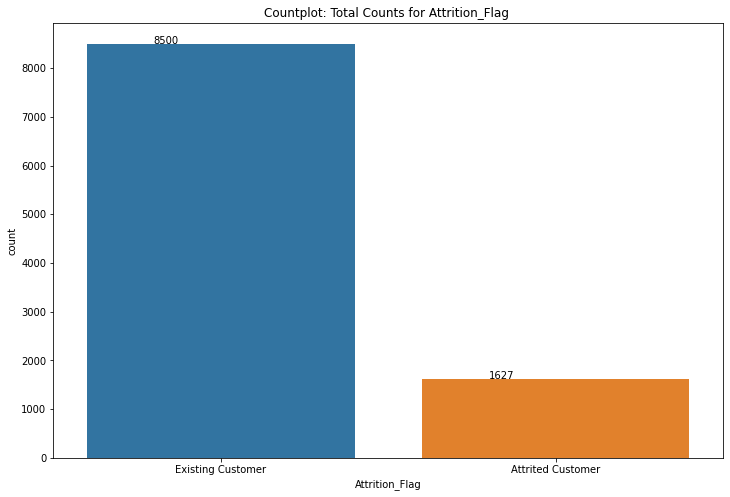

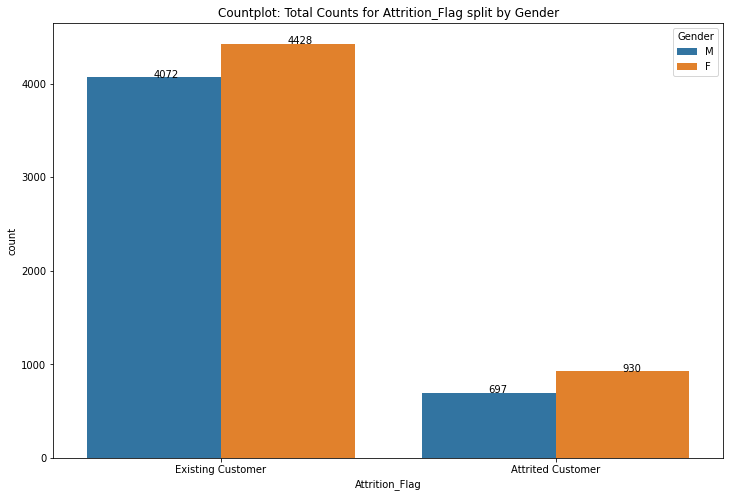

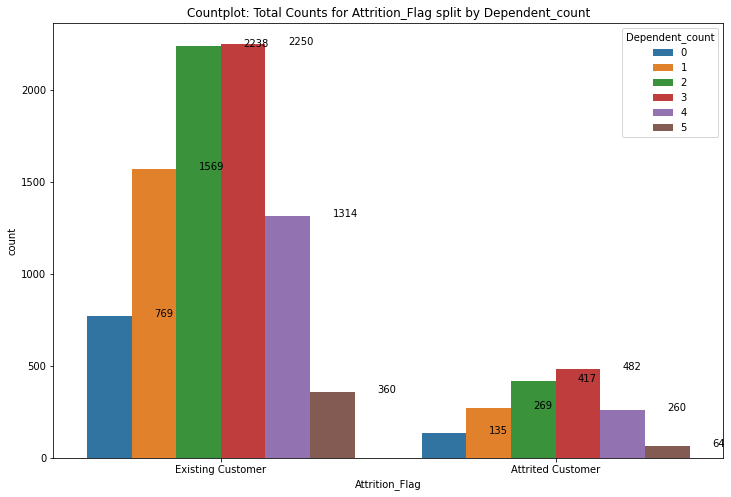

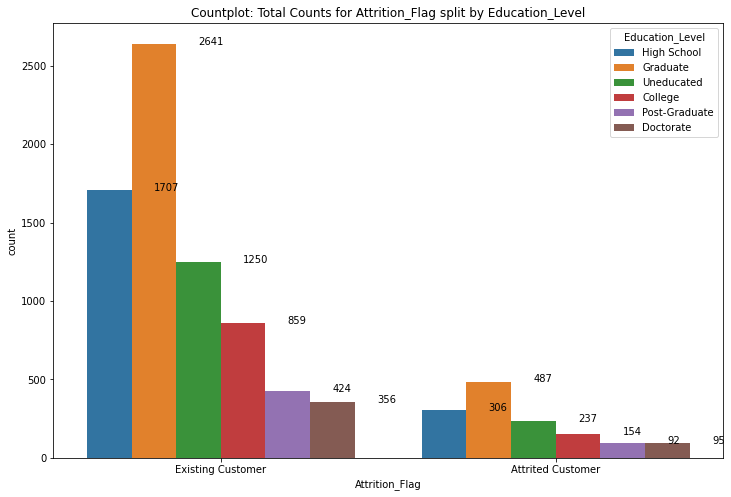

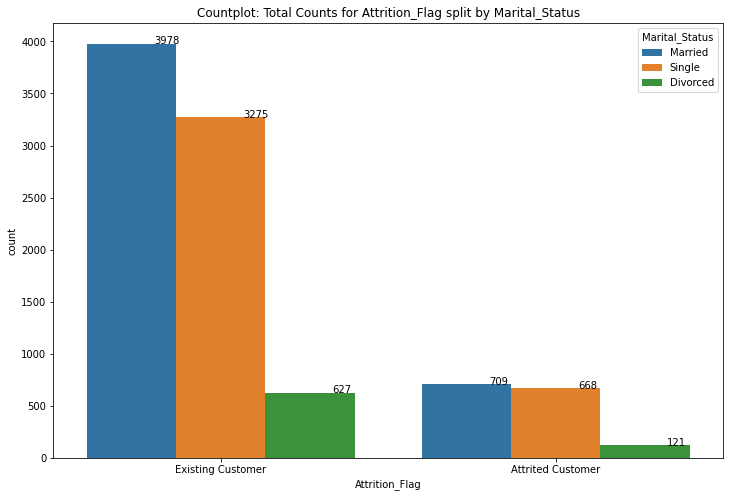

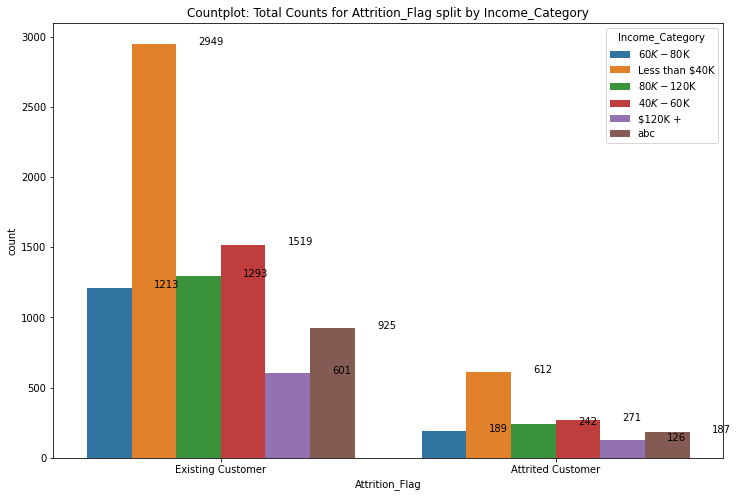

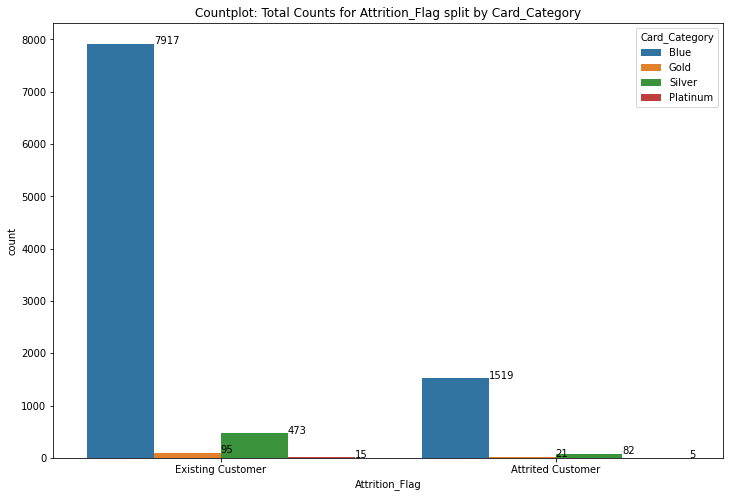

In [28]:
# Use Countplot to see the distribution of Attrition_Flag.
# This is a Dependent Feature. We will also see the counts split on various other features as well
# This will help us uncover profile of the customers who have attrited and ones who have perersisted with the bank

Temp_v='Attrition_Flag'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Dependent_count')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Dependent_count', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education_Level')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Education_Level', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Marital_Status')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Marital_Status', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Income_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* This is the Dependent or Target Feature. 
Data has about 84% records for Existing Customers and 16% for Attrited Customers. So, the dataset is fairly imbalanced.
* Distribution of all catgory / object features like Card Category, Income category etc. is same for both classes of customers, no differences observed in particular for attrited customers

### 8a.2. Customer_Age

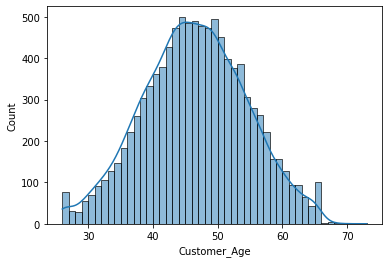

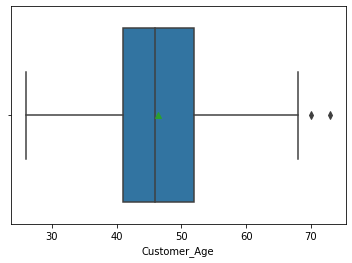

In [29]:
# Use histplots to see distribution for Customer_Age

sns.histplot(data=df,x='Customer_Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Customer_Age', showmeans=True)
plt.show()

* Nice Normal-like distribution
* There are few outliers, that need to be investigated

### 8a.3. Gender

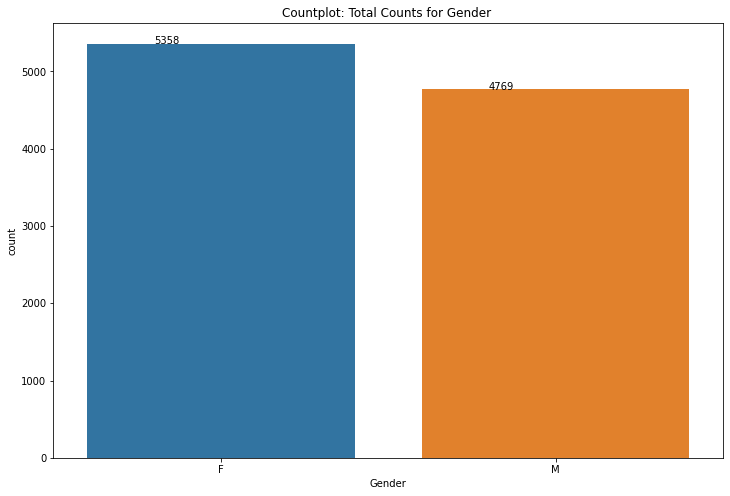

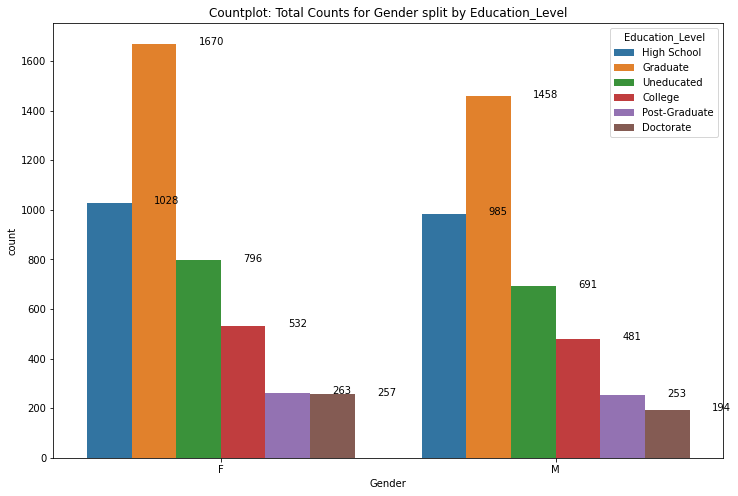

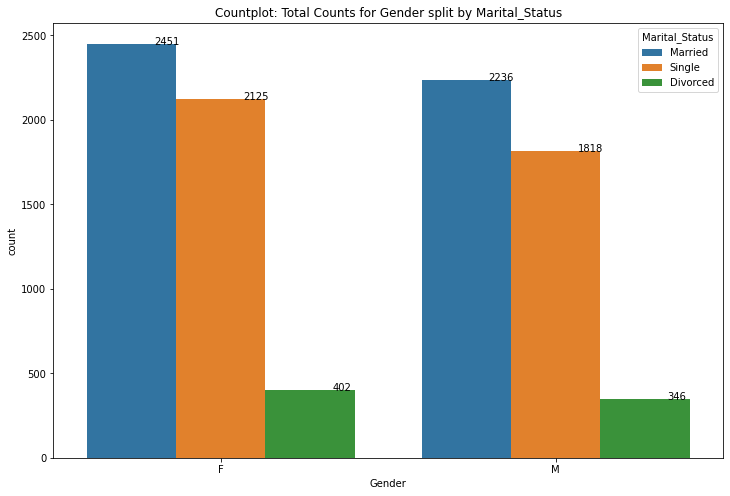

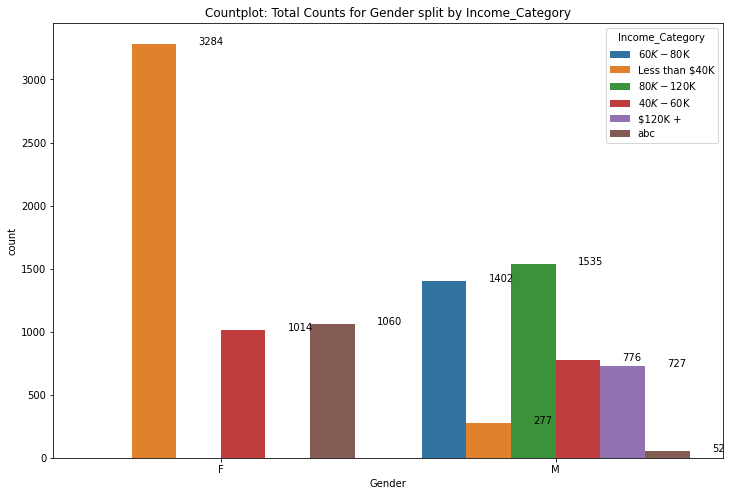

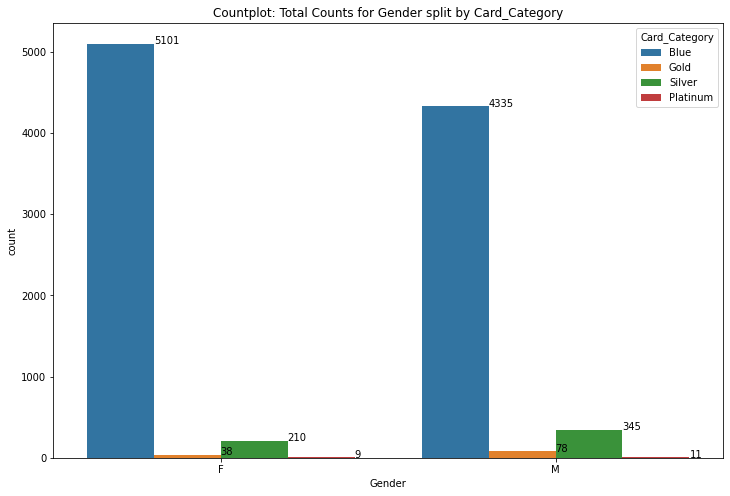

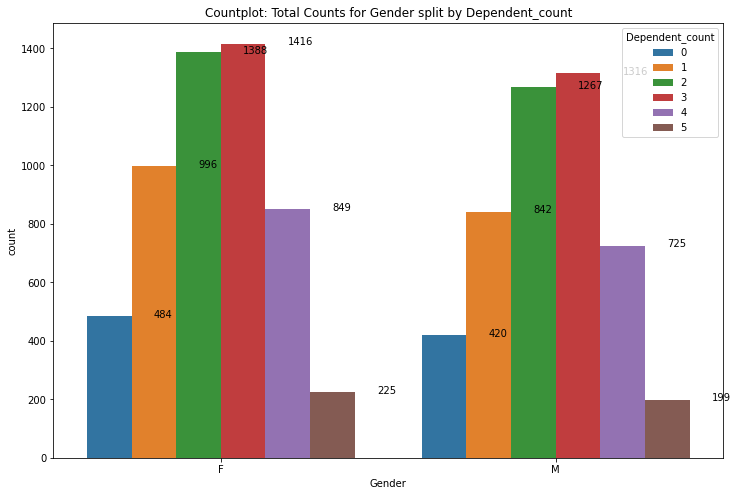

In [30]:
# Use Countplot to see the distribution of Gender.

Temp_v='Gender'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education_Level')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Education_Level', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Marital_Status')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Marital_Status', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Income_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Dependent_count')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Dependent_count', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Distribution of all catgory / object features like Card Category, Income category etc. is same for both Gender value, EXCEPT for Income Category. 
* For Income category, there are NO females in income categories more than 60K. Categories 60K-80K, 80-120K and 120K+ are missing altogether for female customers. Is the bank missing a large segment of customers?
* There are sizable records with income category 'abc', majority of thoese are Females. Should be a point for verification with SMEs.

### 8a.4. Dependent_count

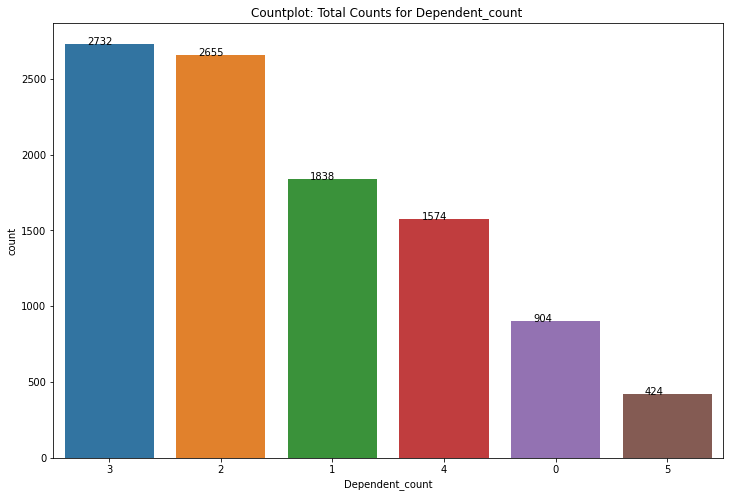

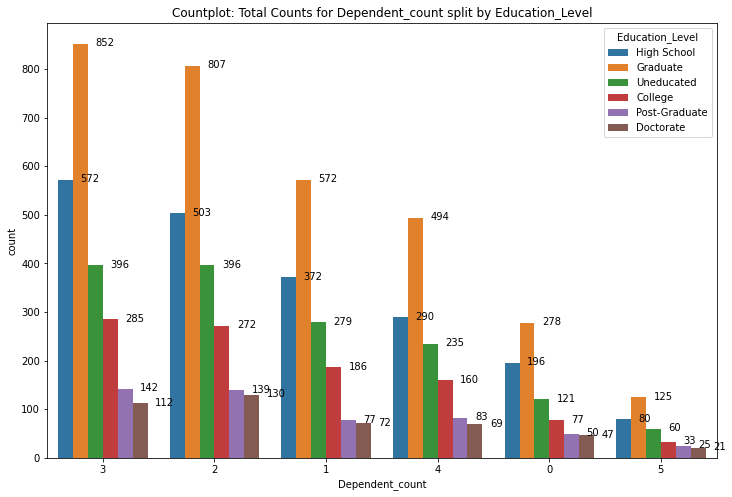

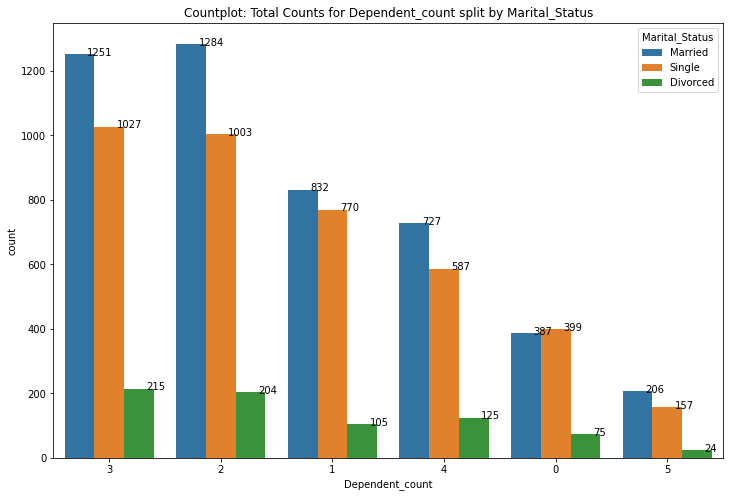

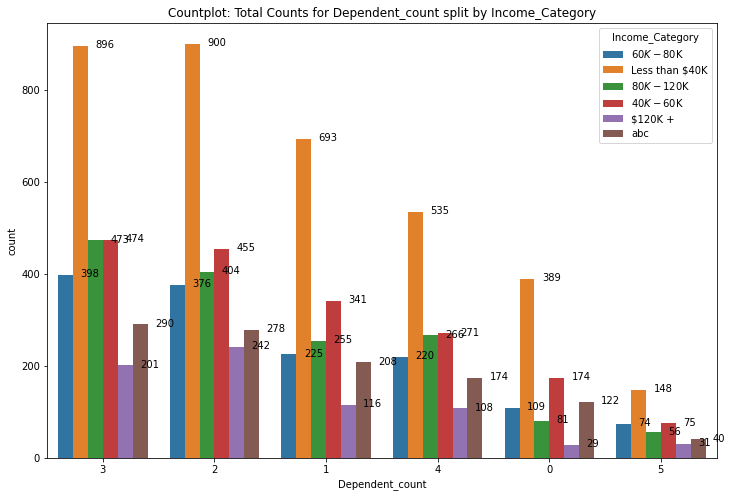

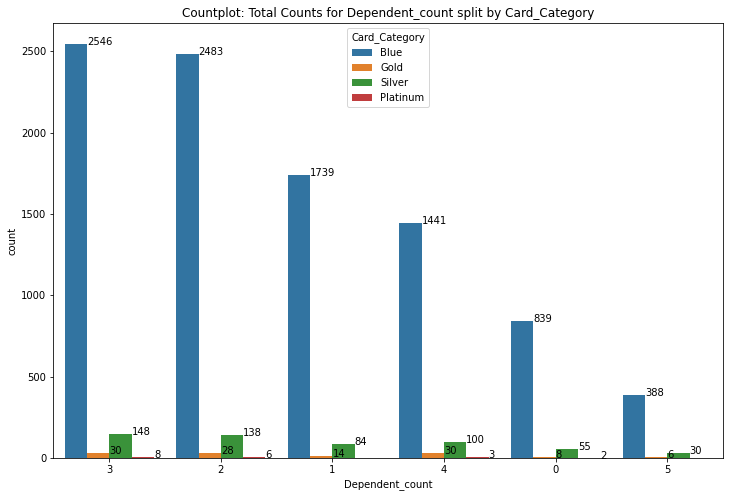

In [31]:
# Use Countplot to see the distribution of Dependent_count.

Temp_v='Dependent_count'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education_Level')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Education_Level', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Marital_Status')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Marital_Status', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Income_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Nothing worth noting. Distribution of all catgory / object features like Card Category, Income category etc. is same for all Dependent_count values.

### 8a.5. Education_Level

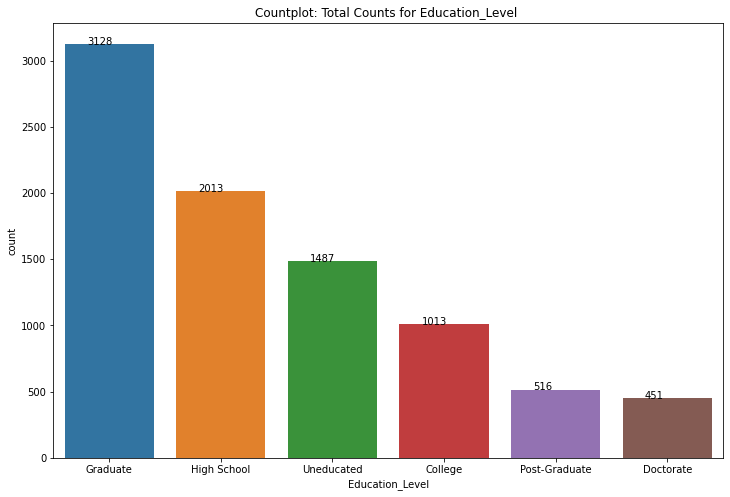

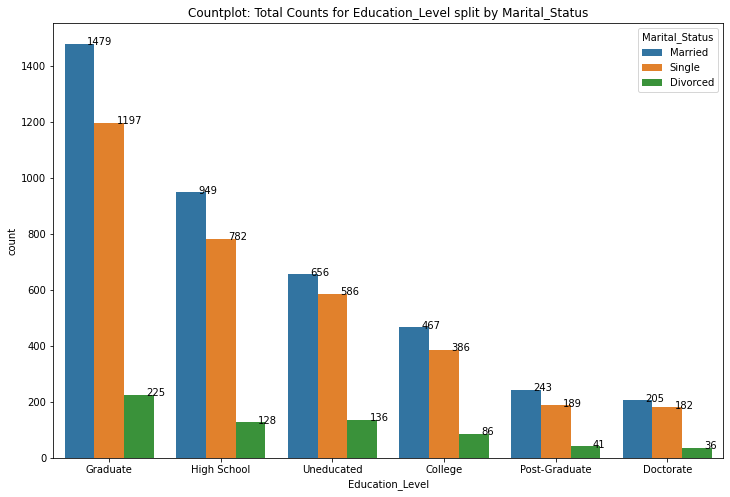

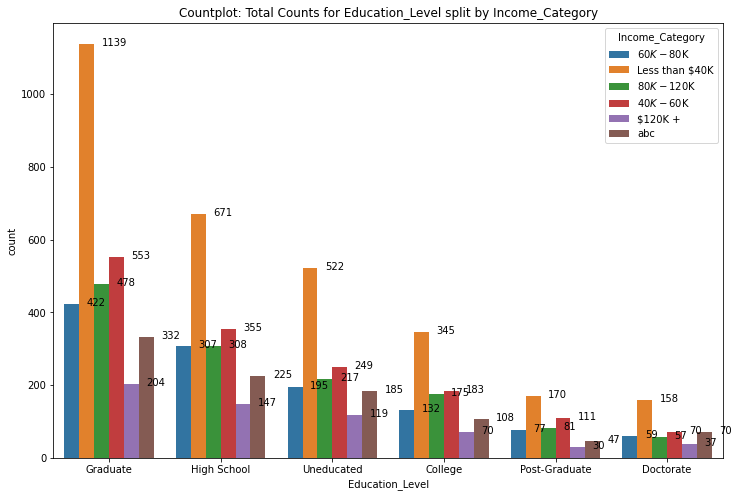

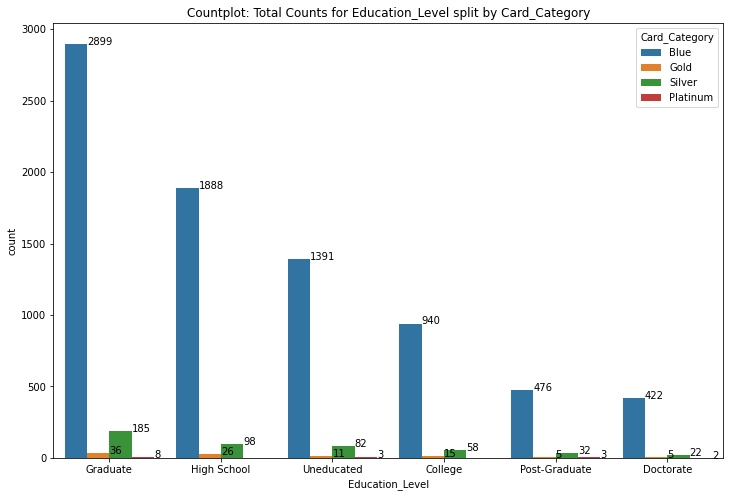

In [32]:
# Use Countplot to see the distribution of Education_Level.

Temp_v='Education_Level'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Marital_Status')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Marital_Status', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Income_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Sizable popuation thats 'Uneducated'
* Even at higher education levels like Post-Graduate and Doctorate, highest number of customers with 'Less than 40K' incomes, which is surprising.

### 8a.6. Marital_Status

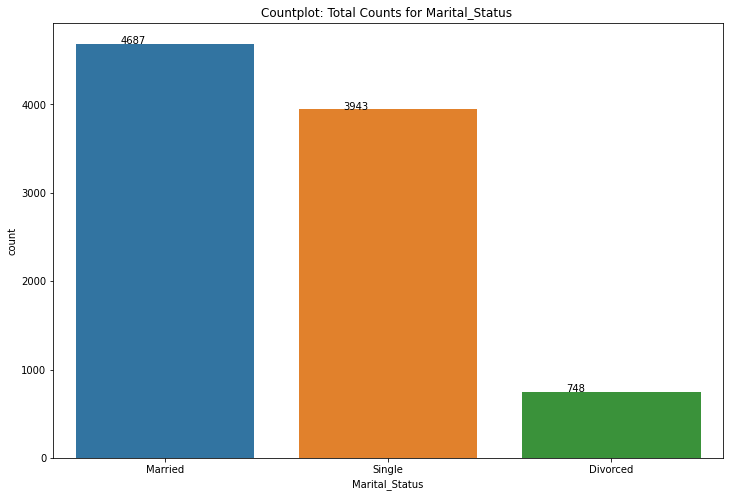

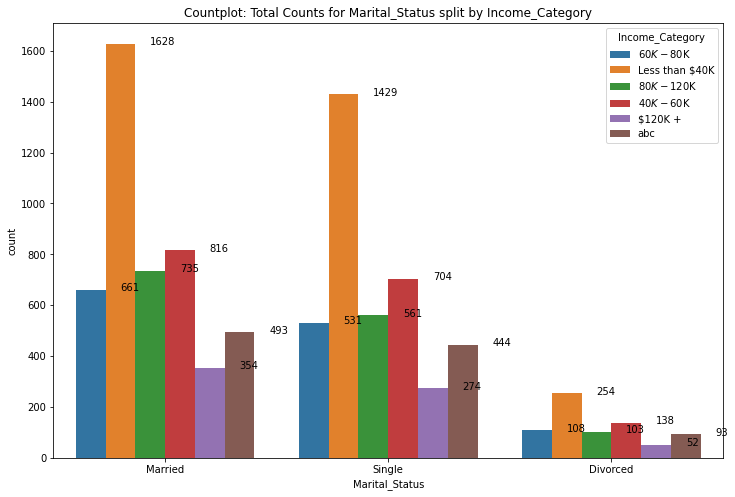

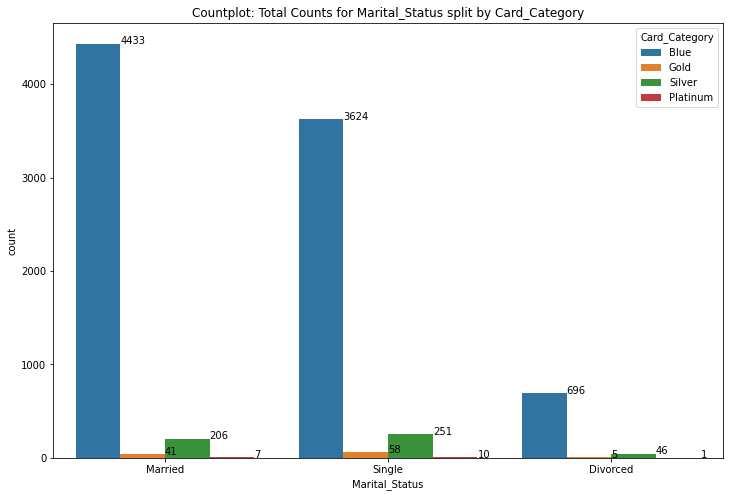

In [33]:
# Use Countplot to see the distribution of Marital_Status.

Temp_v='Marital_Status'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Income_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Nothing additional to note

### 8a.7. Income_Category

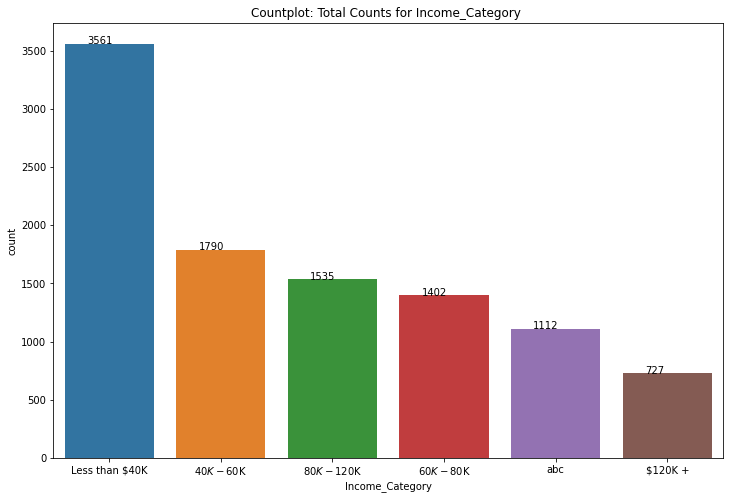

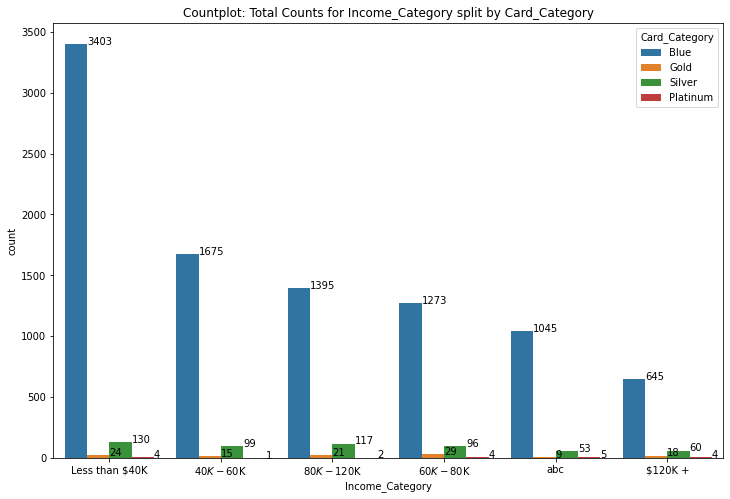

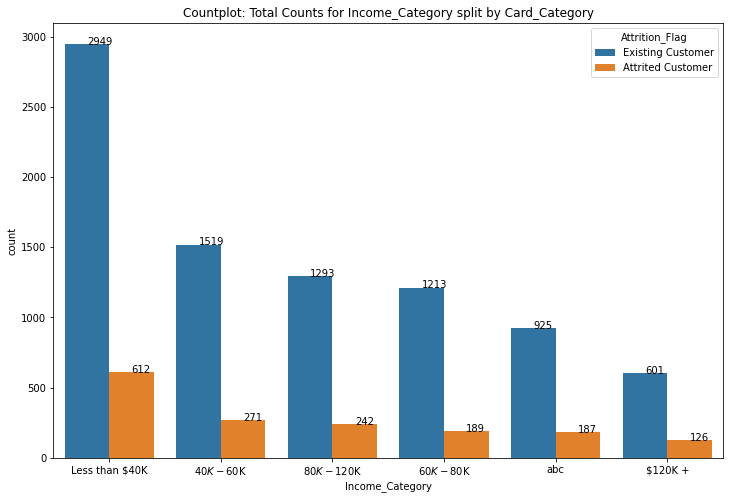

In [34]:
# Use Countplot to see the distribution of Income_Category.

Temp_v='Income_Category'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Card_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Card_Category')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Attrition_Flag', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Most number of records wth 'Less than 40K' income. In general, more customer on lower end of the income levels

### 8a.8. Card_Category

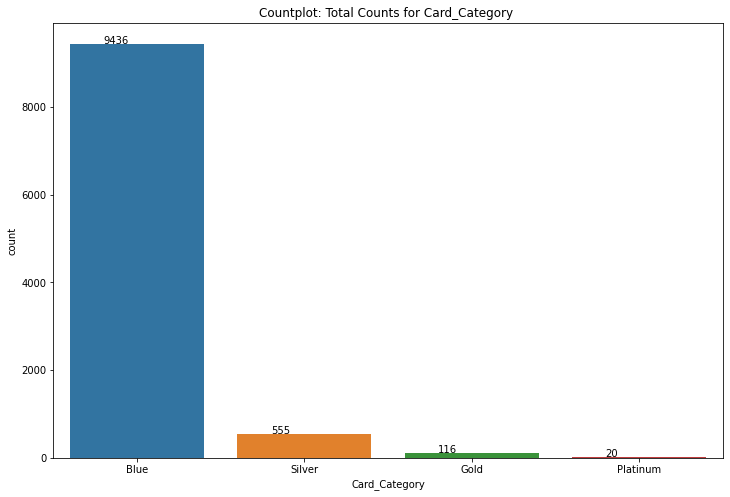

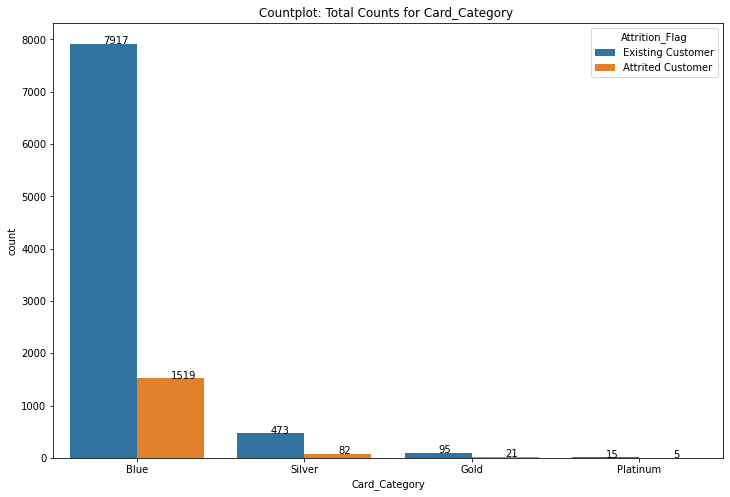

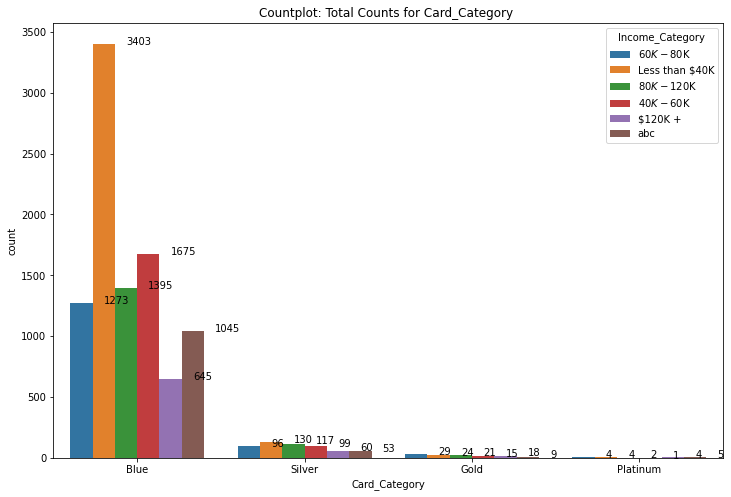

In [35]:
# Use Countplot to see the distribution of Card_Category.

Temp_v='Card_Category'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Attrition_Flag', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Income_Category', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Blue followed by Silver are the most popular cards
* Accordingly, most of the customers attrited also are from these card categories
* Blue is card is largely used by customers with lower income levels

### 8a.9. Months_on_book

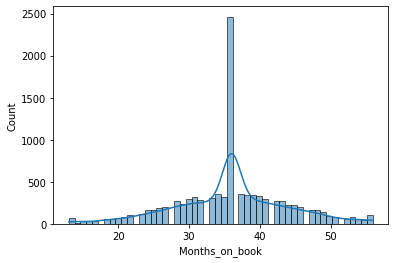

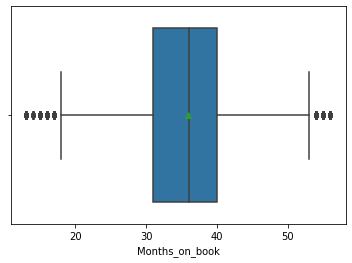

In [36]:
# Use histplots to see distribution for Months_on_book

sns.histplot(data=df,x='Months_on_book', kde=True)
plt.show()

sns.boxplot(data=df,x='Months_on_book', showmeans=True)
plt.show()

* Symmetrically distributed, mean about 36 months
* There are lower as well as upper outliers that will be investigated and treated as appropriate

### 8a.10. Total_Relationship_Count

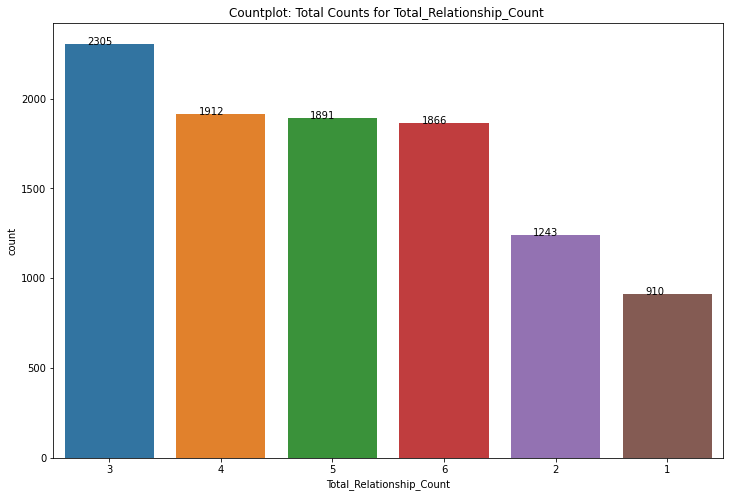

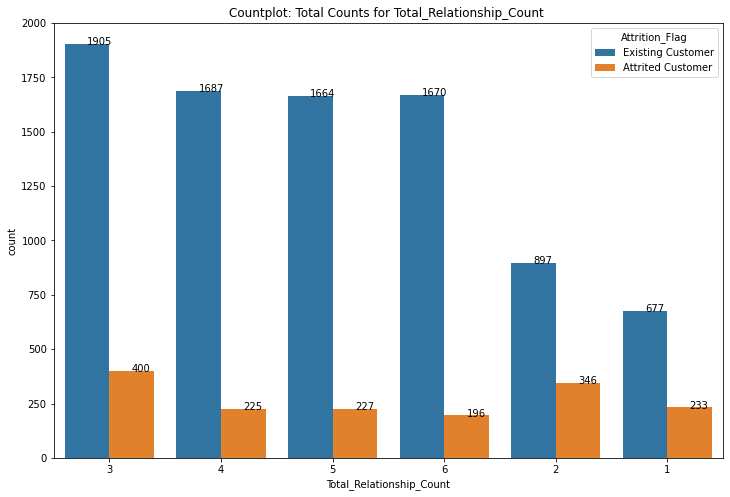

In [37]:
# Use Countplot to see the distribution of Total_Relationship_Count.

Temp_v='Total_Relationship_Count'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Attrition_Flag', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Majority of the customers hold 3 or more product
* Proportion of the customers attrited is more in customers holding lower number of Products.

### 8a.11. Months_Inactive_12_mon

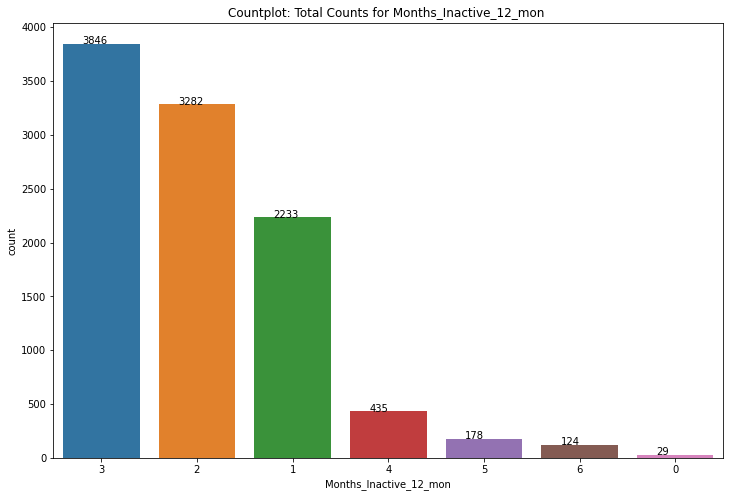

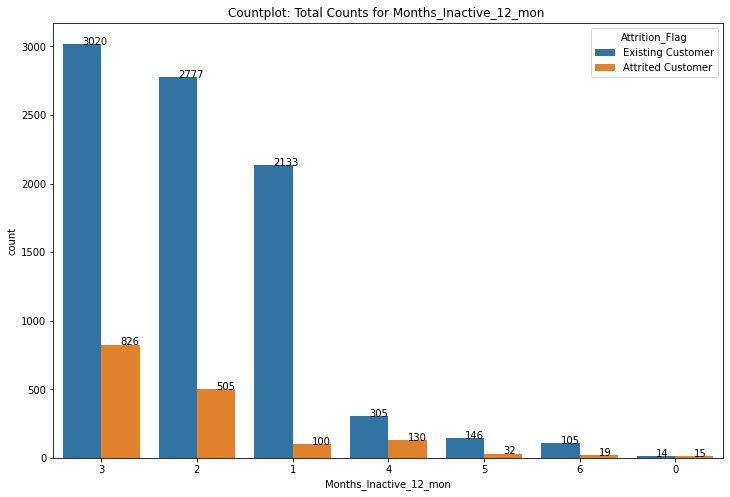

In [38]:
# Use Countplot to see the distribution of Months_Inactive_12_mon.

Temp_v='Months_Inactive_12_mon'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Attrition_Flag', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Majority of the customers have been inactive for 3 or more months in last 12 months. This can be alarming and an indication of lesser engaged customers
* Same pattern for attrited customers as well

### 8a.12. Contacts_Count_12_mon

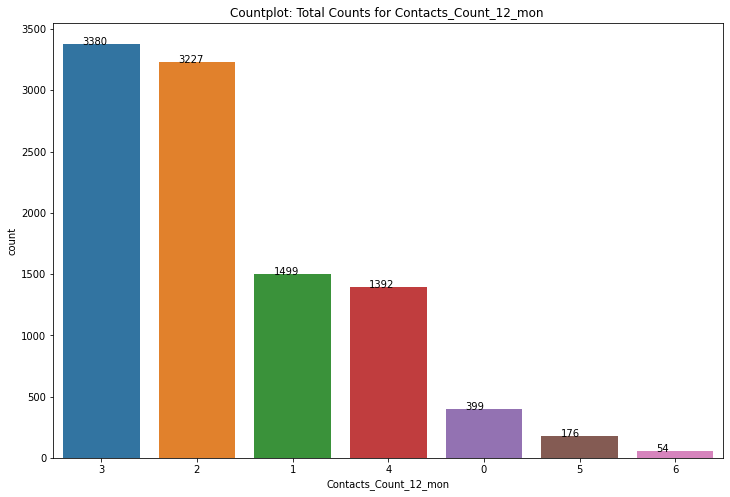

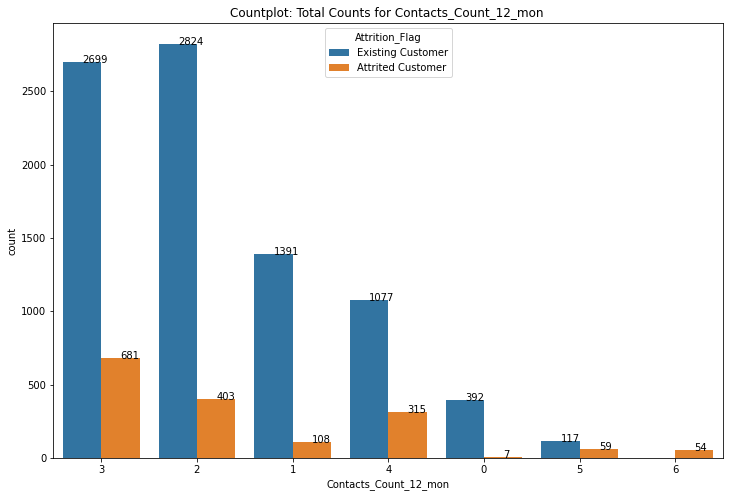

In [39]:
# Use Countplot to see the distribution of Contacts_Count_12_mon.

Temp_v='Contacts_Count_12_mon'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Attrition_Flag', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()




* Most of the customers seem to have fair contact with the bank, although they may be inactive
* There are customers with 0 contact in last 12 months, which is not necessarily bad as most of them are still existing customers

### 8a.13. Credit_Limit

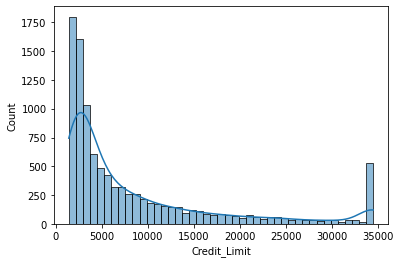

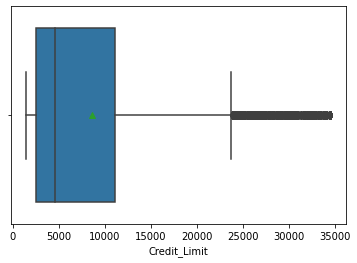

In [40]:
# Use histplots to see distribution for Credit_Limit

sns.histplot(data=df,x='Credit_Limit', kde=True)
plt.show()

sns.boxplot(data=df,x='Credit_Limit', showmeans=True)
plt.show()

* Right skewed distribution, that should be scaled to make it as Normal as possible
* Significant outliers, that need to be investigated and treated as necessary
* 75% of the customer have credit limit around 11000. But there are few with more than 24000 as well. This makes sense as most of the customers are in lower income category so will have lower credit limit as well

### 8a.14. Total_Revolving_Bal

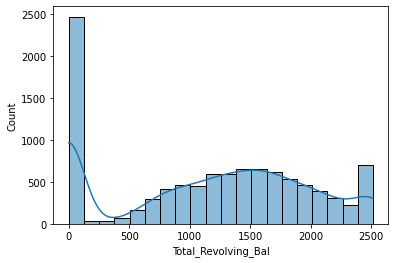

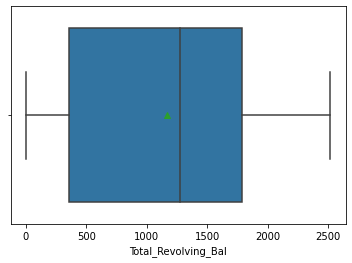

In [41]:
# Use histplots to see distribution for Total_Revolving_Bal

sns.histplot(data=df,x='Total_Revolving_Bal', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Revolving_Bal', showmeans=True)
plt.show()

* No outliers
* Many customers with 0 revolving balance, which is possible and good for them
* Range of values is from 0 to about 2500
* Skewed distribution,that should be scaled to make it as Normal as possible

### 8a.15. Avg_Open_To_Buy

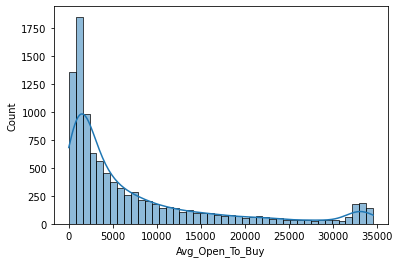

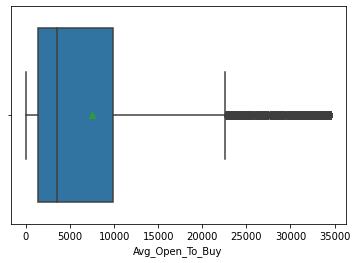

In [42]:
# Use histplots to see distribution for Avg_Open_To_Buy

sns.histplot(data=df,x='Avg_Open_To_Buy', kde=True)
plt.show()

sns.boxplot(data=df,x='Avg_Open_To_Buy', showmeans=True)
plt.show()

* Distribution looks very similar to Credit Limit
* Several outliers that need to be investigated

### 8a.16. Total_Trans_Amt

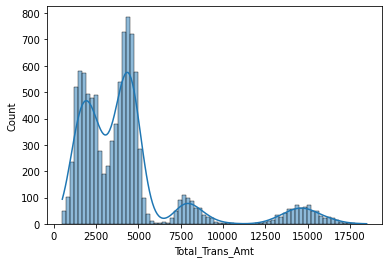

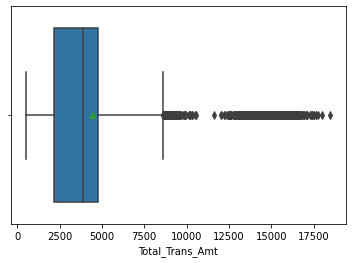

In [43]:
# Use histplots to see distribution for Total_Trans_Amt

sns.histplot(data=df,x='Total_Trans_Amt', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Trans_Amt', showmeans=True)
plt.show()

* Multiple modes in the distribution
* Several upper outliers that need to be investigated

### 8a.17. Total_Trans_Ct

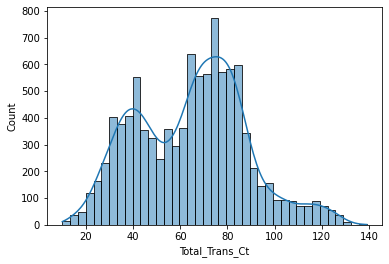

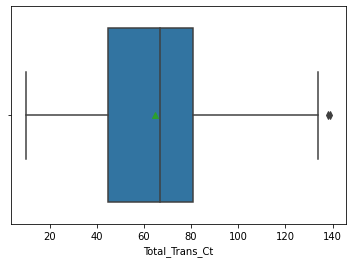

In [44]:
# Use histplots to see distribution for Total_Trans_Ct

sns.histplot(data=df,x='Total_Trans_Ct', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Trans_Ct', showmeans=True)
plt.show()

* Multiple modes in the distribution
* Some upper outliers that need to be investigated
* Average number of transaction count is between 60 and 70. But there is a range between 10 and 81 for number of transactions

### 8a.18. Total_Ct_Chng_Q4_Q1

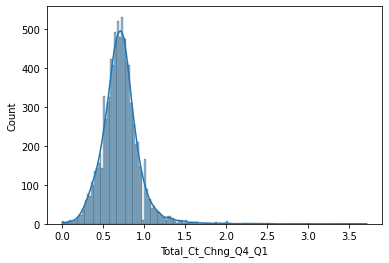

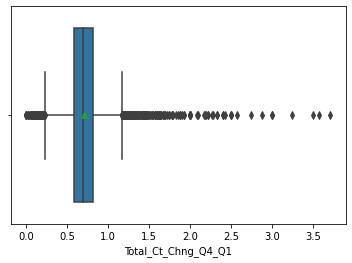

In [45]:
# Use histplots to see distribution for Total_Ct_Chng_Q4_Q1

sns.histplot(data=df,x='Total_Ct_Chng_Q4_Q1', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Ct_Chng_Q4_Q1', showmeans=True)
plt.show()

* Ratio is less than 1 for most of the customers, indicating that there were lesser transactions in Q4 than in Q1, which is alarming
* There are several outliers, with value more than 1, which is good and seems legit

### 8a.19. Total_Amt_Chng_Q4_Q1

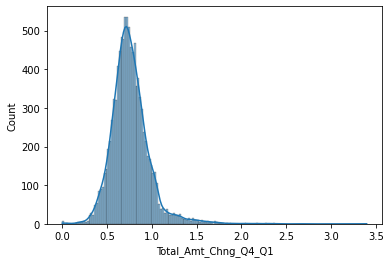

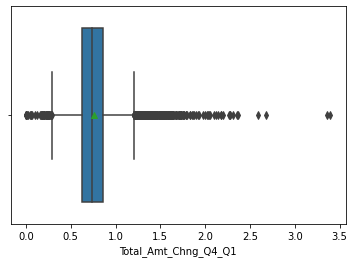

In [46]:
# Use histplots to see distribution for Total_Amt_Chng_Q4_Q1

sns.histplot(data=df,x='Total_Amt_Chng_Q4_Q1', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Amt_Chng_Q4_Q1', showmeans=True)
plt.show()

* Ratio is less than 1 for most of the customers, indicating that there were lesser transaction amount in Q4 than in Q1, which is alarming
* There are several outliers, with value more than 1, which is good and seems legit

### 8a.20. Avg_Utilization_Ratio

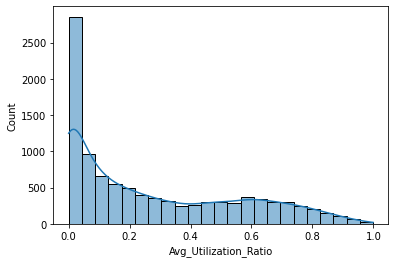

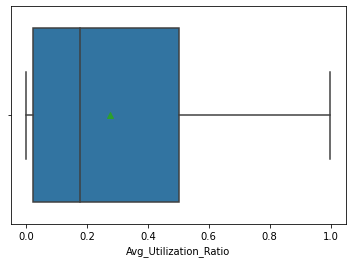

In [47]:
# Use histplots to see distribution for Avg_Utilization_Ratio

sns.histplot(data=df,x='Avg_Utilization_Ratio', kde=True)
plt.show()

sns.boxplot(data=df,x='Avg_Utilization_Ratio', showmeans=True)
plt.show()

* Values range from 0 and 1, indicating that there are no customers who spend more than the credit limit available

## 8b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

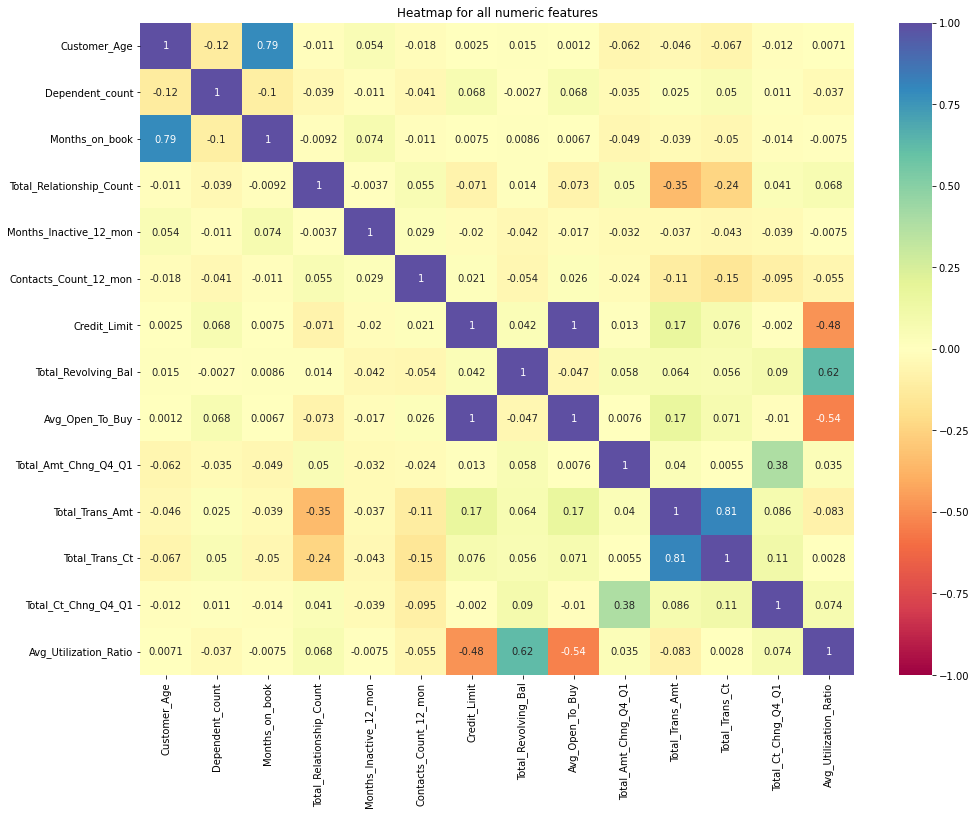

In [48]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(16,12))
plt.title('Heatmap for all numeric features')

sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observations

1. Strong corelation (>= 0.7 absolute value) exists between any features - 
  
  a. Customer_Age and Months_on_book - Incidental corelation

	b. Credit_Limit and Avg_Open_To_Buy - Corelation of 1. One of the features should be removed from the dataset to avoid multicollinearity. We will retain Credit_Limit

	c. Total_Trans_Amt and Total_Trans_Ct - Logical relationship. However, both features indicate different aspects of the customer spend, so we will retain both 

  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

	a. Total_Relationship_Count and Total_Trans_Amt - Negative corelation, which is surprising. More the relationship count lesser the transaction amount! 

	b. Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 - Positive corelation, which seems logical

	c. Credit_Limit and Avg_Utilization_Ratio - Fairly corelated negatively. More the credit limit lesser the utilization ratio as customers may not be spending more just because more credit limit is available

	d. Total_Revolving_Bal and Avg_Utilization_Ratio - Logical corelation, more balance indicates that more of the credit limit is being utlized

 	e. Avg_Open_To_Buy and Avg_Utilization_Ratio - Logical corelation, more utilization of the credit limit means less available to buy

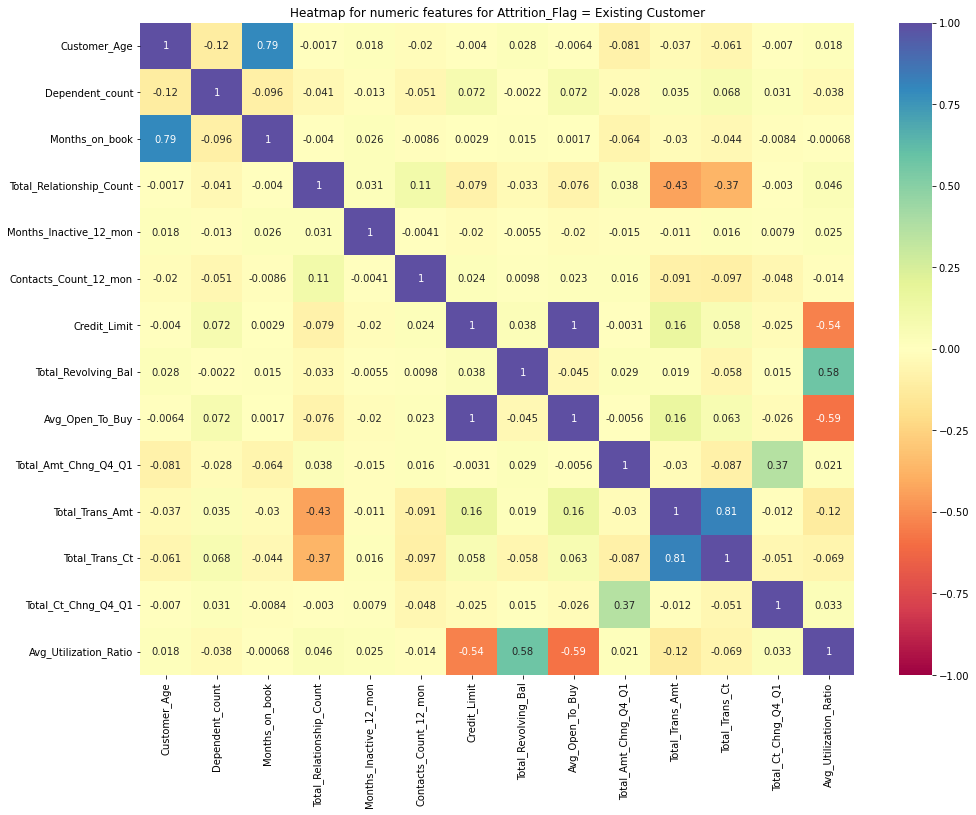

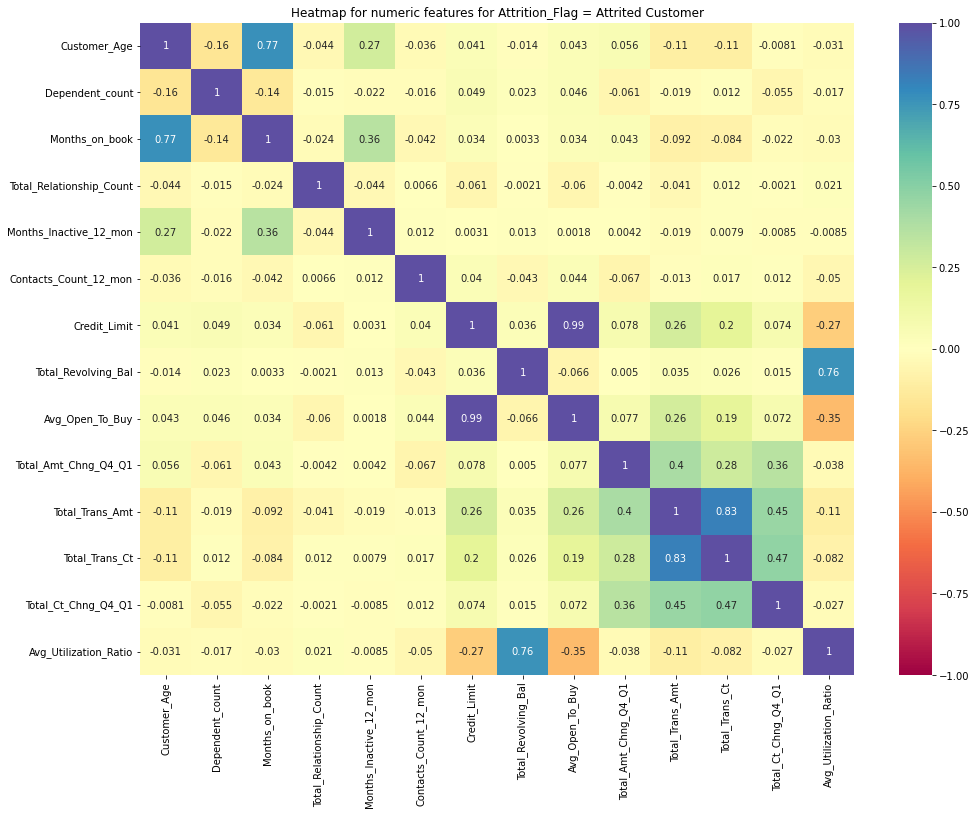

In [49]:
# Let's check Heatmap for numeric features, but for groups segregated by Attrition_Flag. This is to see if there are any different attribute relationships for the customers who churned.

plt.figure(figsize=(16,12))
plt.title('Heatmap for numeric features for Attrition_Flag = Existing Customer')
sns.heatmap(df[df['Attrition_Flag'] == 'Existing Customer'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(16,12))
plt.title('Heatmap for numeric features for Attrition_Flag = Attrited Customer')
sns.heatmap(df[df['Attrition_Flag'] == 'Attrited Customer'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

1. Some differences in the corelation is observed when the data is segmented based on Attrition_Flag 
	
	a. Total_Trans_Amt and Total_Trans_Ct are more strongly corelated to Total_Ct_Chng_Q4_Q1 for Attrited customers. This corelation is very weak for existing customers.

Let's check how Attrition_Flag and some other continuous numeric features are related.

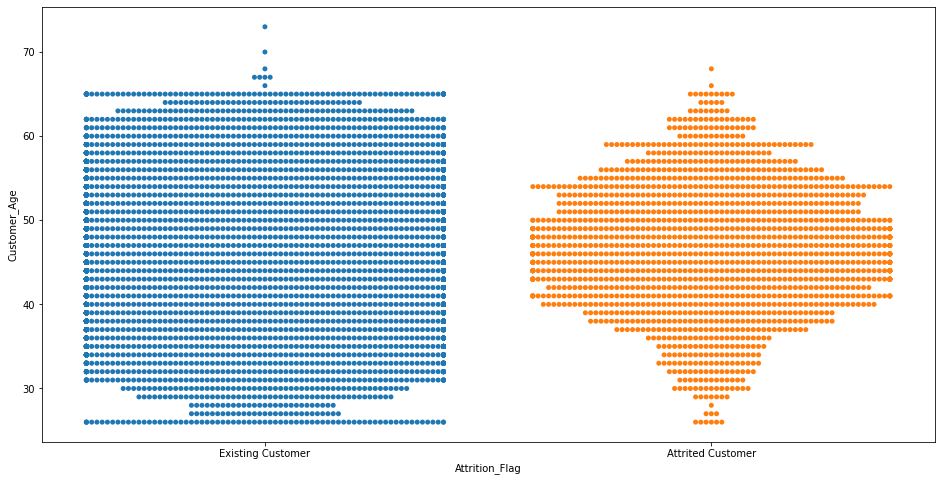

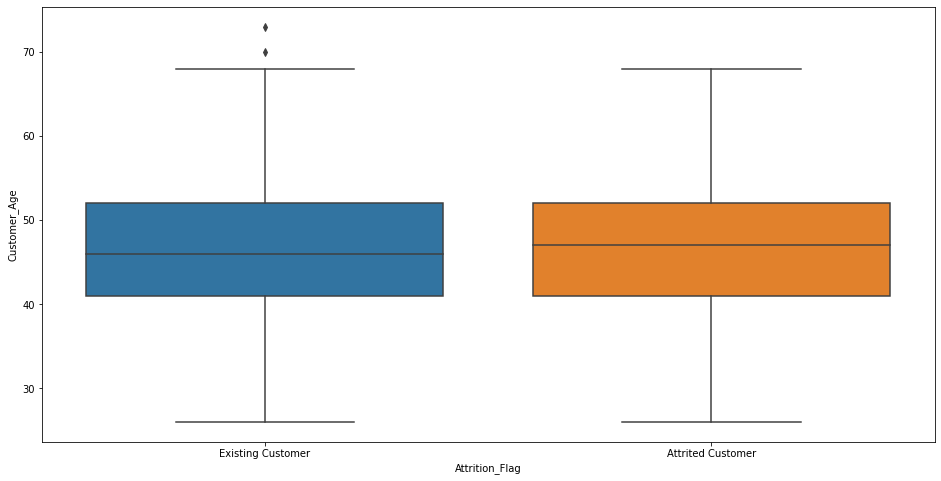

In [50]:
# Create stripplot for Attrition_Flag and Customer_Age.  

plt.figure(figsize=(16,8))
sns.swarmplot(data=df, x='Attrition_Flag', y='Customer_Age');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.show()

* Not much difference in age for existing and attrited customers

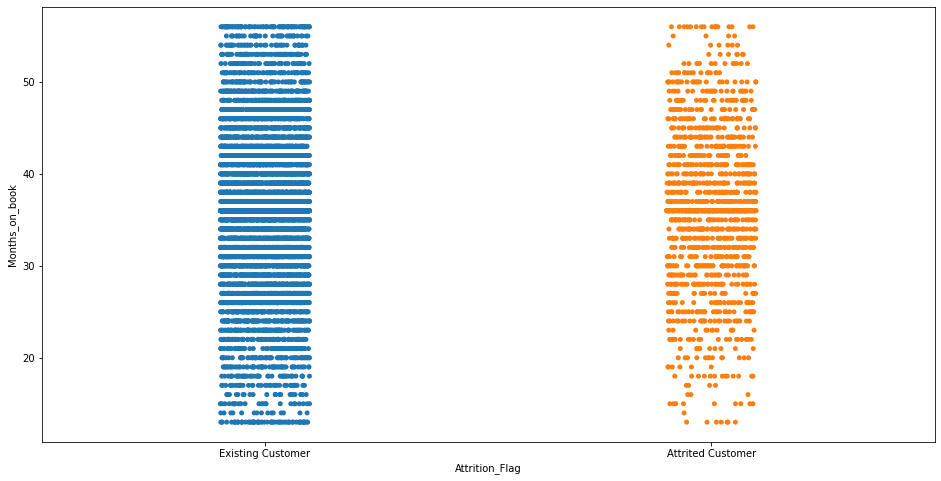

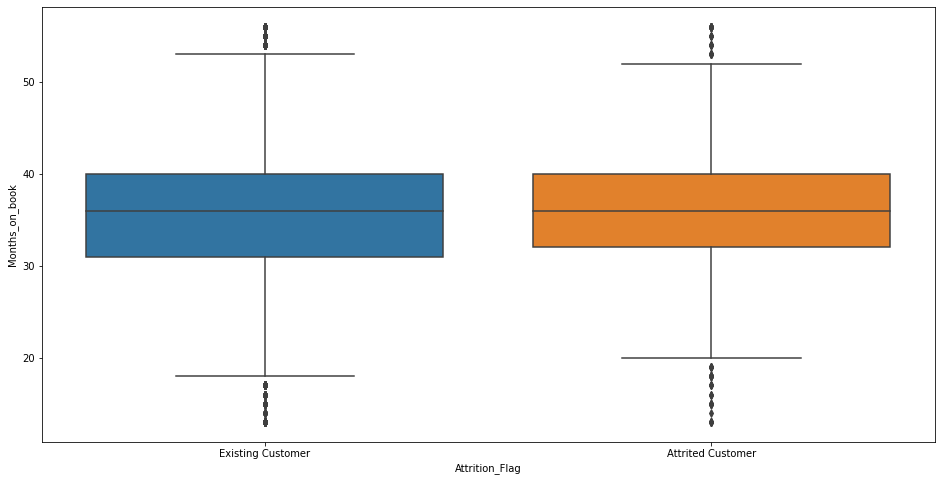

In [51]:
# Create stripplot for Attrition_Flag and Months_on_book.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Months_on_book');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Months_on_book')
plt.show()

* Not much difference in months on book for existing and attrited customers. 

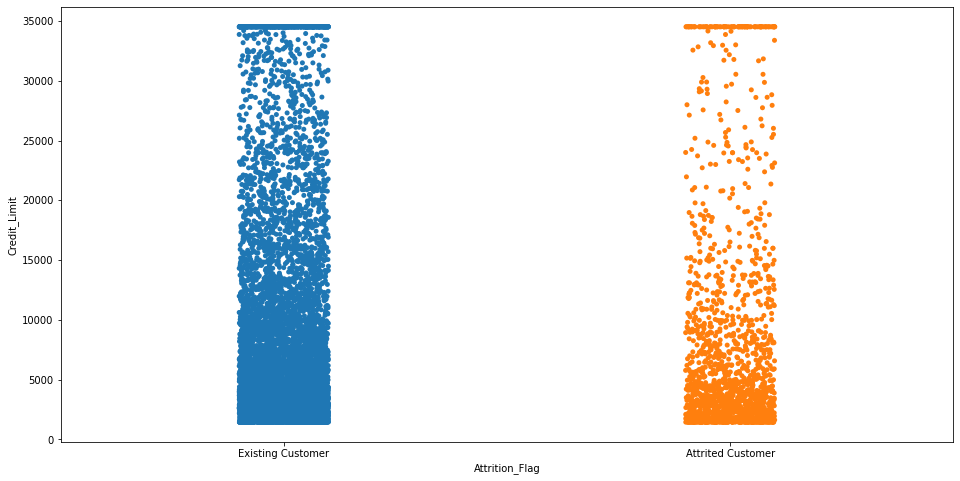

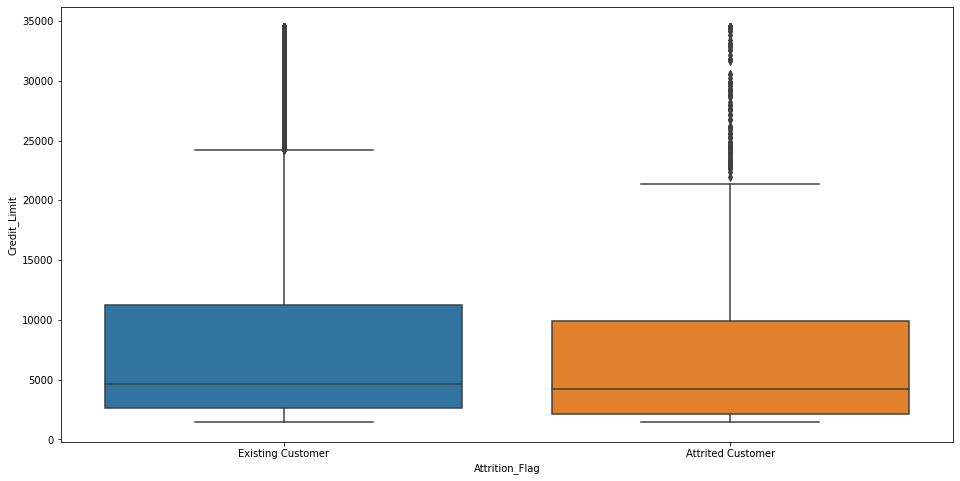

In [52]:
# Create stripplot for Attrition_Flag and Credit_Limit.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit')
plt.show()

* Not much difference in credit limit for existing and attrited customers. Looks like customers with little lower credit limit seems to have attrited

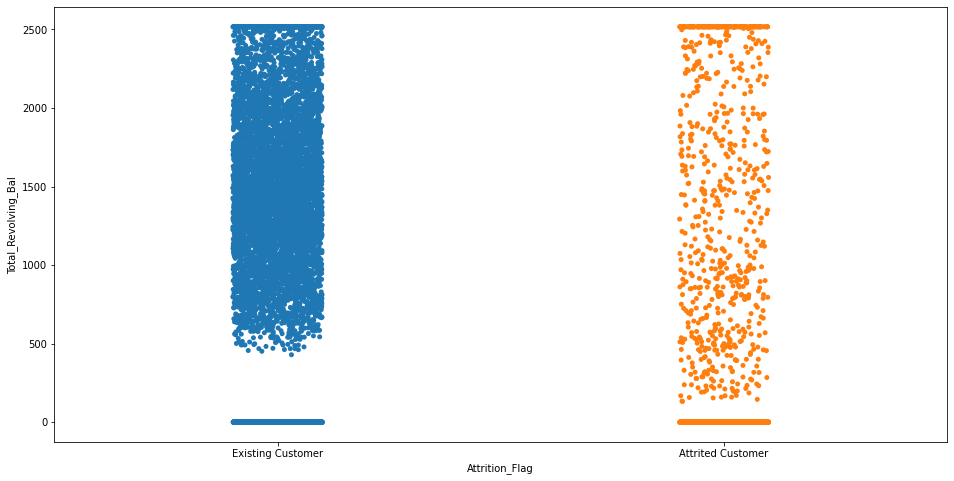

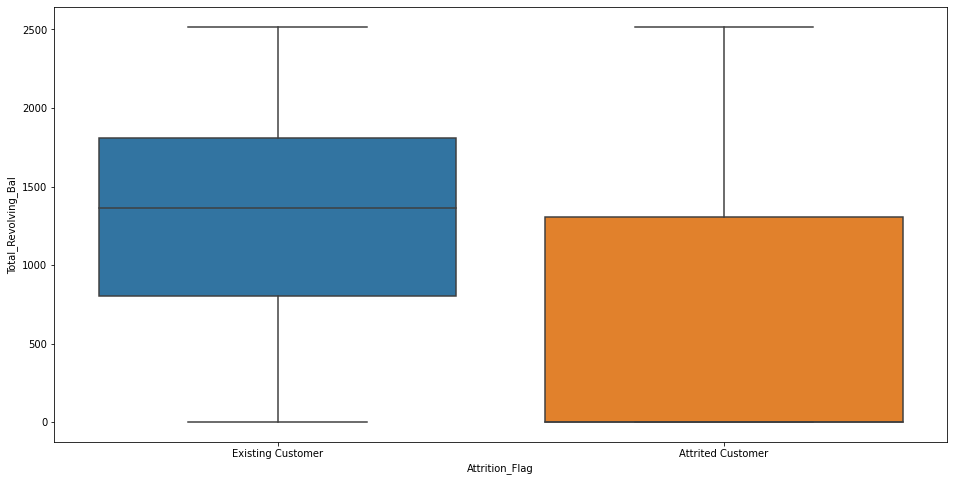

In [53]:
# Create stripplot for Attrition_Flag and Total_Revolving_Bal.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Total_Revolving_Bal');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Revolving_Bal')
plt.show()

* Total revolving balance of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce use of the credit card from the bank and eventually close the account

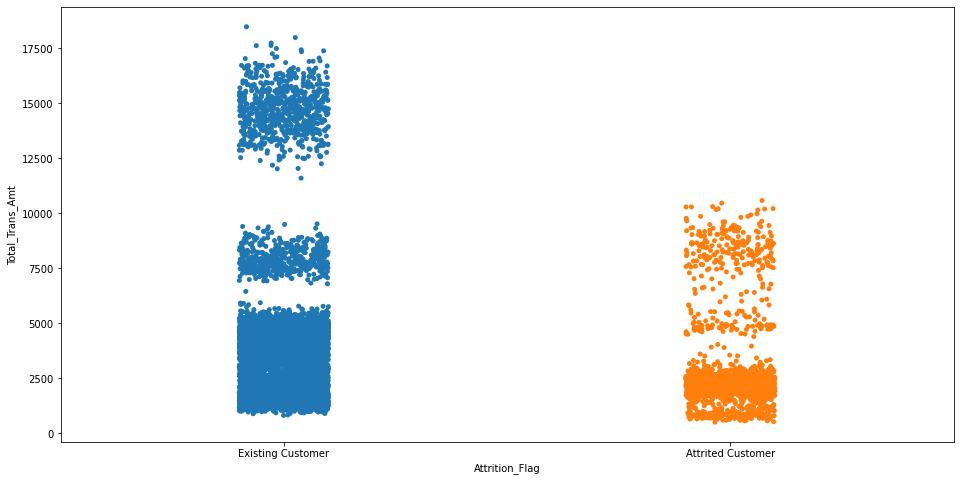

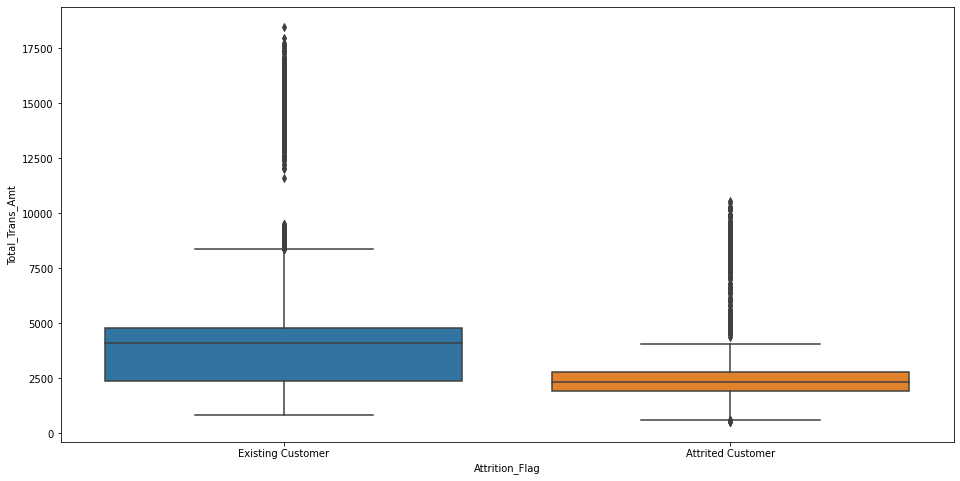

In [54]:
# Create stripplot for Attrition_Flag and Total_Trans_Amt.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt')
plt.show()

* Similar to Total revolving balance. Total transaction amount of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account

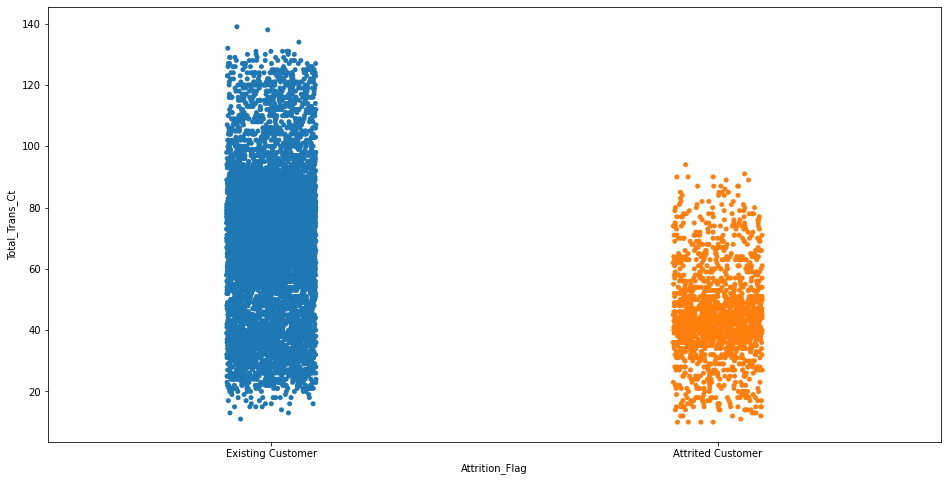

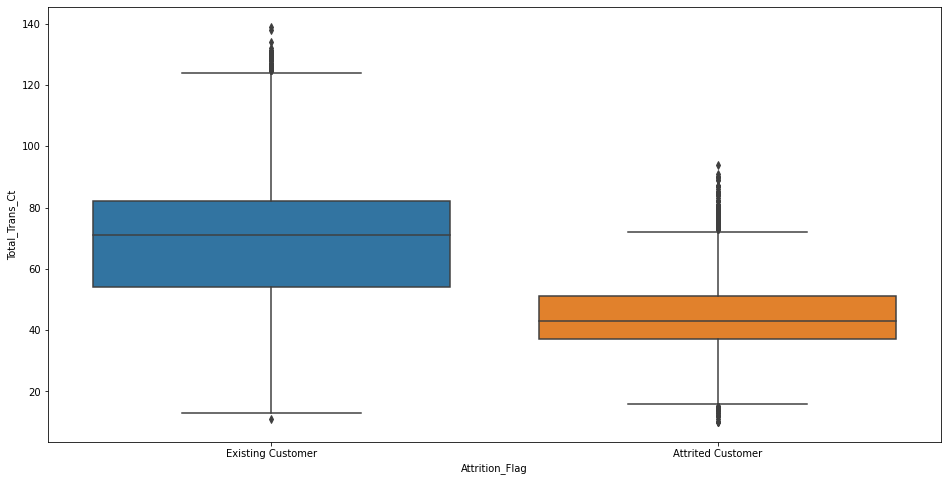

In [55]:
# Create stripplot for Attrition_Flag and Total_Trans_Ct.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Total_Trans_Ct');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Ct')
plt.show()

* Similar to Total transaction amount. Total transaction count of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account

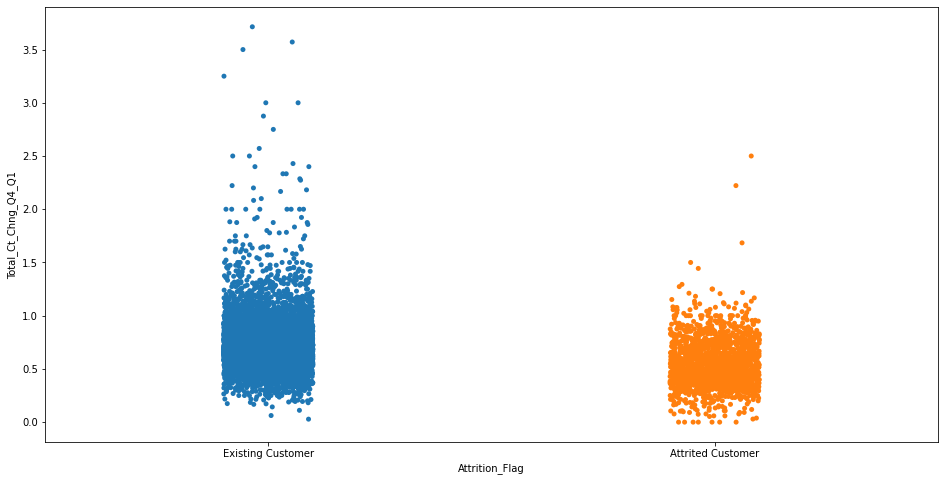

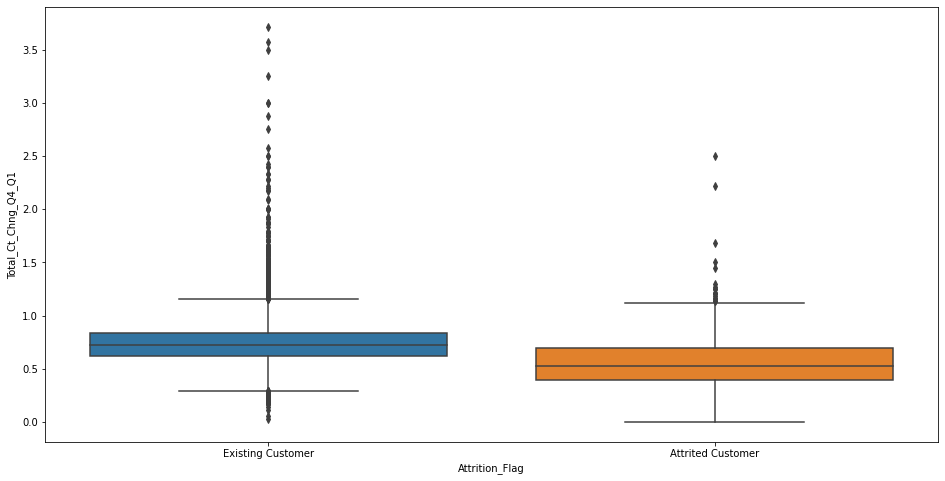

In [56]:
# Create stripplot for Attrition_Flag and Total_Ct_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')
plt.show()

* Ratio of transaction counts between Q4 and Q1 is smaller for attrited customers

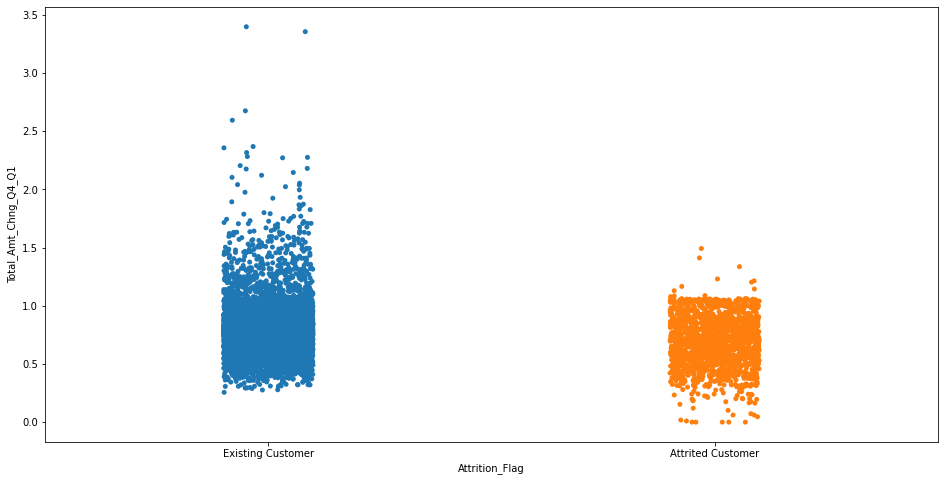

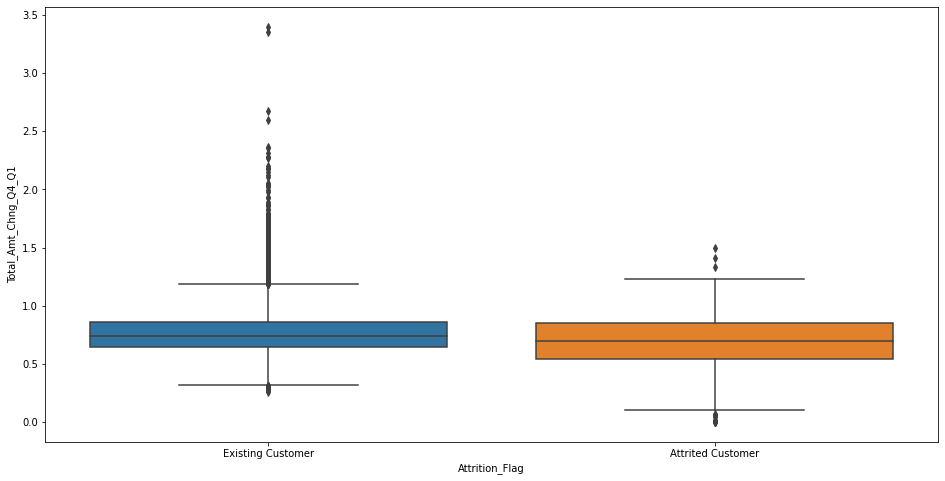

In [57]:
# Create stripplot for Attrition_Flag and Total_Amt_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.show()

* Not much difference observed for transaction amount ratio between existing and attrited customers

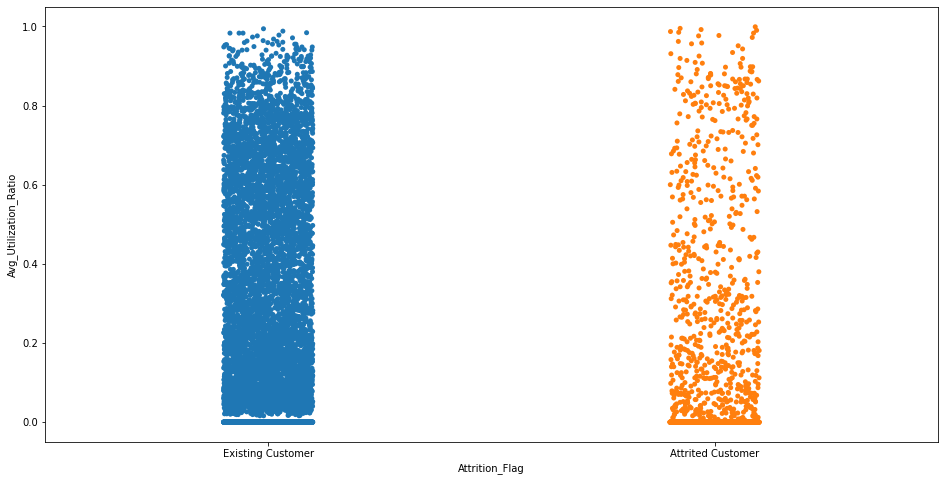

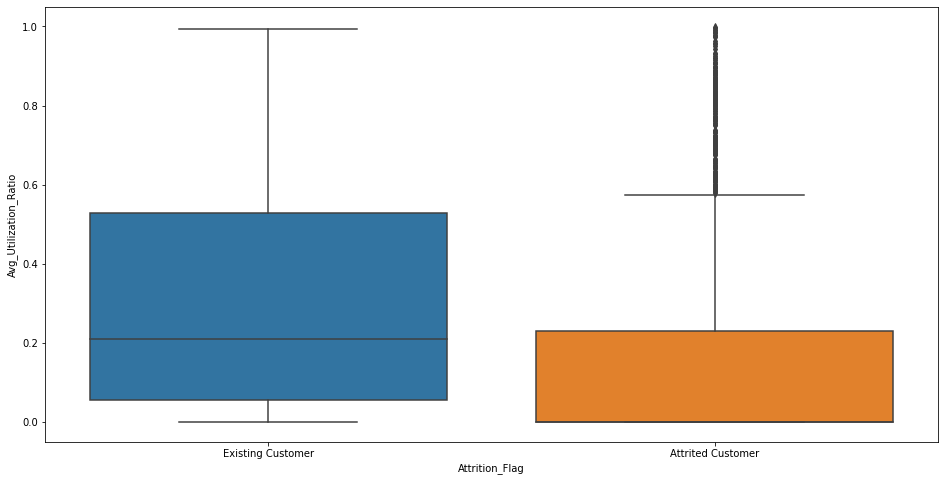

In [58]:
# Create stripplot for Attrition_Flag and Avg_Utilization_Ratio.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio')
plt.show()

* Like Total revolving balance and Total transaction amount, customers who have attrited have lower utilization ratio.

Let's review corelation between Gender and some relevant continuous features

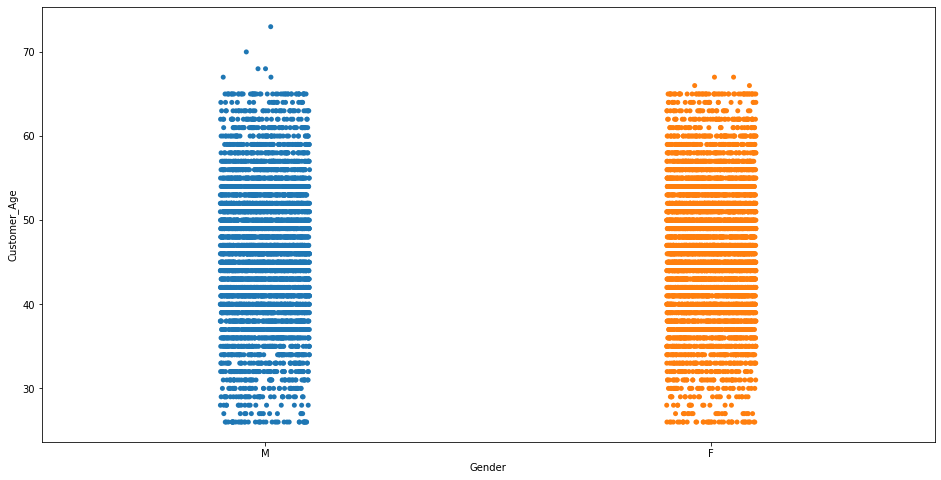

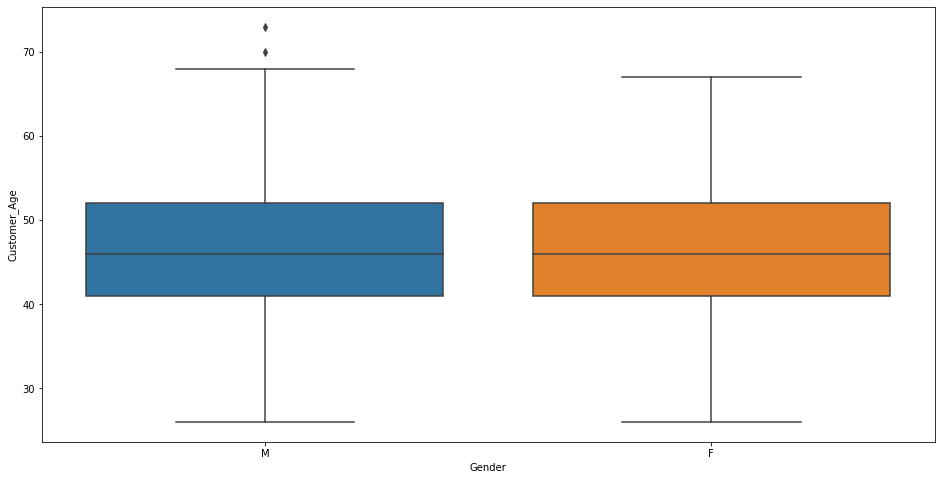

In [59]:
# Create stripplot for Gender and Customer_Age.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Customer_Age');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Customer_Age')
plt.show()

Nothing specific to note

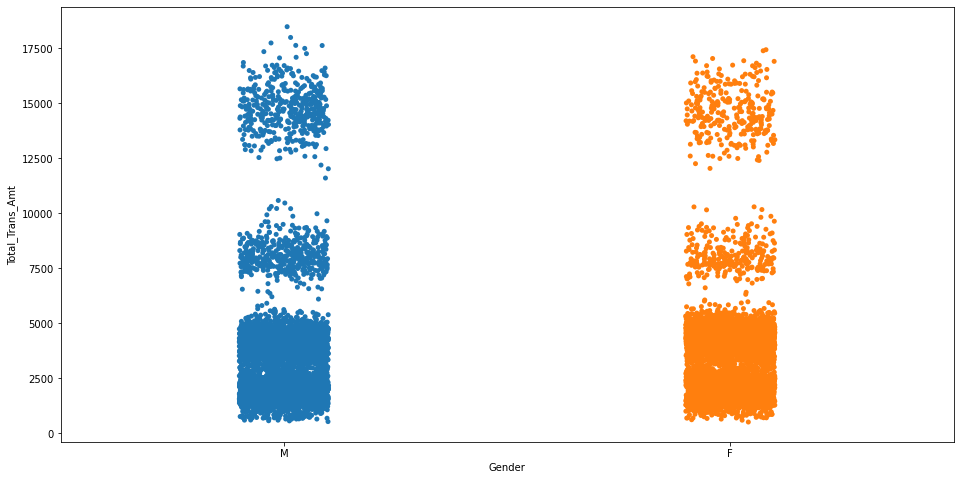

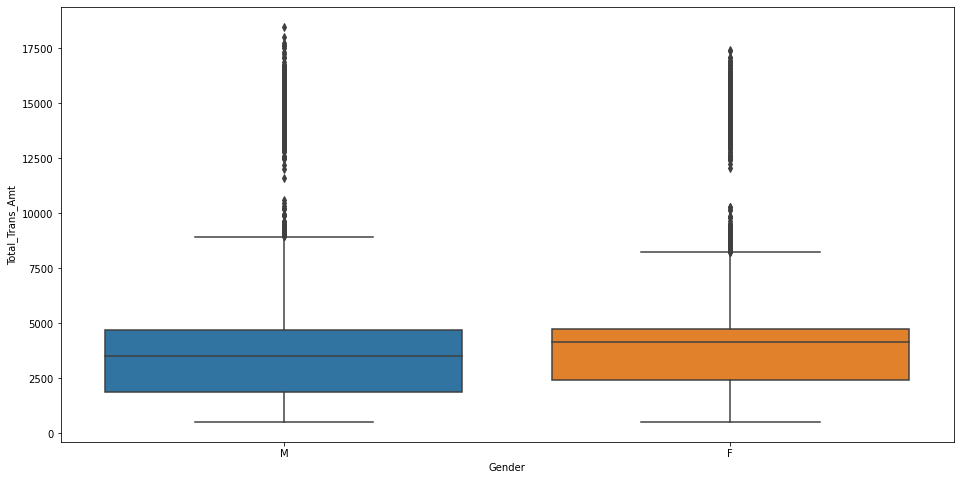

In [60]:
# Create stripplot for Gender and Total_Trans_Amt.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Total_Trans_Amt');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Total_Trans_Amt')
plt.show()

* Transction amount is similar for Male and Female, Female's is little more

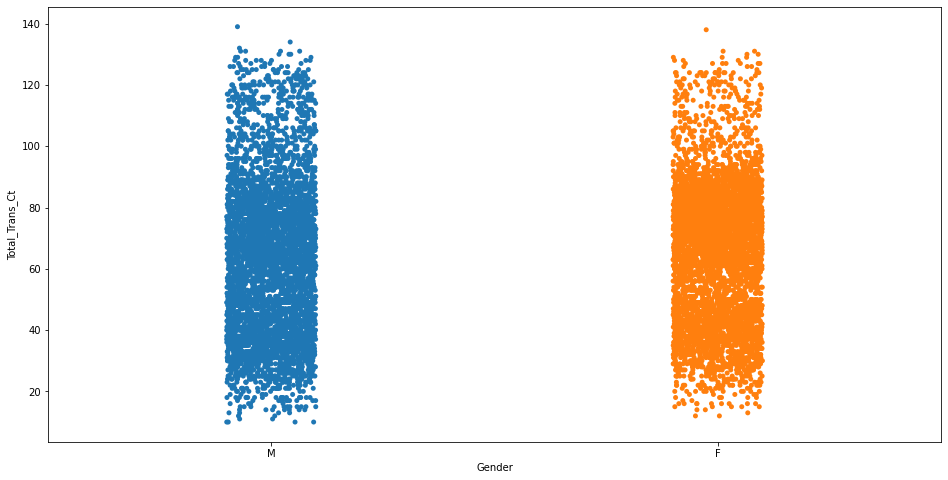

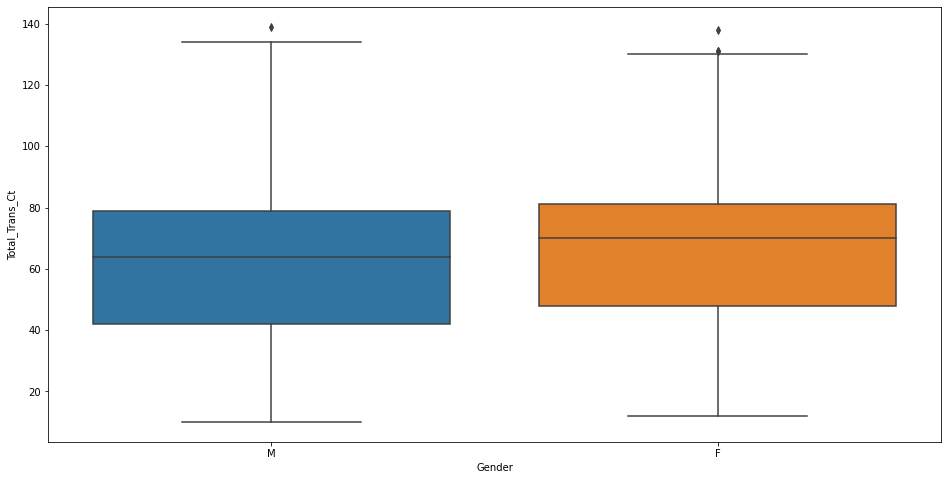

In [61]:
# Create stripplot for Gender and Total_Trans_Ct.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Total_Trans_Ct');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Total_Trans_Ct')
plt.show()

* Transction count is similar for Male and Female, Female's is little more

Let's review corelation between Income_Category and some relevant continuous features

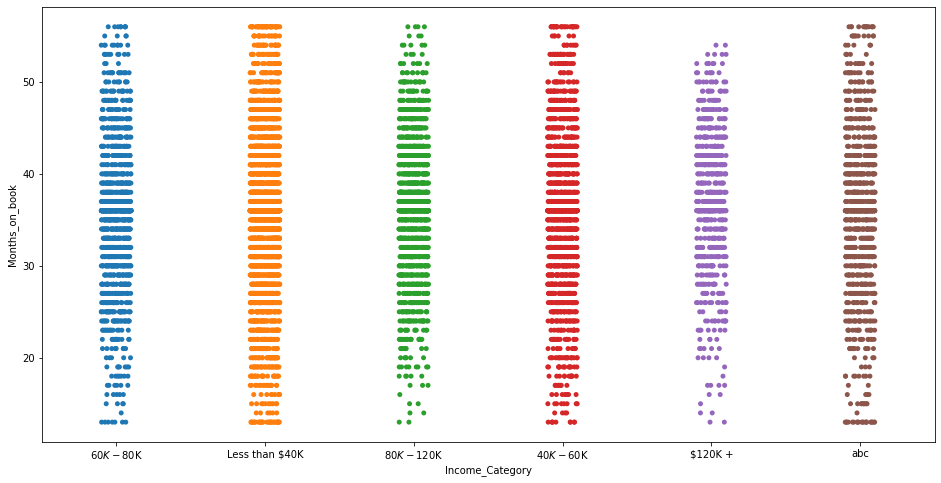

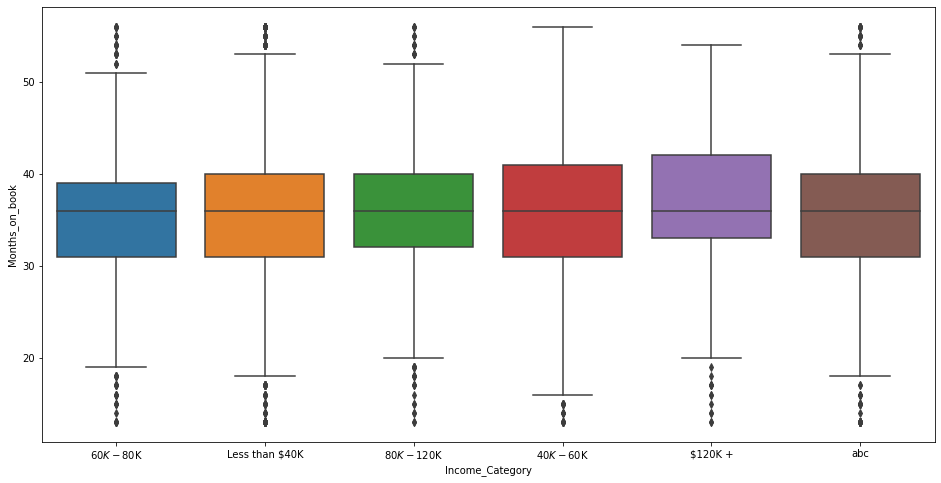

In [62]:
# Create stripplot for Income_Category and Months_on_book.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Months_on_book');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Months_on_book')
plt.show()

* No major difference observed in months on book values across different income levels

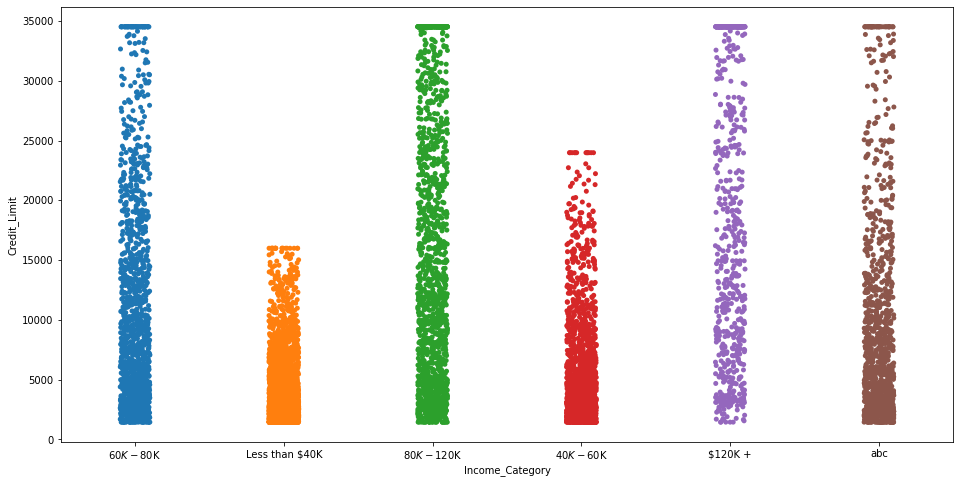

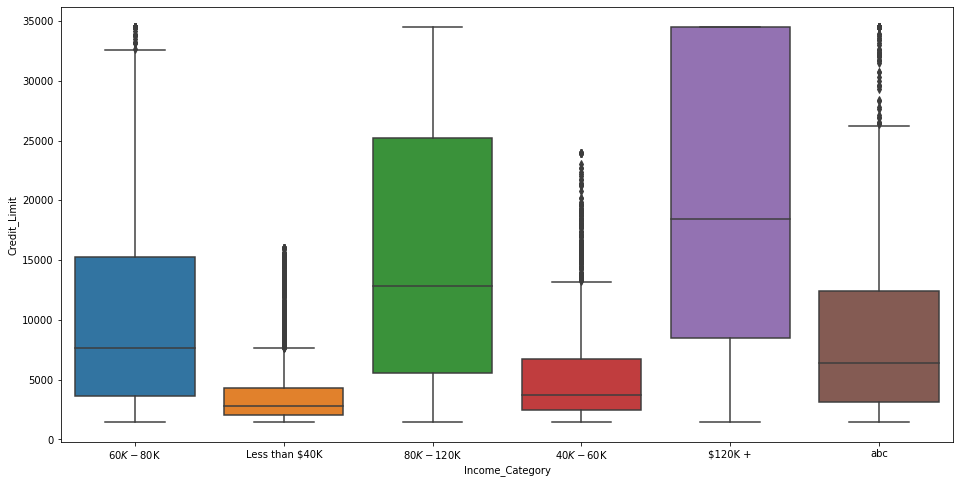

In [63]:
# Create stripplot for Income_Category and Credit_Limit.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Credit_Limit')
plt.show()

* As expected, lower the income, lower the median credit limit.
* Values for 'abc' income category seems to be like 60k-80k category

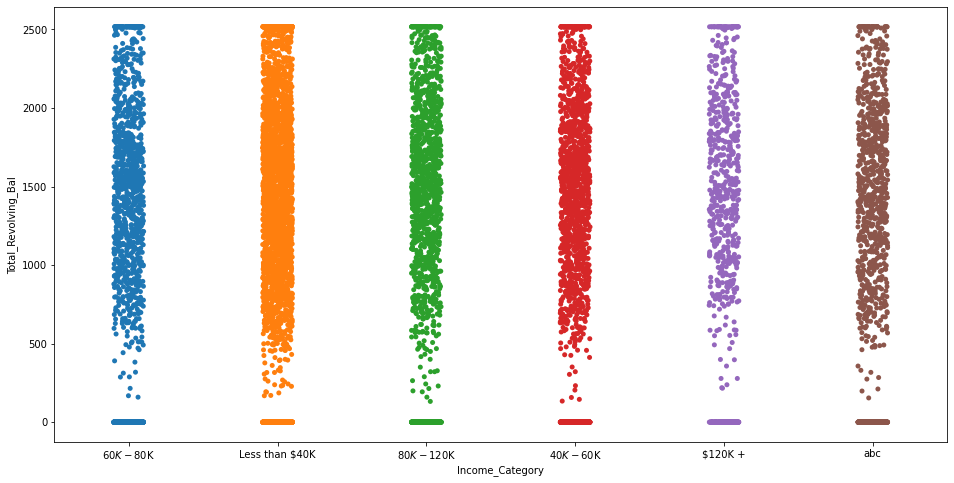

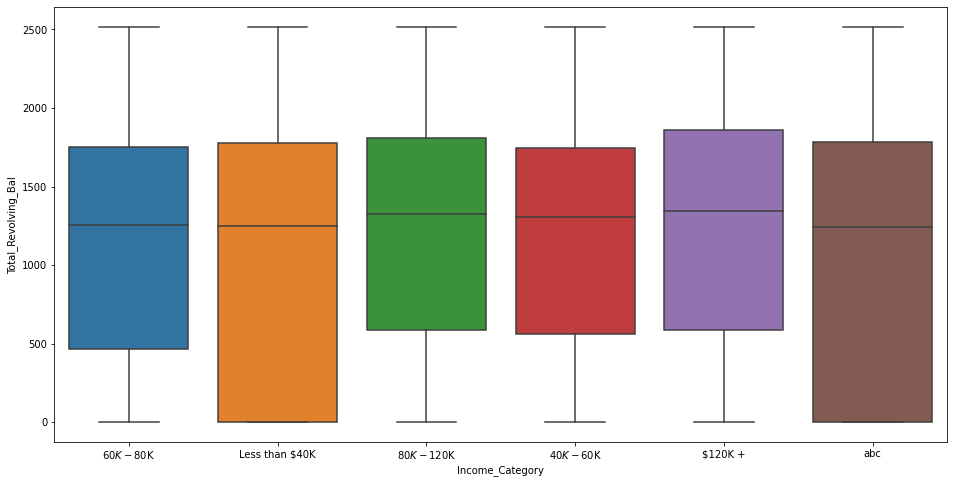

In [64]:
# Create stripplot for Income_Category and Total_Revolving_Bal.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Total_Revolving_Bal');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Total_Revolving_Bal')
plt.show()

* Median and Max revolving balance seems to be similar across all income categories. In this case, 'abc' seems similar to category 'Less than $40k'

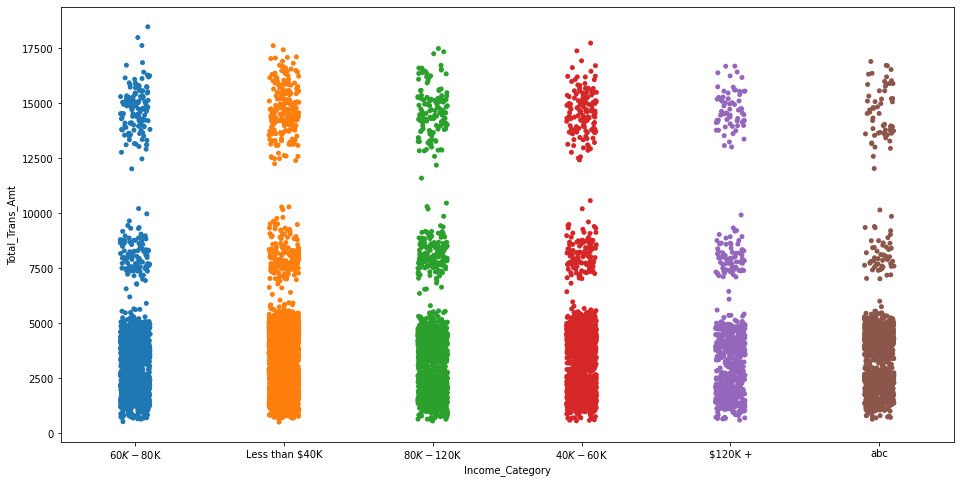

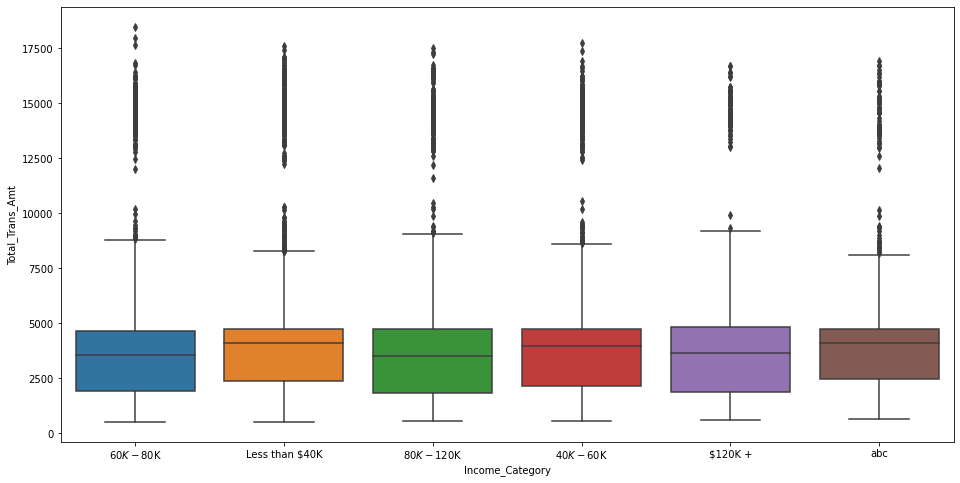

In [65]:
# Create stripplot for Income_Category and Total_Trans_Amt.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Total_Trans_Amt');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Total_Trans_Amt')
plt.show()

Median and Max trnsaction amount seems to be similar across all income categories. In this case, 'abc' seems similar to category 'Less than $40k'

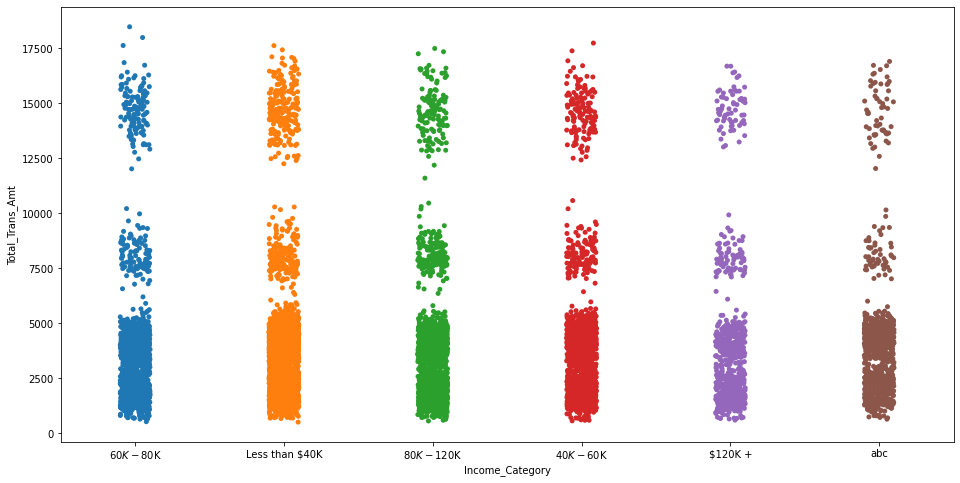

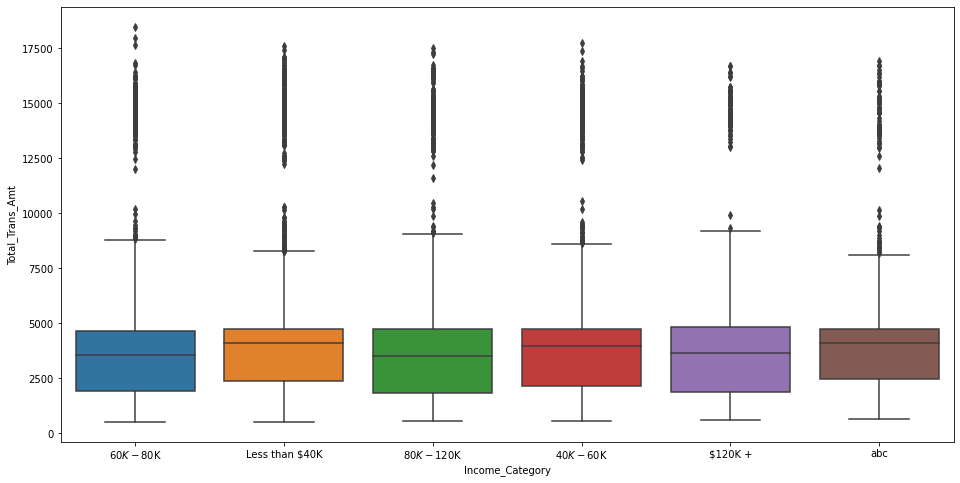

In [66]:
# Create stripplot for Income_Category and Total_Trans_Amt.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Total_Trans_Amt');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Total_Trans_Amt')
plt.show()

Not much difference in the transaction amounts based on the income categories. Median and Max transaction amount seems to be similar across all income categories. In this case, 'abc' seems similar to category 'Less than $40k'

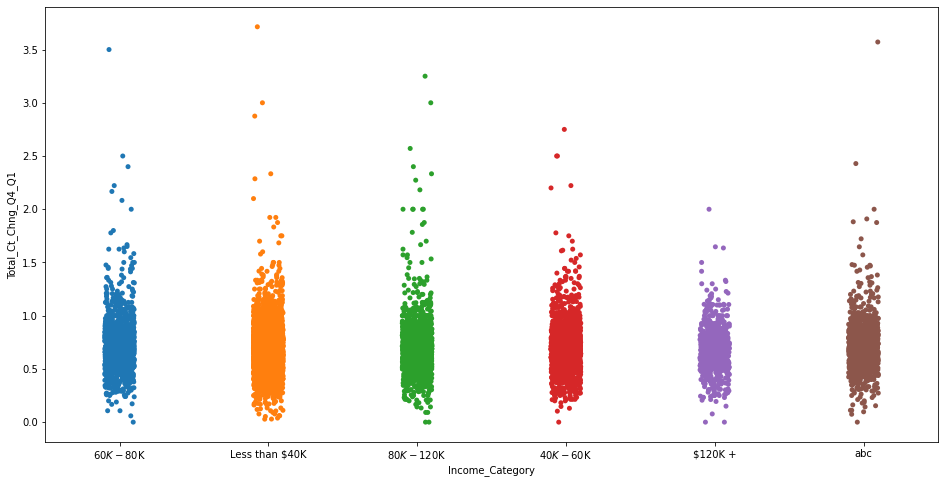

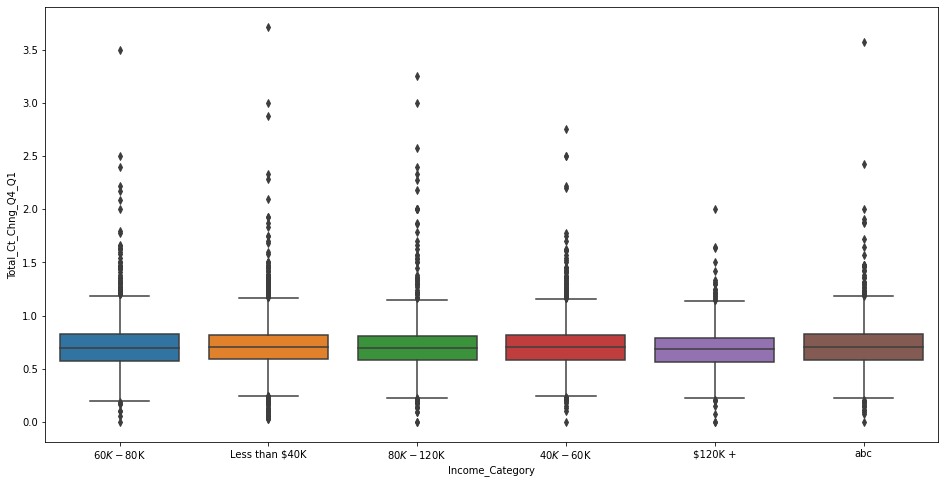

In [67]:
# Create stripplot for Income_Category and Total_Ct_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Income_Category', y='Total_Ct_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Income_Category', y='Total_Ct_Chng_Q4_Q1')
plt.show()

Not much difference in the transaction amounts based on the income categories. Median and Max transaction count seems to be similar across all income categories. In this case, 'abc' seems similar to category 'Less than $40k'

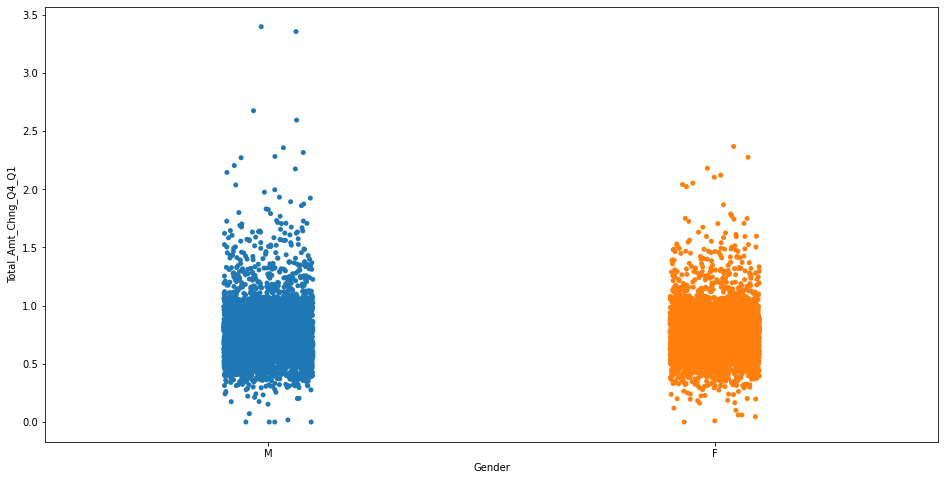

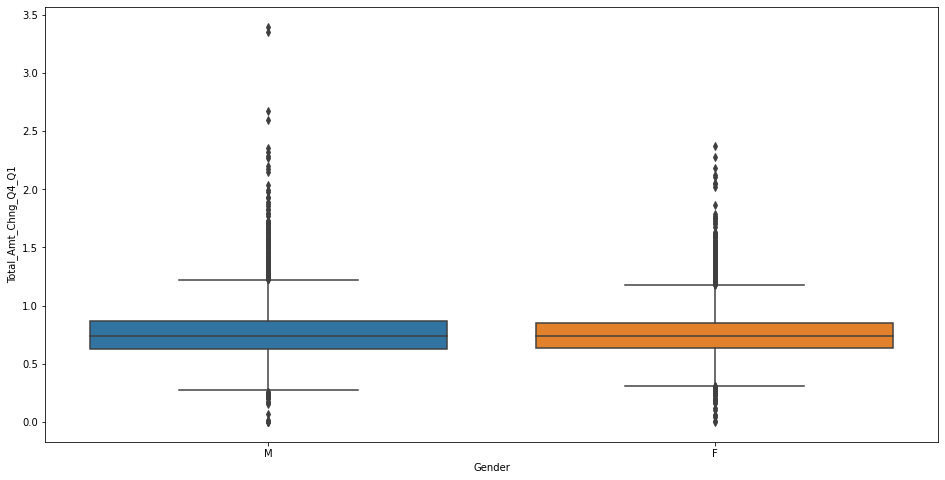

In [68]:
# Create stripplot for Gender and Total_Amt_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Total_Amt_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Total_Amt_Chng_Q4_Q1')
plt.show()

* Nothing specific to note

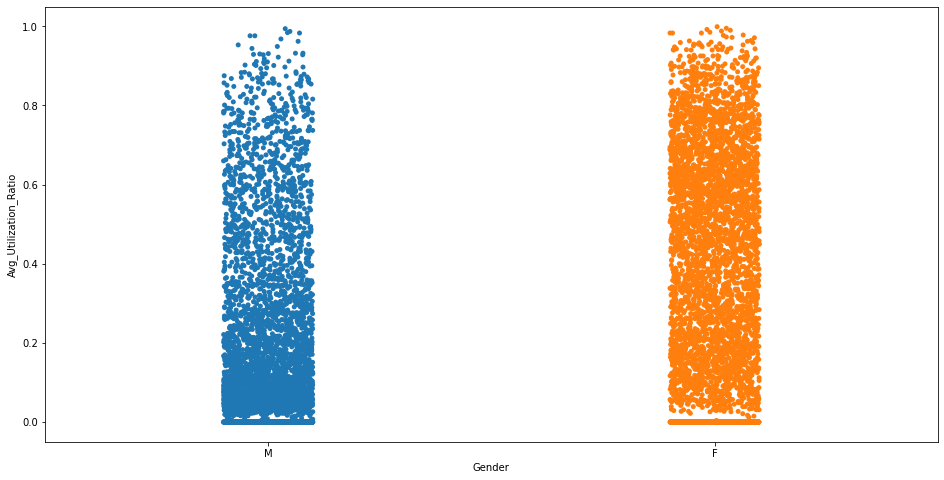

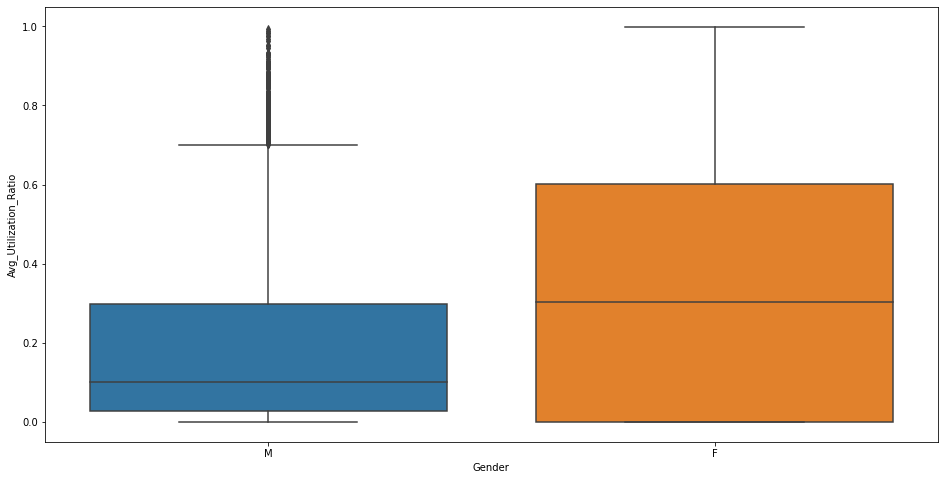

In [69]:
# Create stripplot for Gender and Avg_Utilization_Ratio.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Avg_Utilization_Ratio');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Avg_Utilization_Ratio')
plt.show()

* Overall utilization is more in Females than in Males

Let's review corelation between Card_Category and some relevant continuous features

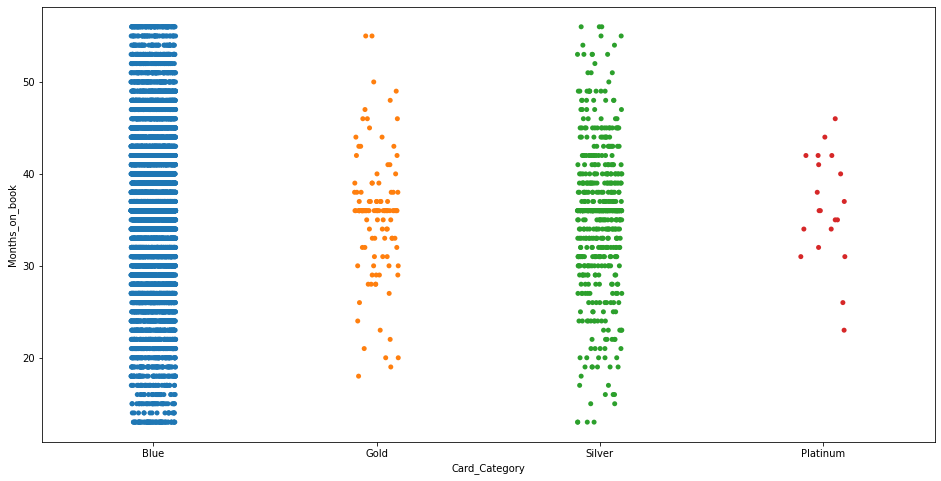

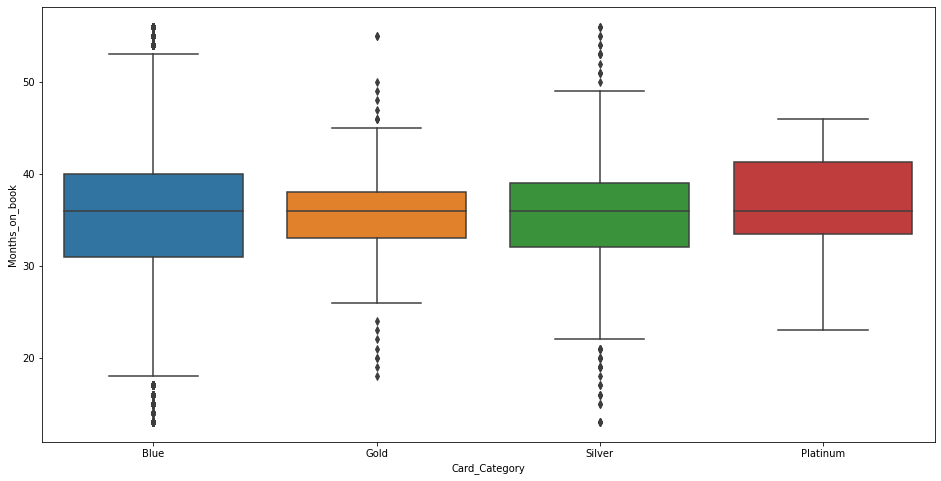

In [70]:
# Create stripplot for Card_Category and Months_on_book.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Months_on_book');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Months_on_book')
plt.show()

* Not much difference in months on book based on the card categories

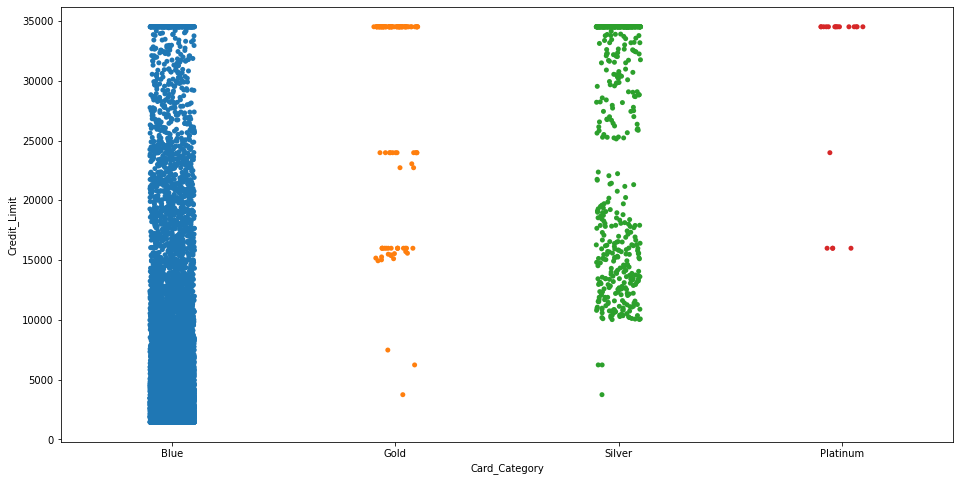

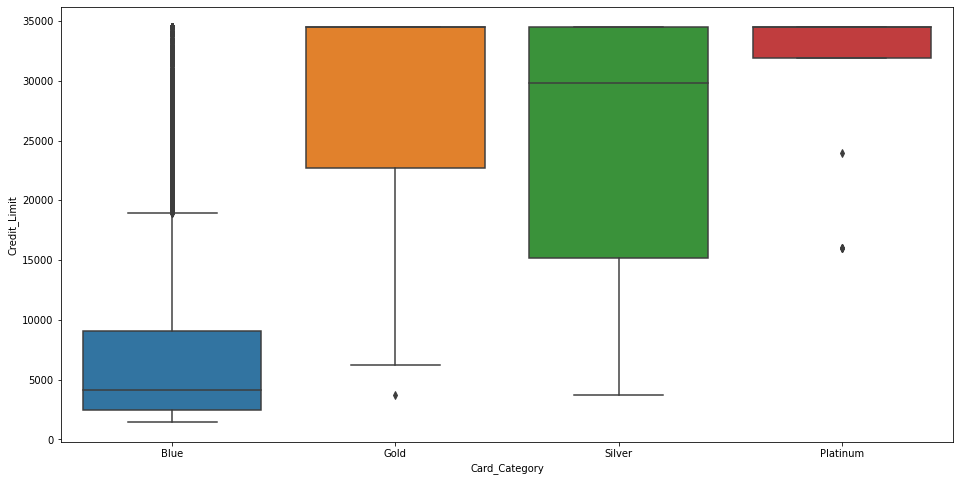

In [71]:
# Create stripplot for Card_Category and Credit_Limit.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Credit_Limit')
plt.show()

* Significant difference in the credit limits across card categories. Credit limit on Blue card is the lowest, although there are several outliers as well. This is expected as Blue card is largely used by customers with lower income levels. Silver card has a significant range in credit limit.

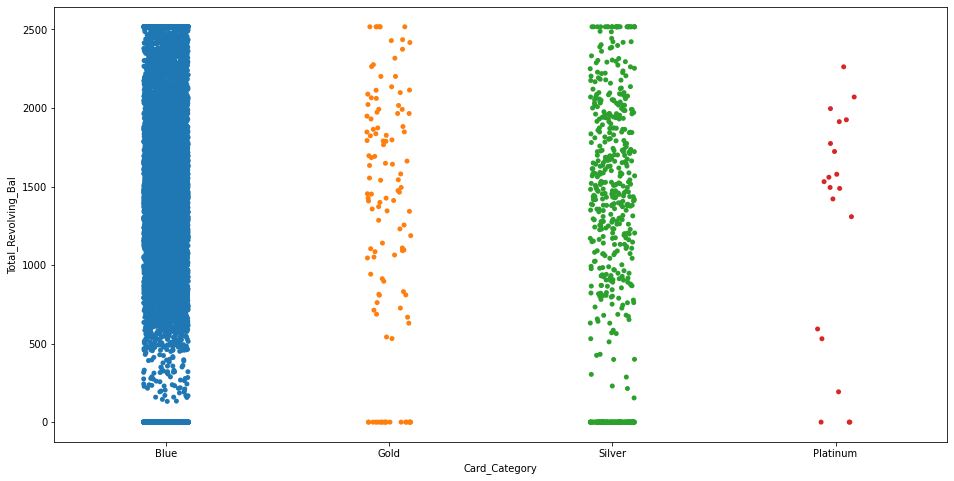

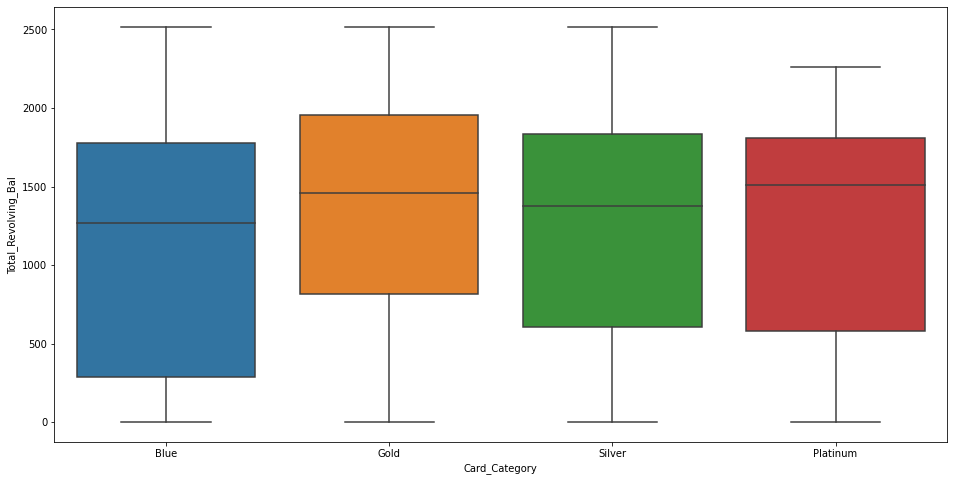

In [72]:
# Create stripplot for Card_Category and Total_Revolving_Bal.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Total_Revolving_Bal');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Total_Revolving_Bal')
plt.show()

* Median revolving balance of all other cards is more than Blue card. Howeverm Blue card's IQR is more than other card types.

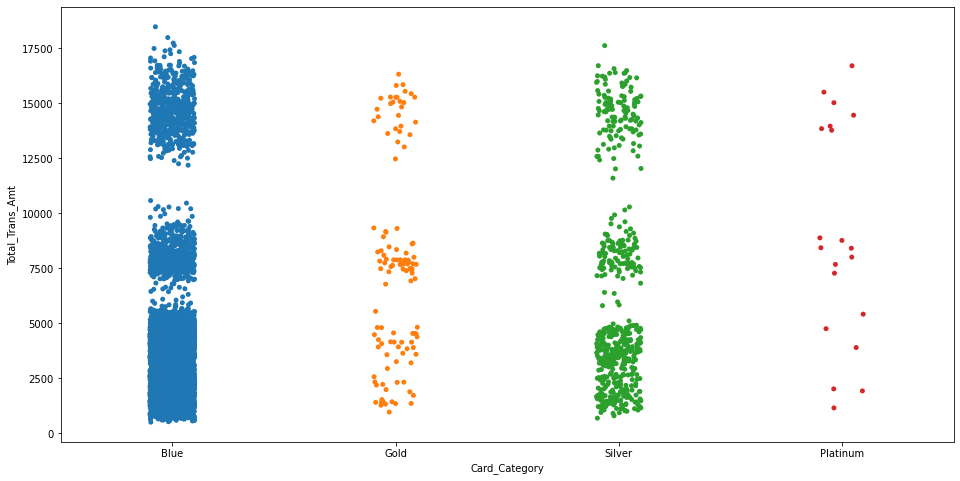

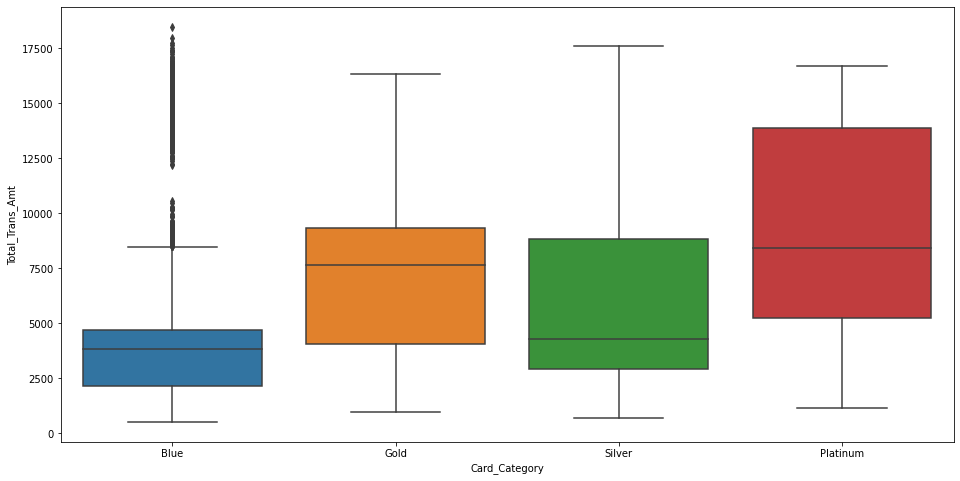

In [73]:
# Create stripplot for Card_Category and Total_Trans_Amt.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Total_Trans_Amt');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Total_Trans_Amt')
plt.show()

* Total transaction amount is lowest for Blue cards, which is expected as Blue cards are most popular and most attrited customers are Blue card holders.

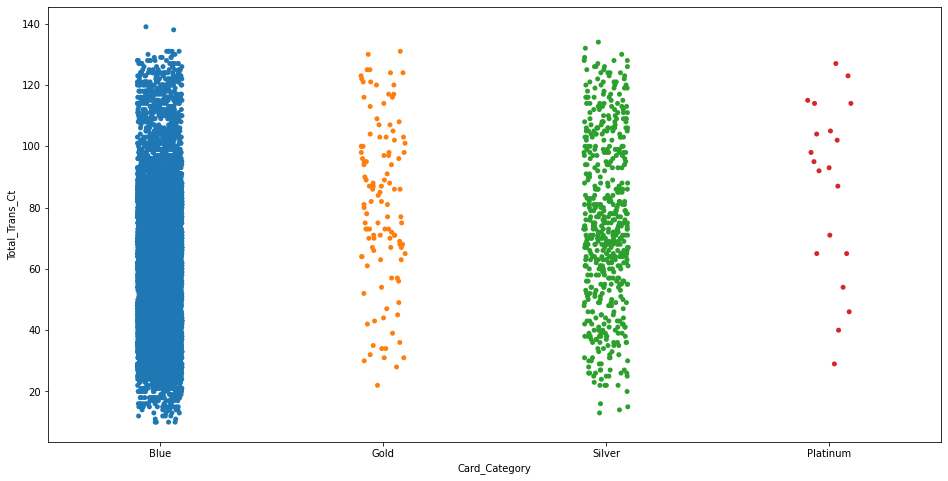

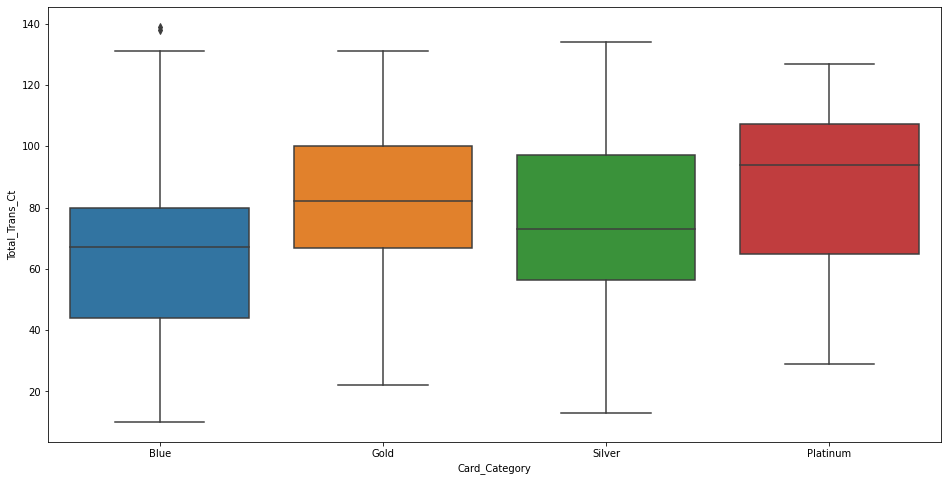

In [74]:
# Create stripplot for Card_Category and Total_Trans_Ct.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Total_Trans_Ct');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Total_Trans_Ct')
plt.show()

* Total transaction count is lowest for Blue cards, which is expected as Blue cards are most popular and most attrited customers are Blue card holders.

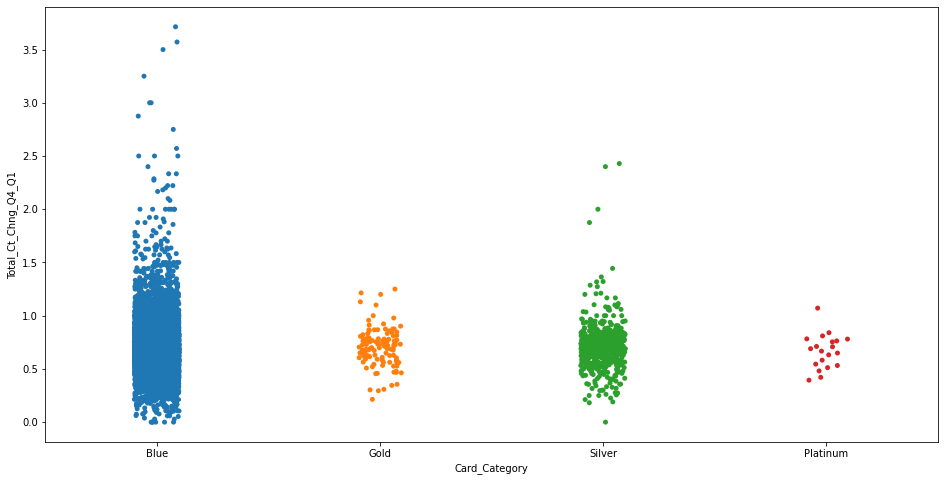

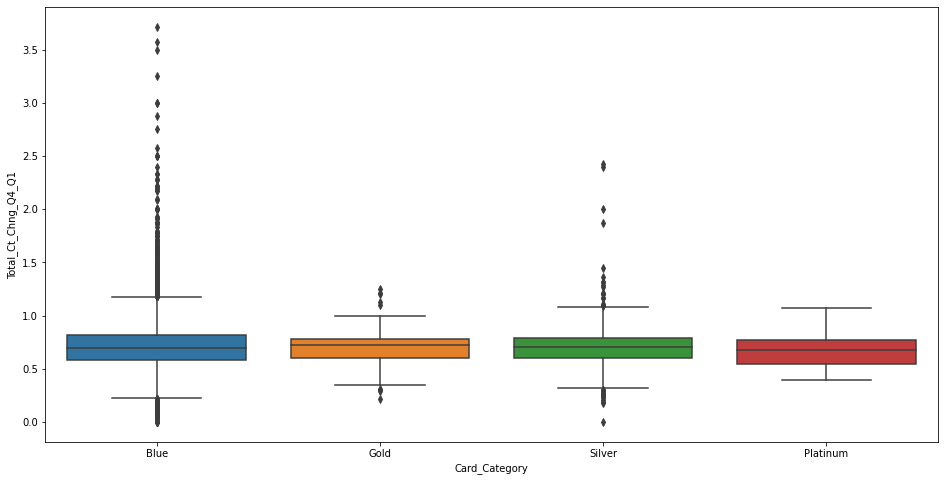

In [75]:
# Create stripplot for Card_Category and Total_Ct_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Total_Ct_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Total_Ct_Chng_Q4_Q1')
plt.show()

* Nothing specific to report

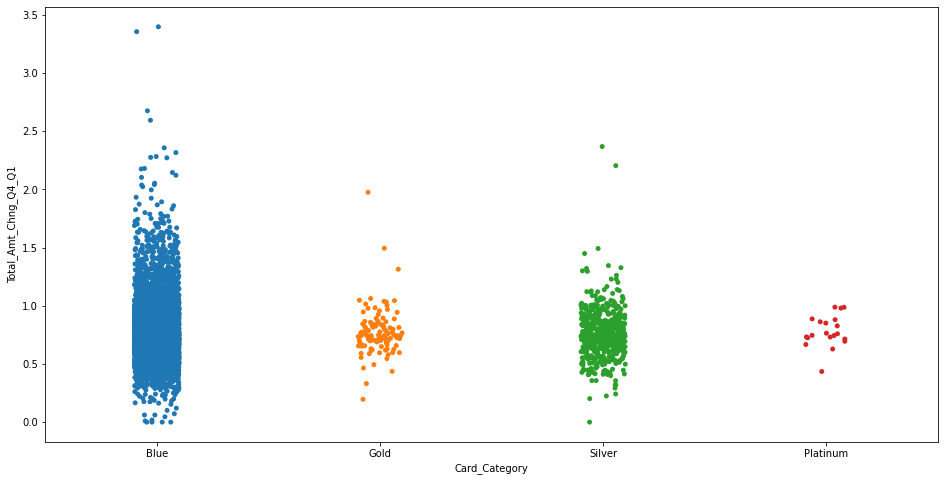

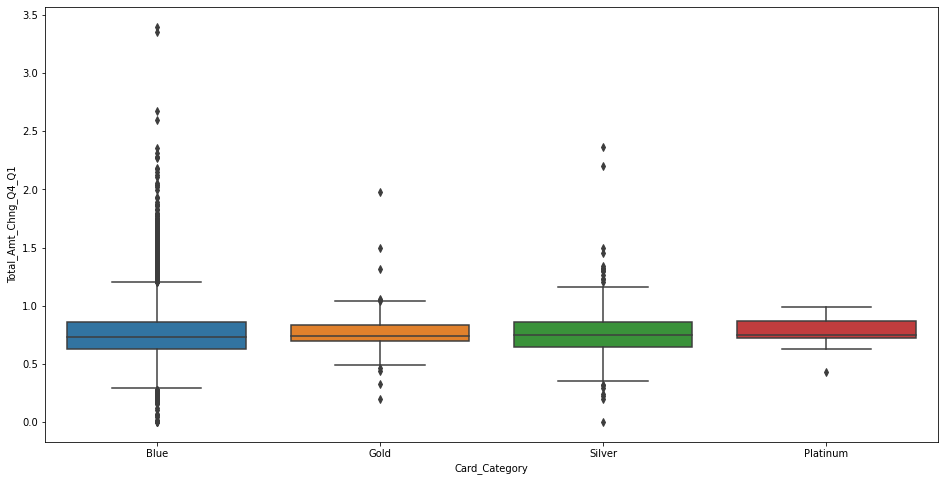

In [76]:
# Create stripplot for Card_Category and Total_Amt_Chng_Q4_Q1.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Total_Amt_Chng_Q4_Q1');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Total_Amt_Chng_Q4_Q1')
plt.show()

* Nothing specific to report

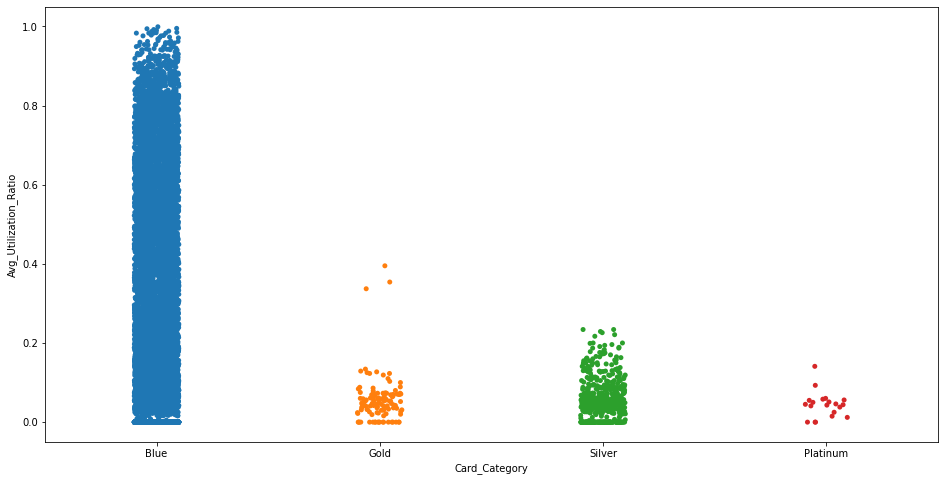

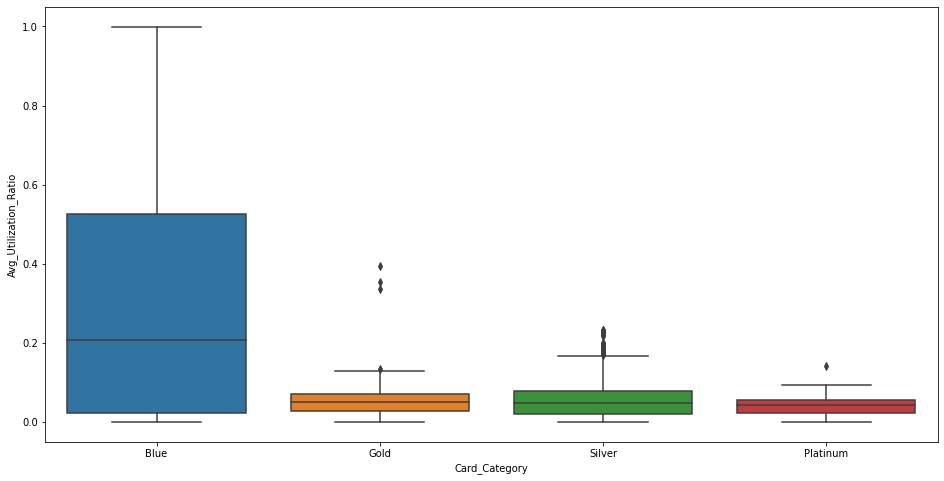

In [77]:
# Create stripplot for Card_Category and Avg_Utilization_Ratio.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Card_Category', y='Avg_Utilization_Ratio');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Card_Category', y='Avg_Utilization_Ratio')
plt.show()

* Average Utilization Ratio is more for Blue card holders, than for other card holders.

## 8c. EDA - Insights Summary

### Univariate Analysis

* As mentioned in the problem statement, about 16% customers have attrited.
* Customer Profile of attrited customers
	* Lower credit limits
	* Significanty lesser Total revolving balance than existing customers
	* Significanty lesser Total transaction amount than existing customers
	* Significanty lesser Total transaction amount than existing customers
	* Smaller ratio of transaction counts between Q4 and Q1

Attrition_Flag

This is the Dependent or Target Feature. 

Data has about 84% records for Existing Customers and 16% for Attrited Customers. So, the dataset is fairly imbalanced.

Distribution of all catgory / object features like Card Category, Income category etc. is same for both classes of customers, no differences observed in particular for attrited customers

Customer_Age

* Nice Normal-like distribution
* There are few outliers, that need to be investigated

Gender

* Distribution of all catgory / object features like Card Category, Income category etc. is same for both Gender values, EXCEPT for Income Category. 
* For Income category, there are NO females in income categories more than 60K. Categories 60K-80K, 80-120K and 120K+ are missing altogether for female customers. Is the bank missing a large segment of customers?
* There are sizable records with income category 'abc', majority of thoese are Females. Should be a point for verification with SMEs.


Dependent_count

* Nothing worth noting. Distribution of all catgory / object features like Card Category, Income category etc. is same for all Dependent_count values. 

Education_Level

* Sizable popuation thats 'Uneducated'
* Even at higher education levels like Post-Graduate and Doctorate, highest number of customers with 'Less than 40K' incomes, which is surprising.


Marital_Status

* Nothing additional to note

Income_Category

* Most number of records wth 'Less than 40K' income. In general, more customer on lower end of the income levels


Card_Category

* Nothing new to report, Blue followed by Silver are the most popular cards


Months_on_book

* Symmetrically distributed, mean little over 36
* There are lower as well as uppoer outliers that will be invesigated and treated as appropriate

Total_Relationship_Count

* Majority of the customers hold 3 or more product
* Proportion of the customers attrited is more in customers holding lower number of Products.

Months_Inactive_12_mon

* Majority of the customers have been inactive for 3 or more months in last 12 months. This can be alarming and an indication of lesser engaged customers
* Same pattern for attrited customers as well

Contacts_Count_12_mon

* Most of the customers seem to have fair contact with the bank, although they may be inactive
* There are customers with 0 contact in last 12 months, which is not necessarily bad as most of them are still existing customers


Credit_Limit

* Right skewed distribution, that should be scaled to make it as Normal as possible
* Significant outliers, that need to be investigated and treated as necessary
* 75% of the customer have credit limit around 11000

Total_Revolving_Bal

* No outliers
* Many customers with 0 revolving balance, which is possible and good for them
* Range of values is from 0 to about 2500
* Skewed distribution,that should be scaled to make it as Normal as possible

Avg_Open_To_Buy

* Distribution looks very similar to Credit Limit
* Several outliers that need to be investigated

Total_Trans_Amt

* Multiple modes in the distribution
* Several upper outliers that need to be investigated

Total_Trans_Ct

* Multiple modes in the distribution
* Some upper outliers that need to be investigated
* Average number of transaction count is between 60 and 70. But there is a range between 10 and 81 for number of transactions
 

Total_Ct_Chng_Q4_Q1

* Ratio is less than 1 for most of the customers, indicating that there were lesser transactions in Q4 than in Q1, which is alarming
* There are several outliers, with value more than 1, which is good and seems legit

Total_Amt_Chng_Q4_Q1

* Ratio is less than 1 for most of the customers, indicating that there were lesser transactions in Q4 than in Q1, which is alarming
* There are several outliers, with value more than 1, which is good and seems legit

Avg_Utilization_Ratio

* Values range from 0 and 1, indicating that there are no customers who spend more than the credit limit available



### Multivariate Analysis


Strong corelation (>= 0.7 absolute value) exists between features -

* Customer_Age and Months_on_book - Incidental corelation

* Credit_Limit and Avg_Open_To_Buy - Corelation of 1. One of the features should be removed from the dataset to avoid multicollinearity. We will retain Credit_Limit

* Total_Trans_Amt and Total_Trans_Ct - Logical relationship. However, both features indicate different aspects of the customer spend, so we will retain both

Moderate corelation (between 0.3 and 0.7 absolute value) exist between below features -

* Total_Relationship_Count and Total_Trans_Amt - Negative corelation, which is surprising. More the relationship count lesser the transaction amount!

* Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 - Positive corelation, which seems logical

* Credit_Limit and Avg_Utilization_Ratio - Fairly corelated negatively. More the credit limit lesser the utilization ratio as customers may not be spending more just because more credit limit is available

* Total_Revolving_Bal and Avg_Utilization_Ratio - Logical corelation, more balance indicates that more of the credit limit is being utlized

* Avg_Open_To_Buy and Avg_Utilization_Ratio - Logical corelation, more utilization of the credit limit means less available to buy

Some differences in the corelation is observed when the data is segmented based on Attrition_Flag

* Total_Trans_Amt and Total_Trans_Ct are more strongly corelated to Total_Ct_Chng_Q4_Q1 for Attrited customers. This corelation is very weak for existing customers.

* Not much difference in credit limit for existing and attrited customers. Looks like customers with little lower credit limit seems to have attrited


Total revolving balance of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce use of the credit card from the bank and eventually close the account

Similar to Total revolving balance. Total transaction amount of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account

Similar to Total transaction amount. Total transaction count of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account
Ratio of transaction counts between Q4 and Q1 is smaller for attrited customers

As expected, lower the income, lower the median credit limit.

Significant difference in the credit limits across card categories. Credit limit on Blue card is the lowest, although there are several outliers as well. This is expected as Blue card is largely used by customers with lower income levels. Silver card has a significant range in credit limit.

Total transaction amount is lowest for Blue cards, which is expected as Blue cards are most popular and most attrited customers are Blue card holders.

Total transaction count is lowest for Blue cards, which is expected as Blue cards are most popular and most attrited customers are Blue card holders.






# 9. Prepare TRAIN , VALIDATION and TEST datasets

Separate TRAIN, VALIDATION and TEST datasets from TOTAL dataset in 60 / 20 / 20 proportion. 

TRAIN set will be used for training the models.

VAL set will be used for validating the model performance and hyperparameter tuning.

TEST set will be treated like Production dataset and performance of the final model will be checked on TEST dataset.

We will use stratify on target feature while splitting the datasets. This will ensure that proportion of both classes will be similar in all datasets.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Let's separate Dependent and Independent features in X and y

In [79]:
# Separate Dependent and Independent features

# Independant features
X = df.drop('Attrition_Flag', axis=1)

# Dependent features
y = df['Attrition_Flag']

In [80]:
# Let's separate data for TRAIN , VALIDATION and TEST in the prportion of 50/25/25

# creating temp and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

# Split temp further into train and val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify = y_temp)


Check sample records in Train, Val and Test datasets.

In [81]:
# Check sample records for TRAIN

X_train.sample(10, random_state=1)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
3418            60      F                0     High School         Single   
9300            58      M                1     High School        Married   
3286            40      F                4             NaN         Single   
6700            56      F                1     High School        Married   
3558            50      M                1             NaN        Married   
8134            51      F                1             NaN        Married   
9027            44      M                4             NaN        Married   
9609            58      M                4     High School        Married   
1869            63      F                1        Graduate        Married   
8497            40      F                2             NaN         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
3418     $40K - $60K          Blue              55                         1   
9300    $80K - $120K          Blue              50                         1   
3286  Less than $40K          Blue              36                         6   
6700             abc          Blue              42                         5   
3558         $120K +          Blue              36                         6   
8134     $40K - $60K          Blue              36                         2   
9027         $120K +          Blue              36                         4   
9609     $60K - $80K          Blue              53                         1   
1869  Less than $40K          Blue              53                         6   
8497     $40K - $60K          Blue              29                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3418                       5                      5    10882.0000   
9300                       1                      3    34516.0000   
3286                       3                      4     7587.0000   
6700                       2                      3     3674.0000   
3558                       3                      2    20968.0000   
8134                       1                      1     1438.3000   
9027                       3                      3    34516.0000   
9609                       3                      0    13784.0000   
1869                       1                      3     2675.0000   
8497                       3                      3     2351.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3418                 2517        8365.0000                0.2660   
9300                 1341       33175.0000                0.8120   
3286                    0        7587.0000                0.8200   
6700                 2517        1157.0000                0.8540   
3558                    0       20968.0000                0.6400   
8134                  468         970.3000                0.7470   
9027                    0       34516.0000                1.0430   
9609                  698       13086.0000                0.7500   
1869                 2517         158.0000                0.9570   
8497                 1337        1014.0000                0.6130   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3418             1861              46               0.2780   
9300            13988             127               0.7890   
3286             3157              59               0.8440   
6700             2608              45               0.7310   
3558             2823              61               0.7940   
8134             4425              81               1.0770   
9027             5425              60               0.8750   
9609            13120              91               0.7840   
1869             1959              56               1.0000   
8497             5115              84               0.7870   

      Avg_Utilization_Ratio  
3418                 0.2310  
9300                 0.03

In [82]:
# Check sample records for VAL

X_val.sample(10, random_state=1)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
3565            65      M                1        Graduate         Single   
1241            55      F                2             NaN        Married   
9156            41      M                2        Graduate         Single   
1009            60      M                0      Uneducated        Married   
726             42      M                5             NaN            NaN   
1782            51      M                3     High School        Married   
6503            49      F                3        Graduate         Single   
6431            44      M                4      Uneducated        Married   
4478            50      F                2      Uneducated         Single   
2126            46      F                3     High School         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
3565             abc          Blue              53                         6   
1241             abc          Blue              50                         6   
9156         $120K +          Blue              37                         5   
1009     $60K - $80K          Blue              47                         3   
726          $120K +          Blue              36                         4   
1782     $60K - $80K          Blue              36                         3   
6503  Less than $40K          Blue              42                         5   
6431    $80K - $120K        Silver              27                         4   
4478  Less than $40K          Blue              37                         6   
2126  Less than $40K        Silver              39                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3565                       2                      3    10775.0000   
1241                       1                      4    11341.0000   
9156                       3                      4    27742.0000   
1009                       3                      3     9452.0000   
726                        1                      2    34516.0000   
1782                       2                      4    10305.0000   
6503                       2                      3     2608.0000   
6431                       3                      2    34516.0000   
4478                       5                      2     1438.3000   
2126                       0                      4    13092.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3565                 1787        8988.0000                0.6480   
1241                    0       11341.0000                0.4120   
9156                 2517       25225.0000                0.8350   
1009                 2517        6935.0000                0.7300   
726                  1839       32677.0000                0.6900   
1782                  691        9614.0000                0.4850   
6503                 2455         153.0000                0.8860   
6431                 1043       33473.0000                0.6900   
4478                  754         684.3000                0.7400   
2126                 1962       11130.0000                0.6860   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3565             3432              70               0.7500   
1241             1731              46               0.5860   
9156             8646              85               0.9770   
1009             1825              50               0.6130   
726              1230              34               0.8890   
1782             1451              25               0.6670   
6503             4776              85               0.8890   
6431             4654              59               0.6390   
4478             4457              69               0.6830   
2126              936              25               0.2500   

      Avg_Utilization_Ratio  
3565                 0.1660  
1241                 0.00

In [83]:
# Check sample records for TEST

X_test.sample(10, random_state=1)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
4723            57      F                5        Graduate        Married   
1676            36      M                1        Graduate        Married   
1707            40      M                3         College         Single   
8153            43      M                0     High School         Single   
8059            59      F                0         College         Single   
9153            32      M                0        Graduate       Divorced   
7383            48      F                2        Graduate        Married   
6269            50      F                1        Graduate            NaN   
1119            38      M                2     High School        Married   
9840            38      M                0     High School        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
4723     $40K - $60K          Blue              49                         4   
1676  Less than $40K          Blue              18                         6   
1707    $80K - $120K        Silver              33                         1   
8153    $80K - $120K          Blue              36                         2   
8059  Less than $40K          Blue              55                         2   
9153     $40K - $60K          Blue              36                         2   
7383             abc          Blue              35                         3   
6269  Less than $40K          Blue              32                         6   
1119     $40K - $60K          Blue              32                         3   
9840     $60K - $80K          Blue              31                         4   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4723                       2                      2     3301.0000   
1676                       3                      3     2032.0000   
1707                       3                      4    34516.0000   
8153                       2                      2    11247.0000   
8059                       2                      3     2645.0000   
9153                       1                      1     7473.0000   
7383                       1                      1     1755.0000   
6269                       1                      3     2652.0000   
1119                       2                      2     1438.3000   
9840                       3                      3    16565.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
4723                 2517         784.0000                0.8420   
1676                 1003        1029.0000                1.0050   
1707                    0       34516.0000                0.9270   
8153                    0       11247.0000                0.6300   
8059                 1127        1518.0000                0.6230   
9153                 1253        6220.0000                0.9800   
7383                 1058         697.0000                0.6970   
6269                 1911         741.0000                0.8310   
1119                    0        1438.3000                0.8460   
9840                 1200       15365.0000                0.6800   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
4723             3939              69               1.2260   
1676             2454              46               0.5860   
1707             1112              26               0.3680   
8153             4894              85               0.9770   
8059             4251              76               0.7670   
9153            13400             104               0.7330   
7383             4719              90               0.8000   
6269             4816              79               0.8810   
1119             1999              39               0.5600   
9840            16736              99               0.8000   

      Avg_Utilization_Ratio  
4723                 0.7620  
1676                 0.49

In [84]:
# Shapes of TOTAL, TRAIN, VAL and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", X_train.shape[0], '\n', "Columns:" , X_train.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", X_val.shape[0], '\n', "Columns:" , X_val.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", X_test.shape[0], '\n', "Columns:" , X_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 10127 
 Columns: 20 

 TRAIN Dataset 
 Rows: 6075 
 Columns: 19 

 TRAIN Dataset 
 Rows: 2026 
 Columns: 19 

 TRAIN Dataset 
 Rows: 2026 
 Columns: 19 



Split is as expected. Original dataset has 20 features whereas X datasets will have 19 features as Target feature has been separated.

In [85]:
# Shapes of TOTAL, TRAIN and TEST Datasets for Dependent feature

print(" For TOTAL Dataset \n", y.value_counts(), '\n')

print(" For TRAIN Dataset \n", y_train.value_counts(), '\n')

print(" For VAL Dataset \n", y_val.value_counts(), '\n')

print(" For TEST Dataset \n", y_test.value_counts(), '\n')

 For TOTAL Dataset 
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

 For TRAIN Dataset 
 Existing Customer    5099
Attrited Customer     976
Name: Attrition_Flag, dtype: int64 

 For VAL Dataset 
 Existing Customer    1700
Attrited Customer     326
Name: Attrition_Flag, dtype: int64 

 For TEST Dataset 
 Existing Customer    1701
Attrited Customer     325
Name: Attrition_Flag, dtype: int64 



Due to use of stratify on target feature while splitting the datasets, proportion of both classes is similar in all datasets.

Let's also check if other category / object features are splitted evenly in the datasets. It is important that distinct labels for category features are same in all datasets.

In [86]:
# Check category features in TRAIN, VAL and TEST datasets

for column in X_train.select_dtypes(include='object').columns:
     
     print('\n For TOTAL Dataset: \n' , df[column].nunique())

     print('\n For TRAIN Dataset: \n' , X_train[column].nunique())

     print('\n For VAL Dataset: \n' , X_val[column].nunique())

     print('\n For TEST Dataset: \n' , X_test[column].nunique())

     print("-" * 50)    


 For TOTAL Dataset: 
 2

 For TRAIN Dataset: 
 2

 For VAL Dataset: 
 2

 For TEST Dataset: 
 2
--------------------------------------------------

 For TOTAL Dataset: 
 6

 For TRAIN Dataset: 
 6

 For VAL Dataset: 
 6

 For TEST Dataset: 
 6
--------------------------------------------------

 For TOTAL Dataset: 
 3

 For TRAIN Dataset: 
 3

 For VAL Dataset: 
 3

 For TEST Dataset: 
 3
--------------------------------------------------

 For TOTAL Dataset: 
 6

 For TRAIN Dataset: 
 6

 For VAL Dataset: 
 6

 For TEST Dataset: 
 6
--------------------------------------------------

 For TOTAL Dataset: 
 4

 For TRAIN Dataset: 
 4

 For VAL Dataset: 
 4

 For TEST Dataset: 
 4
--------------------------------------------------


Looks good. Number of unique values for category features is same in all datasets.

In [87]:
# Remove temporary variables used while splitting datasets

del X_temp
del y_temp

TRAIN, VAL and TEST Datasets are ready now.

# 10. Perform Data Pre-processing

This includes - 
1. Datatype conversions
2. Correct values if any incorrect values are present
3. Transform data to fix any discrepancies in Units of measures or any formatting issues
4. Identify outliers for numeric features and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or capping the value or replacing the values by median / mode / mean of the TRAIN dataset
5. Identify missing values and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or replacing the values by median / mode / mean of the TRAIN dataset
6. Feature Engineering if / as needed
7. Feature Scaling if / as needed

Preprocessing will be done on X_TRAIN, X_VAL and X_TEST datasets.

However, to <b>avoid data leakage</b>, transformations used on TRAIN dataset will be used on VAL and TEST datasets. Data Leakage is when VAL and TEST datasets impact model's training. With data leakage, model will not reflect performance in Production correctly.


It is possible that different features need different ways of pre-processing. Hence, pre-processing is done on each feature separately.  

## Attrition_Flag

In [88]:
y_train.value_counts()

Existing Customer    5099
Attrited Customer     976
Name: Attrition_Flag, dtype: int64

Replace values of classes to 0 (Existing Customer) and 1 (Attrited Customer)

In [89]:
# Replace values of classes to 0 (Existing Customer) and 1 (Attrited Customer)

y_train.replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

y_val.replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

y_test.replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

In [90]:
# Shapes of TOTAL, TRAIN and TEST Datasets for Independent feature

print(" For TOTAL Dataset \n", y.value_counts(), '\n')

print(" For TRAIN Dataset \n", y_train.value_counts(), '\n')

print(" For VAL Dataset \n", y_val.value_counts(), '\n')

print(" For TEST Dataset \n", y_test.value_counts(), '\n')

 For TOTAL Dataset 
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

 For TRAIN Dataset 
 0    5099
1     976
Name: Attrition_Flag, dtype: int64 

 For VAL Dataset 
 0    1700
1     326
Name: Attrition_Flag, dtype: int64 

 For TEST Dataset 
 0    1701
1     325
Name: Attrition_Flag, dtype: int64 



Looks good!

In [91]:
# Convert the datatype to Category

y_train=y_train.astype('category')

y_val=y_val.astype('category')

y_test=y_test.astype('category')

Attrition_Flag - 

* Datatype conversion - Changed from Object to Category

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Distinct values are "Attrited Customer" else "Existing Customer". These are changed to 0 (if existing customer) and 1 (if customer is attrited)

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Customer_Age

As seen in the EDA, this feature has outliers. Let's check more.

In [92]:
# Calculate quantiles and IQR values for Customer_Age on X_train

Temp_v = 'Customer_Age'
Temp_q1_Customer_Age = X_train[Temp_v].quantile(0.25)
Temp_q2_Customer_Age = X_train[Temp_v].quantile(0.5)
Temp_q3_Customer_Age = X_train[Temp_v].quantile(0.75)
Temp_iqr_Customer_Age = Temp_q3_Customer_Age-Temp_q1_Customer_Age

print('Median for' , Temp_v , 'is: ', Temp_q2_Customer_Age)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Customer_Age)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Customer_Age)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Customer_Age, '\n')

Median for Customer_Age is:  46.0
1st Quartile for Customer_Age is:  41.0
3rd Quartile for Customer_Age is:  52.0
IQR for Customer_Age is:  11.0 



In [93]:
X_train['Customer_Age'].describe()

count   6075.0000
mean      46.3979
std        8.0730
min       26.0000
25%       41.0000
50%       46.0000
75%       52.0000
max       73.0000
Name: Customer_Age, dtype: float64

In [94]:
# Check on upper outliers with IQR method

Temp_upper_whisker_Customer_Age = Temp_q3_Customer_Age + (1.5 * Temp_iqr_Customer_Age)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Customer_Age, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Customer_Age].sort_values(by='Customer_Age', ascending=False)

Upper Whisker for Customer_Age is:  68.5 

Records above Upper Whisker in TRAIN are 



Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
251            73      M                0     High School        Married   

    Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
251     $40K - $60K          Blue              36                         5   

     Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
251                       3                      2     4469.0000   

     Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251                 1125        3344.0000                1.3630   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34               1.6150   

     Avg_Utilization_Ratio  
251                 0.2520

In [95]:
print('Records above Upper Whisker in VAL are \n')
X_val[X_val[Temp_v] > Temp_upper_whisker_Customer_Age].sort_values(by='Customer_Age', ascending=False)

Records above Upper Whisker in VAL are 



Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
254            70      M                0     High School        Married   

    Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
254  Less than $40K          Blue              56                         3   

     Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
254                       2                      3     3252.0000   

     Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
254                 1495        1757.0000                0.5810   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
254             1227              15               0.8750   

     Avg_Utilization_Ratio  
254                 0.4600

In [96]:
print('Records above Upper Whisker in TEST are \n')
X_test[X_test[Temp_v] > Temp_upper_whisker_Customer_Age].sort_values(by='Customer_Age', ascending=False)

Records above Upper Whisker in TEST are 



Empty DataFrame
Columns: [Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

Customer_Age - 

* Datatype conversion - Not needed

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - There are 2 outliers with ages 73 and 70. However, these seem legit values, so decided NOT to treat them. Classifier models are not sensitive to outliers as well.

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Gender

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   int64  
 1   Gender                    6075 non-null   object 
 2   Dependent_count           6075 non-null   int64  
 3   Education_Level           5178 non-null   object 
 4   Marital_Status            5643 non-null   object 
 5   Income_Category           6075 non-null   object 
 6   Card_Category             6075 non-null   object 
 7   Months_on_book            6075 non-null   int64  
 8   Total_Relationship_Count  6075 non-null   int64  
 9   Months_Inactive_12_mon    6075 non-null   int64  
 10  Contacts_Count_12_mon     6075 non-null   int64  
 11  Credit_Limit              6075 non-null   float64
 12  Total_Revolving_Bal       6075 non-null   int64  
 13  Avg_Open_To_Buy           6075 non-null   float64
 14  Total_

In [98]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [99]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Gender'], drop_first=True)

X_val = pd.get_dummies(X_val, columns = ['Gender'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Gender'], drop_first=True)

In [100]:
# confirm that One Hot Encoding is done correctly


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   int64  
 1   Dependent_count           6075 non-null   int64  
 2   Education_Level           5178 non-null   object 
 3   Marital_Status            5643 non-null   object 
 4   Income_Category           6075 non-null   object 
 5   Card_Category             6075 non-null   object 
 6   Months_on_book            6075 non-null   int64  
 7   Total_Relationship_Count  6075 non-null   int64  
 8   Months_Inactive_12_mon    6075 non-null   int64  
 9   Contacts_Count_12_mon     6075 non-null   int64  
 10  Credit_Limit              6075 non-null   float64
 11  Total_Revolving_Bal       6075 non-null   int64  
 12  Avg_Open_To_Buy           6075 non-null   float64
 13  Total_Amt_Chng_Q4_Q1      6075 non-null   float64
 14  Total_

In [101]:
# confirm that One Hot Encoding is done correctly

X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 134 to 8597
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Dependent_count           2026 non-null   int64  
 2   Education_Level           1718 non-null   object 
 3   Marital_Status            1858 non-null   object 
 4   Income_Category           2026 non-null   object 
 5   Card_Category             2026 non-null   object 
 6   Months_on_book            2026 non-null   int64  
 7   Total_Relationship_Count  2026 non-null   int64  
 8   Months_Inactive_12_mon    2026 non-null   int64  
 9   Contacts_Count_12_mon     2026 non-null   int64  
 10  Credit_Limit              2026 non-null   float64
 11  Total_Revolving_Bal       2026 non-null   int64  
 12  Avg_Open_To_Buy           2026 non-null   float64
 13  Total_Amt_Chng_Q4_Q1      2026 non-null   float64
 14  Total_

In [102]:
# confirm that One Hot Encoding is done correctly

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 7876 to 8334
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Dependent_count           2026 non-null   int64  
 2   Education_Level           1712 non-null   object 
 3   Marital_Status            1877 non-null   object 
 4   Income_Category           2026 non-null   object 
 5   Card_Category             2026 non-null   object 
 6   Months_on_book            2026 non-null   int64  
 7   Total_Relationship_Count  2026 non-null   int64  
 8   Months_Inactive_12_mon    2026 non-null   int64  
 9   Contacts_Count_12_mon     2026 non-null   int64  
 10  Credit_Limit              2026 non-null   float64
 11  Total_Revolving_Bal       2026 non-null   int64  
 12  Avg_Open_To_Buy           2026 non-null   float64
 13  Total_Amt_Chng_Q4_Q1      2026 non-null   float64
 14  Total

Gender - 

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

## Dependent_count

In [103]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Dependent_count

* Datatype conversion - Not needed. We will retain the datatype Integer to retain the significance of the higher numeric value

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Education_Level

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   int64  
 1   Dependent_count           6075 non-null   int64  
 2   Education_Level           5178 non-null   object 
 3   Marital_Status            5643 non-null   object 
 4   Income_Category           6075 non-null   object 
 5   Card_Category             6075 non-null   object 
 6   Months_on_book            6075 non-null   int64  
 7   Total_Relationship_Count  6075 non-null   int64  
 8   Months_Inactive_12_mon    6075 non-null   int64  
 9   Contacts_Count_12_mon     6075 non-null   int64  
 10  Credit_Limit              6075 non-null   float64
 11  Total_Revolving_Bal       6075 non-null   int64  
 12  Avg_Open_To_Buy           6075 non-null   float64
 13  Total_Amt_Chng_Q4_Q1      6075 non-null   float64
 14  Total_

In [105]:
X_train['Education_Level'].value_counts()

Graduate         1866
High School      1212
Uneducated        928
College           598
Post-Graduate     299
Doctorate         275
Name: Education_Level, dtype: int64

In [106]:
X_train['Education_Level'] = X_train['Education_Level'].replace('High School', 'High-School')

X_val['Education_Level'] = X_val['Education_Level'].replace('High School', 'High-School')

X_test['Education_Level'] = X_test['Education_Level'].replace('High School', 'High-School')

In [107]:
X_train[X_train['Education_Level'].isnull()]

Customer_Age  Dependent_count Education_Level Marital_Status  \
9501            47                2             NaN       Divorced   
7947            47                2             NaN        Married   
6053            48                4             NaN        Married   
3701            43                3             NaN            NaN   
5743            49                1             NaN        Married   
...            ...              ...             ...            ...   
7256            54                2             NaN         Single   
6770            52                1             NaN       Divorced   
3346            40                4             NaN        Married   
7615            41                2             NaN            NaN   
6230            49                3             NaN        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
9501    $80K - $120K          Blue              37                         1   
7947  Less than $40K          Blue              42                         1   
6053  Less than $40K          Blue              41                         3   
3701    $80K - $120K          Blue              38                         6   
5743  Less than $40K          Blue              40                         5   
...              ...           ...             ...                       ...   
7256  Less than $40K          Blue              46                         3   
6770    $80K - $120K          Blue              42                         4   
3346     $60K - $80K          Blue              36                         3   
7615  Less than $40K          Blue              34                         6   
6230     $60K - $80K          Blue              36                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
9501                       2                      2    21714.0000   
7947                       3                      3     1438.3000   
6053                       3                      3     2447.0000   
3701                       2                      3    20348.0000   
5743                       1                      3     2636.0000   
...                      ...                    ...           ...   
7256                       2                      3     4170.0000   
6770                       4                      2     5763.0000   
3346                       2                      3    22956.0000   
7615                       3                      3     2864.0000   
6230                       1                      3    22651.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
9501                 1969       19745.0000                0.9440   
7947                    0        1438.3000                0.6770   
6053                 1267        1180.0000                0.4490   
3701                 1732       18616.0000                0.6740   
5743                 1840         796.0000                0.8440   
...                   ...              ...                   ...   
7256                  641        3529.0000                0.8150   
6770                    0        5763.0000                0.6150   
3346                 1407       21549.0000                0.7090   
7615                 1928         936.0000                0.7690   
6230                 1085       21566.0000                0.8100   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
9501            13270             104               0.6250   
7947             4624              73               0.5870   
6053             2132              37               0.3700   
3701             1624              27               0.6880   
5743             4056              67               0.8110   
...               ...             ...                  ...   
7256             3669              67               0.5950   
6770             2310              48               0.7140   


In [108]:
X_train.sample(10, random_state=1)

Customer_Age  Dependent_count Education_Level Marital_Status  \
3418            60                0     High-School         Single   
9300            58                1     High-School        Married   
3286            40                4             NaN         Single   
6700            56                1     High-School        Married   
3558            50                1             NaN        Married   
8134            51                1             NaN        Married   
9027            44                4             NaN        Married   
9609            58                4     High-School        Married   
1869            63                1        Graduate        Married   
8497            40                2             NaN         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
3418     $40K - $60K          Blue              55                         1   
9300    $80K - $120K          Blue              50                         1   
3286  Less than $40K          Blue              36                         6   
6700             abc          Blue              42                         5   
3558         $120K +          Blue              36                         6   
8134     $40K - $60K          Blue              36                         2   
9027         $120K +          Blue              36                         4   
9609     $60K - $80K          Blue              53                         1   
1869  Less than $40K          Blue              53                         6   
8497     $40K - $60K          Blue              29                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3418                       5                      5    10882.0000   
9300                       1                      3    34516.0000   
3286                       3                      4     7587.0000   
6700                       2                      3     3674.0000   
3558                       3                      2    20968.0000   
8134                       1                      1     1438.3000   
9027                       3                      3    34516.0000   
9609                       3                      0    13784.0000   
1869                       1                      3     2675.0000   
8497                       3                      3     2351.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3418                 2517        8365.0000                0.2660   
9300                 1341       33175.0000                0.8120   
3286                    0        7587.0000                0.8200   
6700                 2517        1157.0000                0.8540   
3558                    0       20968.0000                0.6400   
8134                  468         970.3000                0.7470   
9027                    0       34516.0000                1.0430   
9609                  698       13086.0000                0.7500   
1869                 2517         158.0000                0.9570   
8497                 1337        1014.0000                0.6130   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3418             1861              46               0.2780   
9300            13988             127               0.7890   
3286             3157              59               0.8440   
6700             2608              45               0.7310   
3558             2823              61               0.7940   
8134             4425              81               1.0770   
9027             5425              60               0.8750   
9609            13120              91               0.7840   
1869             1959              56               1.0000   
8497             5115              84               0.7870   

      Avg_Utilization_Ratio  Gender_M  
3418                 0.2310         0  
9300                 0.0390         1  
3286                 0.0000         0  
67

In [109]:
#Checking if there is any difference in the most frequent Education Level based on different Income categories.
# Income Category and Education Levels are usually related. Higher the Education, more the income. So we can impute missing values for Education Level based on most frequent value for each Income Category.


X_train.groupby(['Income_Category'])['Education_Level'].value_counts()

Income_Category  Education_Level
$120K +          Graduate           130
                 High-School         81
                 Uneducated          76
                 College             42
                 Doctorate           22
                 Post-Graduate       17
$40K - $60K      Graduate           323
                 High-School        218
                 Uneducated         158
                 College            108
                 Post-Graduate       66
                 Doctorate           40
$60K - $80K      Graduate           256
                 High-School        192
                 Uneducated         115
                 College             76
                 Post-Graduate       45
                 Doctorate           32
$80K - $120K     Graduate           283
                 High-School        184
                 Uneducated         133
                 College            112
                 Post-Graduate       41
                 Doctorate           34
Less th

Based on the above, looks like Graduate is the most frequent Education Level for ALL Income Categories. So, we will impute the missing values with Graduate.

In [110]:
SI = SimpleImputer(strategy="most_frequent")

X_train['Education_Level'] = SI.fit_transform(X_train[['Education_Level']])

X_val['Education_Level'] = SI.transform(X_val[['Education_Level']])
X_test['Education_Level'] = SI.transform(X_test[['Education_Level']])


In [111]:
X_train[X_train['Education_Level'].isnull()]

Empty DataFrame
Columns: [Customer_Age, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Gender_M]
Index: []

In [112]:
X_train.sample(10, random_state=1)

Customer_Age  Dependent_count Education_Level Marital_Status  \
3418            60                0     High-School         Single   
9300            58                1     High-School        Married   
3286            40                4        Graduate         Single   
6700            56                1     High-School        Married   
3558            50                1        Graduate        Married   
8134            51                1        Graduate        Married   
9027            44                4        Graduate        Married   
9609            58                4     High-School        Married   
1869            63                1        Graduate        Married   
8497            40                2        Graduate         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
3418     $40K - $60K          Blue              55                         1   
9300    $80K - $120K          Blue              50                         1   
3286  Less than $40K          Blue              36                         6   
6700             abc          Blue              42                         5   
3558         $120K +          Blue              36                         6   
8134     $40K - $60K          Blue              36                         2   
9027         $120K +          Blue              36                         4   
9609     $60K - $80K          Blue              53                         1   
1869  Less than $40K          Blue              53                         6   
8497     $40K - $60K          Blue              29                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3418                       5                      5    10882.0000   
9300                       1                      3    34516.0000   
3286                       3                      4     7587.0000   
6700                       2                      3     3674.0000   
3558                       3                      2    20968.0000   
8134                       1                      1     1438.3000   
9027                       3                      3    34516.0000   
9609                       3                      0    13784.0000   
1869                       1                      3     2675.0000   
8497                       3                      3     2351.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3418                 2517        8365.0000                0.2660   
9300                 1341       33175.0000                0.8120   
3286                    0        7587.0000                0.8200   
6700                 2517        1157.0000                0.8540   
3558                    0       20968.0000                0.6400   
8134                  468         970.3000                0.7470   
9027                    0       34516.0000                1.0430   
9609                  698       13086.0000                0.7500   
1869                 2517         158.0000                0.9570   
8497                 1337        1014.0000                0.6130   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3418             1861              46               0.2780   
9300            13988             127               0.7890   
3286             3157              59               0.8440   
6700             2608              45               0.7310   
3558             2823              61               0.7940   
8134             4425              81               1.0770   
9027             5425              60               0.8750   
9609            13120              91               0.7840   
1869             1959              56               1.0000   
8497             5115              84               0.7870   

      Avg_Utilization_Ratio  Gender_M  
3418                 0.2310         0  
9300                 0.0390         1  
3286                 0.0000         0  
67

In [113]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Education_Level'], drop_first=True)

X_val = pd.get_dummies(X_val, columns = ['Education_Level'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Education_Level'], drop_first=True)

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   6075 non-null   int64  
 1   Dependent_count                6075 non-null   int64  
 2   Marital_Status                 5643 non-null   object 
 3   Income_Category                6075 non-null   object 
 4   Card_Category                  6075 non-null   object 
 5   Months_on_book                 6075 non-null   int64  
 6   Total_Relationship_Count       6075 non-null   int64  
 7   Months_Inactive_12_mon         6075 non-null   int64  
 8   Contacts_Count_12_mon          6075 non-null   int64  
 9   Credit_Limit                   6075 non-null   float64
 10  Total_Revolving_Bal            6075 non-null   int64  
 11  Avg_Open_To_Buy                6075 non-null   float64
 12  Total_Amt_Chng_Q4_Q1           6075 non-null  

Education_Level -

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Needed. Missing values imputed using Mode for Train dataset. Same mode is used for Val and Test datasets as well. In real scenario, this would have been confirmed with SME.

* Feature Enginering - One Hot Encoding done

* Feature Scaling - Not needed

## Marital_Status

In [115]:
X_train['Marital_Status'].value_counts()

Married     2848
Single      2346
Divorced     449
Name: Marital_Status, dtype: int64

In [116]:
X_train['Marital_Status'].isnull().sum()

432

In [117]:
X_train[X_train['Marital_Status'].isnull()]

Customer_Age  Dependent_count Marital_Status Income_Category  \
3594             47                4            NaN             abc   
3776             64                1            NaN  Less than $40K   
10064            43                4            NaN  Less than $40K   
3701             43                3            NaN    $80K - $120K   
5411             44                3            NaN  Less than $40K   
...             ...              ...            ...             ...   
1045             42                4            NaN     $40K - $60K   
15               44                4            NaN    $80K - $120K   
4374             42                2            NaN             abc   
7615             41                2            NaN  Less than $40K   
8438             46                2            NaN         $120K +   

      Card_Category  Months_on_book  Total_Relationship_Count  \
3594           Blue              36                         3   
3776           Blue              56                         3   
10064        Silver              31                         6   
3701           Blue              38                         6   
5411           Blue              39                         6   
...             ...             ...                       ...   
1045         Silver              37                         3   
15             Blue              37                         5   
4374           Blue              32                         3   
7615           Blue              34                         6   
8438           Blue              34                         1   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3594                        3                      3    18873.0000   
3776                        1                      2     6167.0000   
10064                       2                      2    13651.0000   
3701                        2                      3    20348.0000   
5411                        1                      3     5024.0000   
...                       ...                    ...           ...   
1045                        6                      2    15871.0000   
15                          1                      2     4234.0000   
4374                        3                      4     4035.0000   
7615                        3                      3     2864.0000   
8438                        3                      2    24431.0000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3594                     0       18873.0000                0.6360   
3776                     0        6167.0000                0.4220   
10064                    0       13651.0000                1.0460   
3701                  1732       18616.0000                0.6740   
5411                  2209        2815.0000                0.6600   
...                    ...              ...                   ...   
1045                  2086       13785.0000                0.7450   
15                     972        3262.0000                1.7070   
4374                  1003        3032.0000                0.5830   
7615                  1928         936.0000                0.7690   
8438                   892       23539.0000                0.4170   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3594              2021              38               0.5200   
3776              1648              43               0.5360   
10064             9772              71               0.7750   
3701              1624              27               0.6880   
5411              4908              73               0.6590   
...                ...             ...                  ...   
1045              1562              43               0.9550   
15                1348              27               1.7000   
4374              4589              89               0.6480   
7615              4641              78               0.6600   
8438      

In [118]:
X_train.sample(10, random_state=111)

Customer_Age  Dependent_count Marital_Status Income_Category  \
2598            35                2        Married    $80K - $120K   
1463            48                3         Single     $40K - $60K   
5087            57                3         Single    $80K - $120K   
938             60                2        Married  Less than $40K   
6106            54                3         Single    $80K - $120K   
2067            38                1        Married     $60K - $80K   
4062            45                3       Divorced     $60K - $80K   
8989            51                0         Single    $80K - $120K   
3569            58                1         Single    $80K - $120K   
2610            55                3        Married  Less than $40K   

     Card_Category  Months_on_book  Total_Relationship_Count  \
2598          Blue              36                         5   
1463          Blue              36                         3   
5087          Blue              38                         4   
938           Blue              36                         4   
6106        Silver              42                         3   
2067          Blue              25                         6   
4062          Blue              35                         6   
8989          Blue              33                         1   
3569          Blue              49                         3   
2610          Blue              35                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
2598                       2                      2     4408.0000   
1463                       2                      3     7400.0000   
5087                       3                      1    12663.0000   
938                        3                      2     3460.0000   
6106                       1                      2    34516.0000   
2067                       2                      3     9303.0000   
4062                       3                      2     5065.0000   
8989                       3                      1    34516.0000   
3569                       3                      2     9890.0000   
2610                       2                      3     1872.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2598                 1463        2945.0000                0.7280   
1463                  636        6764.0000                0.9720   
5087                 1028       11635.0000                0.7910   
938                  2517         943.0000                1.1440   
6106                 2488       32028.0000                0.5520   
2067                 1599        7704.0000                1.4080   
4062                 1362        3703.0000                0.6800   
8989                 1228       33288.0000                0.7470   
3569                    0        9890.0000                0.6530   
2610                 1167         705.0000                0.5170   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2598             2001              49               0.4850   
1463             1568              51               0.5000   
5087             3297              54               0.6880   
938              1752              34               1.1250   
6106             4401              87               0.7760   
2067             2261              37               0.5420   
4062             3555              75               0.4710   
8989             7854              89               0.6480   
3569             3497              69               0.6830   
2610             2238              45               0.6070   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
2598                 0.3320         1                          0   
1463                 0.0860         1                          0   
5087                 0.0810         1                          0   
938                  0.7270         0                          0  

In [119]:
SI_Marital = SimpleImputer(strategy="most_frequent")

X_train['Marital_Status'] = SI_Marital.fit_transform(X_train[['Marital_Status']])

X_val['Marital_Status'] = SI_Marital.transform(X_val[['Marital_Status']])
X_test['Marital_Status'] = SI_Marital.transform(X_test[['Marital_Status']])


In [120]:
X_train[X_train['Marital_Status'].isnull()]

Empty DataFrame
Columns: [Customer_Age, Dependent_count, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Gender_M, Education_Level_Doctorate, Education_Level_Graduate, Education_Level_High-School, Education_Level_Post-Graduate, Education_Level_Uneducated]
Index: []

In [121]:
X_train.sample(10, random_state=111)

Customer_Age  Dependent_count Marital_Status Income_Category  \
2598            35                2        Married    $80K - $120K   
1463            48                3         Single     $40K - $60K   
5087            57                3         Single    $80K - $120K   
938             60                2        Married  Less than $40K   
6106            54                3         Single    $80K - $120K   
2067            38                1        Married     $60K - $80K   
4062            45                3       Divorced     $60K - $80K   
8989            51                0         Single    $80K - $120K   
3569            58                1         Single    $80K - $120K   
2610            55                3        Married  Less than $40K   

     Card_Category  Months_on_book  Total_Relationship_Count  \
2598          Blue              36                         5   
1463          Blue              36                         3   
5087          Blue              38                         4   
938           Blue              36                         4   
6106        Silver              42                         3   
2067          Blue              25                         6   
4062          Blue              35                         6   
8989          Blue              33                         1   
3569          Blue              49                         3   
2610          Blue              35                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
2598                       2                      2     4408.0000   
1463                       2                      3     7400.0000   
5087                       3                      1    12663.0000   
938                        3                      2     3460.0000   
6106                       1                      2    34516.0000   
2067                       2                      3     9303.0000   
4062                       3                      2     5065.0000   
8989                       3                      1    34516.0000   
3569                       3                      2     9890.0000   
2610                       2                      3     1872.0000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2598                 1463        2945.0000                0.7280   
1463                  636        6764.0000                0.9720   
5087                 1028       11635.0000                0.7910   
938                  2517         943.0000                1.1440   
6106                 2488       32028.0000                0.5520   
2067                 1599        7704.0000                1.4080   
4062                 1362        3703.0000                0.6800   
8989                 1228       33288.0000                0.7470   
3569                    0        9890.0000                0.6530   
2610                 1167         705.0000                0.5170   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2598             2001              49               0.4850   
1463             1568              51               0.5000   
5087             3297              54               0.6880   
938              1752              34               1.1250   
6106             4401              87               0.7760   
2067             2261              37               0.5420   
4062             3555              75               0.4710   
8989             7854              89               0.6480   
3569             3497              69               0.6830   
2610             2238              45               0.6070   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
2598                 0.3320         1                          0   
1463                 0.0860         1                          0   
5087                 0.0810         1                          0   
938                  0.7270         0                          0  

In [122]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Marital_Status'], drop_first=True)

X_val = pd.get_dummies(X_val, columns = ['Marital_Status'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Marital_Status'], drop_first=True)

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   6075 non-null   int64  
 1   Dependent_count                6075 non-null   int64  
 2   Income_Category                6075 non-null   object 
 3   Card_Category                  6075 non-null   object 
 4   Months_on_book                 6075 non-null   int64  
 5   Total_Relationship_Count       6075 non-null   int64  
 6   Months_Inactive_12_mon         6075 non-null   int64  
 7   Contacts_Count_12_mon          6075 non-null   int64  
 8   Credit_Limit                   6075 non-null   float64
 9   Total_Revolving_Bal            6075 non-null   int64  
 10  Avg_Open_To_Buy                6075 non-null   float64
 11  Total_Amt_Chng_Q4_Q1           6075 non-null   float64
 12  Total_Trans_Amt                6075 non-null  

Marital_Status

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Needed. Missing values imputed using Mode for Train dataset. In real scenario, this would have been confirmed with SME

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

## Income_Category

In [124]:
X_train['Income_Category'].value_counts()

Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
abc                668
$120K +            436
Name: Income_Category, dtype: int64

As we have seen earlier, incorrect value 'abc' needs to be handled.

In [125]:
X_train['Income_Category'].isnull().sum()

0

In [126]:
X_train['Income_Category'] = X_train['Income_Category'].replace('abc', np.nan)

X_val['Income_Category'] = X_val['Income_Category'].replace('abc', np.nan)

X_test['Income_Category'] = X_test['Income_Category'].replace('abc', np.nan)

In [127]:
X_train.sample(10, random_state=1)

Customer_Age  Dependent_count Income_Category Card_Category  \
3418            60                0     $40K - $60K          Blue   
9300            58                1    $80K - $120K          Blue   
3286            40                4  Less than $40K          Blue   
6700            56                1             NaN          Blue   
3558            50                1         $120K +          Blue   
8134            51                1     $40K - $60K          Blue   
9027            44                4         $120K +          Blue   
9609            58                4     $60K - $80K          Blue   
1869            63                1  Less than $40K          Blue   
8497            40                2     $40K - $60K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3418              55                         1                       5   
9300              50                         1                       1   
3286              36                         6                       3   
6700              42                         5                       2   
3558              36                         6                       3   
8134              36                         2                       1   
9027              36                         4                       3   
9609              53                         1                       3   
1869              53                         6                       1   
8497              29                         1                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3418                      5    10882.0000                 2517   
9300                      3    34516.0000                 1341   
3286                      4     7587.0000                    0   
6700                      3     3674.0000                 2517   
3558                      2    20968.0000                    0   
8134                      1     1438.3000                  468   
9027                      3    34516.0000                    0   
9609                      0    13784.0000                  698   
1869                      3     2675.0000                 2517   
8497                      3     2351.0000                 1337   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3418        8365.0000                0.2660             1861              46   
9300       33175.0000                0.8120            13988             127   
3286        7587.0000                0.8200             3157              59   
6700        1157.0000                0.8540             2608              45   
3558       20968.0000                0.6400             2823              61   
8134         970.3000                0.7470             4425              81   
9027       34516.0000                1.0430             5425              60   
9609       13086.0000                0.7500            13120              91   
1869         158.0000                0.9570             1959              56   
8497        1014.0000                0.6130             5115              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
3418               0.2780                 0.2310         0   
9300               0.7890                 0.0390         1   
3286               0.8440                 0.0000         0   
6700               0.7310                 0.6850         0   
3558               0.7940                 0.0000         1   
8134               1.0770                 0.3250         0   
9027               0.8750                 0.0000         1   
9609               0.7840                 0.0510         1   
1869               1.0000                 0.9410         0   
8497               0.7870                 0.5690         0   

      Education_Level_Doctorate  Education_Level_Graduate  \
3418                          0                         0   
9300              

In [128]:
SI_Income = SimpleImputer(strategy="most_frequent")

X_train['Income_Category'] = SI_Income.fit_transform(X_train[['Income_Category']])

X_val['Income_Category'] = SI_Income.transform(X_val[['Income_Category']])
X_test['Income_Category'] = SI_Income.transform(X_test[['Income_Category']])

In [129]:
X_train.sample(10, random_state=1)

Customer_Age  Dependent_count Income_Category Card_Category  \
3418            60                0     $40K - $60K          Blue   
9300            58                1    $80K - $120K          Blue   
3286            40                4  Less than $40K          Blue   
6700            56                1  Less than $40K          Blue   
3558            50                1         $120K +          Blue   
8134            51                1     $40K - $60K          Blue   
9027            44                4         $120K +          Blue   
9609            58                4     $60K - $80K          Blue   
1869            63                1  Less than $40K          Blue   
8497            40                2     $40K - $60K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3418              55                         1                       5   
9300              50                         1                       1   
3286              36                         6                       3   
6700              42                         5                       2   
3558              36                         6                       3   
8134              36                         2                       1   
9027              36                         4                       3   
9609              53                         1                       3   
1869              53                         6                       1   
8497              29                         1                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3418                      5    10882.0000                 2517   
9300                      3    34516.0000                 1341   
3286                      4     7587.0000                    0   
6700                      3     3674.0000                 2517   
3558                      2    20968.0000                    0   
8134                      1     1438.3000                  468   
9027                      3    34516.0000                    0   
9609                      0    13784.0000                  698   
1869                      3     2675.0000                 2517   
8497                      3     2351.0000                 1337   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3418        8365.0000                0.2660             1861              46   
9300       33175.0000                0.8120            13988             127   
3286        7587.0000                0.8200             3157              59   
6700        1157.0000                0.8540             2608              45   
3558       20968.0000                0.6400             2823              61   
8134         970.3000                0.7470             4425              81   
9027       34516.0000                1.0430             5425              60   
9609       13086.0000                0.7500            13120              91   
1869         158.0000                0.9570             1959              56   
8497        1014.0000                0.6130             5115              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
3418               0.2780                 0.2310         0   
9300               0.7890                 0.0390         1   
3286               0.8440                 0.0000         0   
6700               0.7310                 0.6850         0   
3558               0.7940                 0.0000         1   
8134               1.0770                 0.3250         0   
9027               0.8750                 0.0000         1   
9609               0.7840                 0.0510         1   
1869               1.0000                 0.9410         0   
8497               0.7870                 0.5690         0   

      Education_Level_Doctorate  Education_Level_Graduate  \
3418                          0                         0   
9300              

In [130]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Income_Category'], drop_first=True)

X_val = pd.get_dummies(X_val, columns = ['Income_Category'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Income_Category'], drop_first=True)

In [131]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Card_Category                   6075 non-null   object 
 3   Months_on_book                  6075 non-null   int64  
 4   Total_Relationship_Count        6075 non-null   int64  
 5   Months_Inactive_12_mon          6075 non-null   int64  
 6   Contacts_Count_12_mon           6075 non-null   int64  
 7   Credit_Limit                    6075 non-null   float64
 8   Total_Revolving_Bal             6075 non-null   int64  
 9   Avg_Open_To_Buy                 6075 non-null   float64
 10  Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 11  Total_Trans_Amt                 6075 non-null   int64  
 12  Total_Trans_Ct                  

Income_Category

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Customers with value 'abc', which is obviously incorrect. Treated this as missing value

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Needed. Missing values imputed using Mode for Income Category in Train dataset. In real scenario, this would have been confirmed with SME

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

## Card_Category

In [132]:
X_train['Card_Category'].value_counts()

Blue        5668
Silver       327
Gold          71
Platinum       9
Name: Card_Category, dtype: int64

In [133]:
X_train['Card_Category'].isnull().sum()

0

In [134]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Card_Category'], drop_first=True)

X_val = pd.get_dummies(X_val, columns = ['Card_Category'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Card_Category'], drop_first=True)

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Months_on_book                  6075 non-null   int64  
 3   Total_Relationship_Count        6075 non-null   int64  
 4   Months_Inactive_12_mon          6075 non-null   int64  
 5   Contacts_Count_12_mon           6075 non-null   int64  
 6   Credit_Limit                    6075 non-null   float64
 7   Total_Revolving_Bal             6075 non-null   int64  
 8   Avg_Open_To_Buy                 6075 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 10  Total_Trans_Amt                 6075 non-null   int64  
 11  Total_Trans_Ct                  6075 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             

Card_Category

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

## Months_on_book

In [136]:
# Calculate quantile and IQR values for Months_on_book on X_train

Temp_v = 'Months_on_book'
Temp_q1_Months_on_book = X_train[Temp_v].quantile(0.25)
Temp_q2_Months_on_book = X_train[Temp_v].quantile(0.5)
Temp_q3_Months_on_book = X_train[Temp_v].quantile(0.75)
Temp_iqr_Months_on_book = Temp_q3_Months_on_book-Temp_q1_Months_on_book

print('Median for' , Temp_v , 'is: ', Temp_q2_Months_on_book)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Months_on_book)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Months_on_book)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Months_on_book, '\n')

Median for Months_on_book is:  36.0
1st Quartile for Months_on_book is:  31.0
3rd Quartile for Months_on_book is:  40.0
IQR for Months_on_book is:  9.0 



In [137]:
# Check on upper outliers

Temp_upper_whisker_Months_on_book = Temp_q3_Months_on_book + (1.5 * Temp_iqr_Months_on_book)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Months_on_book, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Months_on_book]['Months_on_book'].count()

Upper Whisker for Months_on_book is:  53.5 

Records above Upper Whisker in TRAIN are 



113

In [138]:
# Check on lower outliers

Temp_lower_whisker_Months_on_book = Temp_q1_Months_on_book - (1.5 * Temp_iqr_Months_on_book)

print('Lower Whisker for', Temp_v , 'is: ', Temp_lower_whisker_Months_on_book, '\n')

print('Records below Lower Whisker in TRAIN are \n')
X_train[X_train[Temp_v] < Temp_lower_whisker_Months_on_book]['Months_on_book'].count()

Lower Whisker for Months_on_book is:  17.5 

Records below Lower Whisker in TRAIN are 



113

In [139]:
X_train['Months_on_book'].describe()

count   6075.0000
mean      35.9533
std        8.0299
min       13.0000
25%       31.0000
50%       36.0000
75%       40.0000
max       56.0000
Name: Months_on_book, dtype: float64

Max value for Months_on_book is 56 months, which is certainly possible. Hence, seems legit value, decided NOT to treat it.

Months_on_book

* Datatype conversion - Not needed. We will retain the datatype Integer to retain the significance of the higher numeric value

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Lower and Upper Outliers verified.Max value for Months_on_book is 56 months, which is certainly possible. Hence, seems legit value, decided NOT to treat it.

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Total_Relationship_Count

In [140]:
X_train['Total_Relationship_Count'].value_counts()

3    1396
6    1145
4    1142
5    1128
2     740
1     524
Name: Total_Relationship_Count, dtype: int64

Total_Relationship_Count

* Datatype conversion - Not needed. We will retain the datatype Integer to retain the significance of the higher numeric value

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Months_Inactive_12_mon

In [141]:
X_train['Months_Inactive_12_mon'].value_counts()

3    2302
2    1984
1    1322
4     278
5     103
6      69
0      17
Name: Months_Inactive_12_mon, dtype: int64

Months_Inactive_12_mon
	
* Datatype conversion - Not needed. We will retain the datatype Integer to retain the significance of the higher numeric value

* Inorrect values treatment - Not needed. There are records with 0 months inactive which is possible for active customers.

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Contacts_Count_12_mon

In [142]:
X_train['Contacts_Count_12_mon'].value_counts()

3    2024
2    1896
1     901
4     860
0     248
5     113
6      33
Name: Contacts_Count_12_mon, dtype: int64

Contacts_Count_12_mon

* Datatype conversion - Not needed. We will retain the datatype Integer to retain the significance of the higher numeric value

* Inorrect values treatment - Not needed. There are records with 0 months inactive which is possible for active customers.

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

## Credit_Limit

In [143]:
# Calculate quantile and IQR values for Credit_Limit on X_train

Temp_v = 'Credit_Limit'
Temp_q1_Credit_Limit = X_train[Temp_v].quantile(0.25)
Temp_q2_Credit_Limit = X_train[Temp_v].quantile(0.5)
Temp_q3_Credit_Limit = X_train[Temp_v].quantile(0.75)
Temp_iqr_Credit_Limit = Temp_q3_Credit_Limit-Temp_q1_Credit_Limit

print('Median for' , Temp_v , 'is: ', Temp_q2_Credit_Limit)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Credit_Limit)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Credit_Limit)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Credit_Limit, '\n')

Median for Credit_Limit is:  4568.0
1st Quartile for Credit_Limit is:  2532.0
3rd Quartile for Credit_Limit is:  11064.5
IQR for Credit_Limit is:  8532.5 



In [144]:
# Check on upper outliers

Temp_upper_whisker_Credit_Limit = Temp_q3_Credit_Limit + (1.5 * Temp_iqr_Credit_Limit)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Credit_Limit, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Credit_Limit][Temp_v].count()

Upper Whisker for Credit_Limit is:  23863.25 

Records above Upper Whisker in TRAIN are 



598

In [145]:
X_train['Credit_Limit'].describe()

count    6075.0000
mean     8656.0204
std      9138.9154
min      1438.3000
25%      2532.0000
50%      4568.0000
75%     11064.5000
max     34516.0000
Name: Credit_Limit, dtype: float64

Upper Whisker with 1.5 IQR method is 23383.75. Max value is 34516.
Value of 34516 is certainly possible, say for a customer with higher incomes. So decided NOT to treat outlier.

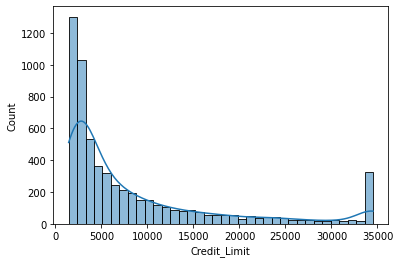

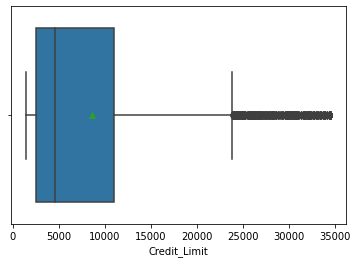

In [146]:
# Check the distribution 
# Use histplots to see distribution for Credit_Limit

sns.histplot(data=X_train,x='Credit_Limit', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Credit_Limit', showmeans=True)
plt.show()

In [147]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

pt_credit = PowerTransformer(method='box-cox')

X_train[['Credit_Limit']] = pt_credit.fit_transform(X_train[['Credit_Limit']])

X_val[['Credit_Limit']] = pt_credit.transform(X_val[['Credit_Limit']])

X_test[['Credit_Limit']] = pt_credit.transform(X_test[['Credit_Limit']])

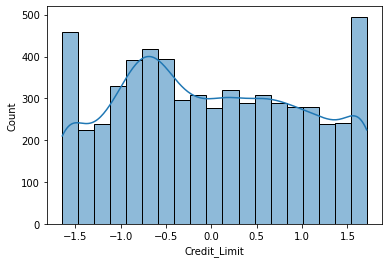

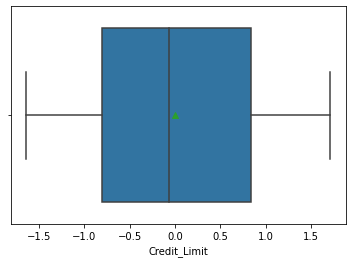

In [148]:
# Check the distribution again

# Use histplots to see distribution for Credit_Limit

sns.histplot(data=X_train,x='Credit_Limit', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Credit_Limit', showmeans=True)
plt.show()

Credit_Limit
	
* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There are upper outliers. Upper Whisker with 1.5 IQR method is 23383.75. Max value is 34516. Value of 34516 is certainly possible, say for a customer with higher incomes. So decided NOT to treat outlier.

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Uses Boxcox to transform values to normalize the distribution


## Total_Revolving_Bal

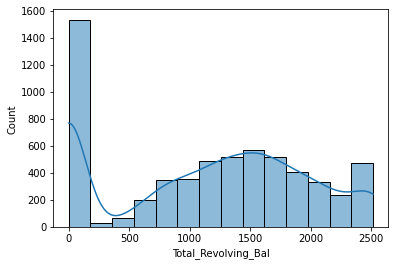

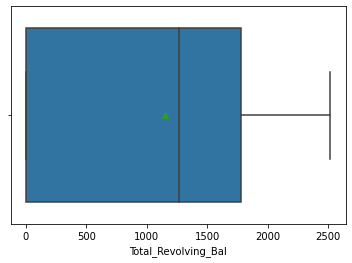

In [149]:
# Check the distribution 
# Use histplots to see distribution for Total_Revolving_Bal

sns.histplot(data=X_train,x='Total_Revolving_Bal', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Revolving_Bal', showmeans=True)
plt.show()

In [150]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

pt_revolve = PowerTransformer()

X_train[['Total_Revolving_Bal']] = pt_revolve.fit_transform(X_train[['Total_Revolving_Bal']])

X_val[['Total_Revolving_Bal']] = pt_revolve.transform(X_val[['Total_Revolving_Bal']])

X_test[['Total_Revolving_Bal']] = pt_revolve.transform(X_test[['Total_Revolving_Bal']])

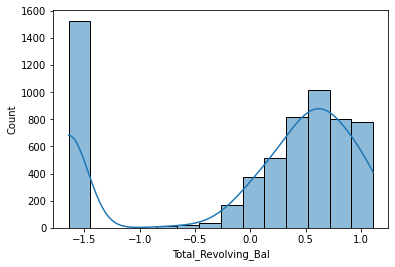

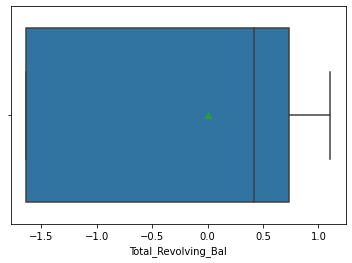

In [151]:
# Check the distribution again

# Use histplots to see distribution for Total_Revolving_Bal

sns.histplot(data=X_train,x='Total_Revolving_Bal', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Revolving_Bal', showmeans=True)
plt.show()

Total_Revolving_Bal

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Use Yeo-Johnson powertransformer to transform these values to normalize the distribution

## Avg_Open_To_Buy

* As this feature has a corelation of 1 with another feature Credit_Limit, decided to DROP this feature from analysis.

In [152]:
X_train = X_train.drop(['Avg_Open_To_Buy'], axis=1)

X_val = X_val.drop(['Avg_Open_To_Buy'], axis=1)

X_test = X_test.drop(['Avg_Open_To_Buy'], axis=1)



## Total_Trans_Amt

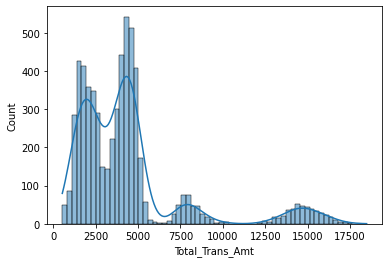

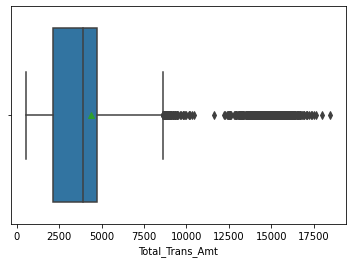

In [153]:
# Check the distribution 
# Use histplots to see distribution for Total_Trans_Amt

sns.histplot(data=X_train,x='Total_Trans_Amt', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Trans_Amt', showmeans=True)
plt.show()

In [154]:
# Calculate quantile and IQR values for Total_Trans_Amt on X_train

Temp_v = 'Total_Trans_Amt'
Temp_q1_Total_Trans_Amt = X_train[Temp_v].quantile(0.25)
Temp_q2_Total_Trans_Amt = X_train[Temp_v].quantile(0.5)
Temp_q3_Total_Trans_Amt = X_train[Temp_v].quantile(0.75)
Temp_iqr_Total_Trans_Amt = Temp_q3_Total_Trans_Amt-Temp_q1_Total_Trans_Amt

print('Median for' , Temp_v , 'is: ', Temp_q2_Total_Trans_Amt)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Total_Trans_Amt)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Total_Trans_Amt)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Total_Trans_Amt, '\n')

Median for Total_Trans_Amt is:  3877.0
1st Quartile for Total_Trans_Amt is:  2138.0
3rd Quartile for Total_Trans_Amt is:  4727.0
IQR for Total_Trans_Amt is:  2589.0 



In [155]:
# Check on upper outliers

Temp_upper_whisker_Total_Trans_Amt = Temp_q3_Total_Trans_Amt + (1.5 * Temp_iqr_Total_Trans_Amt)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Total_Trans_Amt, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Total_Trans_Amt][Temp_v].count()

Upper Whisker for Total_Trans_Amt is:  8610.5 

Records above Upper Whisker in TRAIN are 



536

In [156]:
X_train['Total_Trans_Amt'].describe()

count    6075.0000
mean     4389.7276
std      3428.2559
min       530.0000
25%      2138.0000
50%      3877.0000
75%      4727.0000
max     18484.0000
Name: Total_Trans_Amt, dtype: float64

Upper Whisker with 1.5 IQR method is 8596.125 . Max value is 18484.
Value of 18484 is certainly possible, for a customer with higher incomes. So decided NOT to treat outlier.

In [157]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

pt_Total_Trans_Amt = PowerTransformer(method='box-cox')

X_train[['Total_Trans_Amt']] = pt_Total_Trans_Amt.fit_transform(X_train[['Total_Trans_Amt']])

X_val[['Total_Trans_Amt']] = pt_Total_Trans_Amt.transform(X_val[['Total_Trans_Amt']])

X_test[['Total_Trans_Amt']] = pt_Total_Trans_Amt.transform(X_test[['Total_Trans_Amt']])

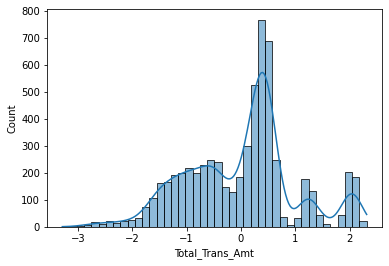

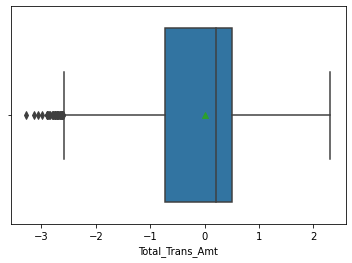

In [158]:
# Check the distribution again

# Use histplots to see distribution for Total_Trans_Amt

sns.histplot(data=X_train,x='Total_Trans_Amt', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Trans_Amt', showmeans=True)
plt.show()

Total_Trans_Amt

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There were upper outliers. But on review, decided NOT to treat them.

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Used Boxcox to transform these values to normalize the distribution

## Total_Trans_Ct

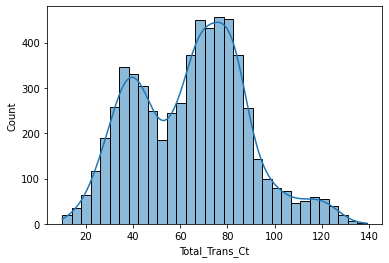

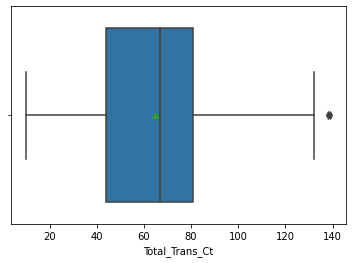

In [159]:
# Check the distribution 
# Use histplots to see distribution for Total_Trans_Ct

sns.histplot(data=X_train,x='Total_Trans_Ct', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Trans_Ct', showmeans=True)
plt.show()

In [160]:
# Calculate quantile and IQR values for Total_Trans_Ct on X_train

Temp_v = 'Total_Trans_Ct'
Temp_q1_Total_Trans_Ct = X_train[Temp_v].quantile(0.25)
Temp_q2_Total_Trans_Ct = X_train[Temp_v].quantile(0.5)
Temp_q3_Total_Trans_Ct = X_train[Temp_v].quantile(0.75)
Temp_iqr_Total_Trans_Ct = Temp_q3_Total_Trans_Ct-Temp_q1_Total_Trans_Ct

print('Median for' , Temp_v , 'is: ', Temp_q2_Total_Trans_Ct)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Total_Trans_Ct)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Total_Trans_Ct)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Total_Trans_Ct, '\n')

Median for Total_Trans_Ct is:  67.0
1st Quartile for Total_Trans_Ct is:  44.0
3rd Quartile for Total_Trans_Ct is:  81.0
IQR for Total_Trans_Ct is:  37.0 



In [161]:
# Check on upper outliers

Temp_upper_whisker_Total_Trans_Ct = Temp_q3_Total_Trans_Ct + (1.5 * Temp_iqr_Total_Trans_Ct)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Total_Trans_Ct, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Total_Trans_Ct][Temp_v].count()

Upper Whisker for Total_Trans_Ct is:  136.5 

Records above Upper Whisker in TRAIN are 



2

In [162]:
X_train['Total_Trans_Ct'].describe()

count   6075.0000
mean      64.6943
std       23.6235
min       10.0000
25%       44.0000
50%       67.0000
75%       81.0000
max      139.0000
Name: Total_Trans_Ct, dtype: float64

Upper Whisker with 1.5 IQR method is 135 . Max value is 139.
There are only 2 records with value above 135. Decided NOT to treat outliers.

In [163]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

#pt_Total_Trans_Ct = PowerTransformer(method='box-cox')
pt_Total_Trans_Ct = PowerTransformer(method='box-cox')

X_train[['Total_Trans_Ct']] = pt_Total_Trans_Ct.fit_transform(X_train[['Total_Trans_Ct']])

X_val[['Total_Trans_Ct']] = pt_Total_Trans_Ct.transform(X_val[['Total_Trans_Ct']])

X_test[['Total_Trans_Ct']] = pt_Total_Trans_Ct.transform(X_test[['Total_Trans_Ct']])

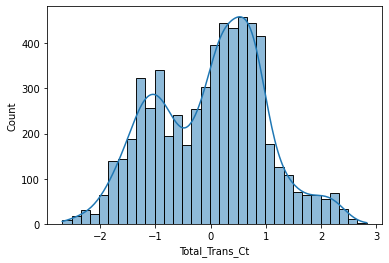

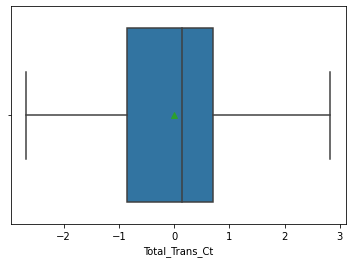

In [164]:
# Check the distribution again

# Use histplots to see distribution for Total_Trans_Ct

sns.histplot(data=X_train,x='Total_Trans_Ct', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Trans_Ct', showmeans=True)
plt.show()

Total_Trans_Ct - 
	
* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There are upper outliers, however there are only 2 such records and those seem legit. Decided NOT to treat them

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Used Boxcox to transform these values to normalize the distribution

## Total_Ct_Chng_Q4_Q1

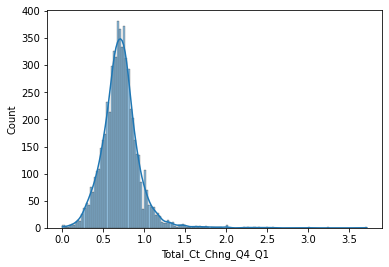

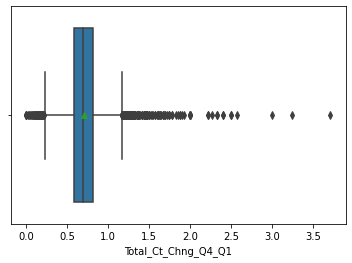

In [165]:
# Check the distribution 
# Use histplots to see distribution for Total_Ct_Chng_Q4_Q1

sns.histplot(data=X_train,x='Total_Ct_Chng_Q4_Q1', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Ct_Chng_Q4_Q1', showmeans=True)
plt.show()

In [166]:
# Calculate quantile and IQR values for Total_Ct_Chng_Q4_Q1 on X_train

Temp_v = 'Total_Ct_Chng_Q4_Q1'
Temp_q1_Total_Ct_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.25)
Temp_q2_Total_Ct_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.5)
Temp_q3_Total_Ct_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.75)
Temp_iqr_Total_Ct_Chng_Q4_Q1 = Temp_q3_Total_Ct_Chng_Q4_Q1-Temp_q1_Total_Ct_Chng_Q4_Q1

print('Median for' , Temp_v , 'is: ', Temp_q2_Total_Ct_Chng_Q4_Q1)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Total_Ct_Chng_Q4_Q1)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Total_Ct_Chng_Q4_Q1)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Total_Ct_Chng_Q4_Q1, '\n')

Median for Total_Ct_Chng_Q4_Q1 is:  0.7
1st Quartile for Total_Ct_Chng_Q4_Q1 is:  0.581
3rd Quartile for Total_Ct_Chng_Q4_Q1 is:  0.816
IQR for Total_Ct_Chng_Q4_Q1 is:  0.235 



In [167]:
# Check on upper outliers

Temp_upper_whisker_Total_Ct_Chng_Q4_Q1 = Temp_q3_Total_Ct_Chng_Q4_Q1 + (1.5 * Temp_iqr_Total_Ct_Chng_Q4_Q1)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Total_Ct_Chng_Q4_Q1, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Total_Ct_Chng_Q4_Q1][Temp_v].count()

Upper Whisker for Total_Ct_Chng_Q4_Q1 is:  1.1684999999999999 

Records above Upper Whisker in TRAIN are 



173

In [168]:
# Check on lower outliers

Temp_lower_whisker_Total_Ct_Chng_Q4_Q1 = Temp_q1_Total_Ct_Chng_Q4_Q1 - (1.5 * Temp_iqr_Total_Ct_Chng_Q4_Q1)

print('Upper Whisker for', Temp_v , 'is: ', Temp_lower_whisker_Total_Ct_Chng_Q4_Q1, '\n')

print('Records below Lower Whisker in TRAIN are \n')
X_train[X_train[Temp_v] < Temp_lower_whisker_Total_Ct_Chng_Q4_Q1][Temp_v].count()

Upper Whisker for Total_Ct_Chng_Q4_Q1 is:  0.22849999999999998 

Records below Lower Whisker in TRAIN are 



64

In [169]:
X_train['Total_Ct_Chng_Q4_Q1'].describe()

count   6075.0000
mean       0.7101
std        0.2363
min        0.0000
25%        0.5810
50%        0.7000
75%        0.8160
max        3.7140
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

Upper Whisker with 1.5 IQR method is 1.18, Lower Whisker is 0.2245. There are sizable upper and lower outliers. However, its possible and seem legit. Decided NOT to treat outliers.

Total_Ct_Chng_Q4_Q1

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There are lower and upper outliers, but those seem legit. Decided NOT to treat outliers

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Distribution looks fine, decided NOT to scale.


## Total_Amt_Chng_Q4_Q1

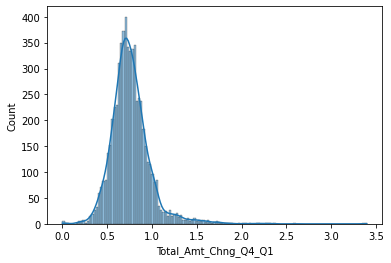

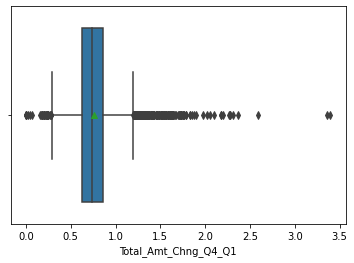

In [170]:
# Check the distribution 
# Use histplots to see distribution for Total_Amt_Chng_Q4_Q1

sns.histplot(data=X_train,x='Total_Amt_Chng_Q4_Q1', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Total_Amt_Chng_Q4_Q1', showmeans=True)
plt.show()

In [171]:
# Calculate quantile and IQR values for Total_Amt_Chng_Q4_Q1 on X_train

Temp_v = 'Total_Amt_Chng_Q4_Q1'
Temp_q1_Total_Amt_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.25)
Temp_q2_Total_Amt_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.5)
Temp_q3_Total_Amt_Chng_Q4_Q1 = X_train[Temp_v].quantile(0.75)
Temp_iqr_Total_Amt_Chng_Q4_Q1 = Temp_q3_Total_Amt_Chng_Q4_Q1-Temp_q1_Total_Amt_Chng_Q4_Q1

print('Median for' , Temp_v , 'is: ', Temp_q2_Total_Amt_Chng_Q4_Q1)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Total_Amt_Chng_Q4_Q1)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Total_Amt_Chng_Q4_Q1)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Total_Amt_Chng_Q4_Q1, '\n')

Median for Total_Amt_Chng_Q4_Q1 is:  0.736
1st Quartile for Total_Amt_Chng_Q4_Q1 is:  0.631
3rd Quartile for Total_Amt_Chng_Q4_Q1 is:  0.858
IQR for Total_Amt_Chng_Q4_Q1 is:  0.22699999999999998 



In [172]:
# Check on upper outliers

Temp_upper_whisker_Total_Amt_Chng_Q4_Q1 = Temp_q3_Total_Amt_Chng_Q4_Q1 + (1.5 * Temp_iqr_Total_Amt_Chng_Q4_Q1)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Total_Amt_Chng_Q4_Q1, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Total_Amt_Chng_Q4_Q1][Temp_v].count()

Upper Whisker for Total_Amt_Chng_Q4_Q1 is:  1.1985 

Records above Upper Whisker in TRAIN are 



231

In [173]:
# Check on lower outliers

Temp_lower_whisker_Total_Amt_Chng_Q4_Q1 = Temp_q1_Total_Amt_Chng_Q4_Q1 - (1.5 * Temp_iqr_Total_Amt_Chng_Q4_Q1)

print('Upper Whisker for', Temp_v , 'is: ', Temp_lower_whisker_Total_Amt_Chng_Q4_Q1, '\n')

print('Records below  Lower Whisker in TRAIN are \n')
X_train[X_train[Temp_v] < Temp_lower_whisker_Total_Amt_Chng_Q4_Q1][Temp_v].count()

Upper Whisker for Total_Amt_Chng_Q4_Q1 is:  0.29050000000000004 

Records below  Lower Whisker in TRAIN are 



32

In [174]:
X_train['Total_Amt_Chng_Q4_Q1'].describe()

count   6075.0000
mean       0.7606
std        0.2247
min        0.0000
25%        0.6310
50%        0.7360
75%        0.8580
max        3.3970
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

Upper Whisker with 1.5 IQR method is 1.1975 . Max value is 3.3970.
This means that there are some customers for whom transaction amount in Q4 was way above transaction amount in Q1, upto 3.39 times. This still seems legit, decided NOT to treat outliers.

Total_Amt_Chng_Q4_Q1 - 

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There are lower and upper outliers, but those seem legit. Decided NOT to treat outliers

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Distribution looks fine, decided NOT to scale.


## Avg_Utilization_Ratio

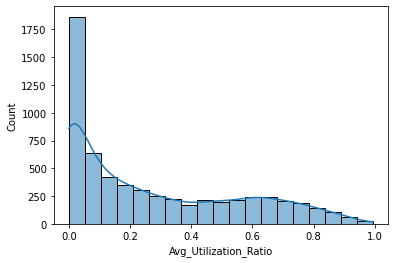

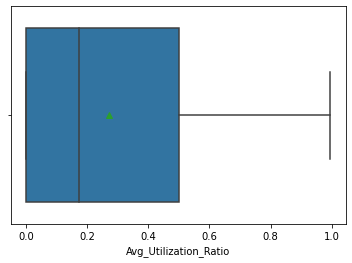

In [175]:
# Check the distribution 
# Use histplots to see distribution for Avg_Utilization_Ratio

sns.histplot(data=X_train,x='Avg_Utilization_Ratio', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Avg_Utilization_Ratio', showmeans=True)
plt.show()

Avg_Utilization_Ratio - 

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Distribution looks fine, decided NOT to scale.


## Final Dataframes

In [176]:
# Final shapes of TOTAL, TRAIN, VAL and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", X_train.shape[0], '\n', "Columns:" , X_train.shape[1], "\n")

print(" VAL Dataset \n Rows:", X_val.shape[0], '\n', "Columns:" , X_val.shape[1], "\n")

print(" TEST Dataset \n Rows:", X_test.shape[0], '\n', "Columns:" , X_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 10127 
 Columns: 20 

 TRAIN Dataset 
 Rows: 6075 
 Columns: 28 

 VAL Dataset 
 Rows: 2026 
 Columns: 28 

 TEST Dataset 
 Rows: 2026 
 Columns: 28 



In [177]:
# Final shapes of TOTAL, TRAIN, VAL and TEST Datasets 

print(" TRAIN Dataset \n", y_train.value_counts(), "\n")

print(" VAL Dataset \n", y_val.value_counts(), "\n")

print(" TEST Dataset \n", y_test.value_counts(), "\n")

 TRAIN Dataset 
 0    5099
1     976
Name: Attrition_Flag, dtype: int64 

 VAL Dataset 
 0    1700
1     326
Name: Attrition_Flag, dtype: int64 

 TEST Dataset 
 0    1701
1     325
Name: Attrition_Flag, dtype: int64 



In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Months_on_book                  6075 non-null   int64  
 3   Total_Relationship_Count        6075 non-null   int64  
 4   Months_Inactive_12_mon          6075 non-null   int64  
 5   Contacts_Count_12_mon           6075 non-null   int64  
 6   Credit_Limit                    6075 non-null   float64
 7   Total_Revolving_Bal             6075 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 9   Total_Trans_Amt                 6075 non-null   float64
 10  Total_Trans_Ct                  6075 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             6075 non-null   float64
 12  Avg_Utilization_Ratio           

In [179]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 134 to 8597
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 9   Total_Trans_Amt                 2026 non-null   float64
 10  Total_Trans_Ct                  2026 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             2026 non-null   float64
 12  Avg_Utilization_Ratio           

In [180]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 7876 to 8334
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 9   Total_Trans_Amt                 2026 non-null   float64
 10  Total_Trans_Ct                  2026 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             2026 non-null   float64
 12  Avg_Utilization_Ratio          

In [181]:
X_train.isnull().sum()

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High-School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver        

In [182]:
X_val.isnull().sum()

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High-School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver        

In [183]:
X_test.isnull().sum()

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High-School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver        

TRAIN , VALIDATION and TEST Datasets are ready!

# 11. Build Models with As-Is Train data

Let's build 6 models with X_train dataset (without any oversampling or undersampling). Check the Recall performance on Train and Validation Datasets.

In [184]:
models_orig_data = []  # Empty list to store all the models

# Appending models into the list

models_orig_data.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_orig_data.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_orig_data.append(("Random Forest Clasifier", RandomForestClassifier(random_state=1)))
models_orig_data.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models_orig_data.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_orig_data.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_orig_data = []  # Empty list to store all model's CV scores
names_orig_data = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
# StratifiedKFold is used for cross validation, with 5 splits. So for each model, there will be 5 Recall scores, mean of which will be reported as cross validation score.

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_orig_data:
    scoring = "recall"

    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    
    cv_result_orig_data = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    
    results_orig_data.append(cv_result_orig_data)
    names_orig_data.append(name)
    print("{}: {}".format(name, cv_result_orig_data.mean() * 100))

# Fit each model on Train dataset and then predict Recall scores on Train and Val

print("\n" "Performance on TRAIN & VALIDATION Datasets:" "\n")

for name, model in models_orig_data:
    model.fit(X_train, y_train)
    
    print('For', name, '\n')

    scores_orig_train = recall_score(y_train, model.predict(X_train)) * 100
    print('\tTRAIN Dataset -', scores_orig_train, '\n')

    scores_orig_val = recall_score(y_val, model.predict(X_val)) * 100
    print('\tVALIDATION Dataset -', scores_orig_val, '\n')

    Scores_orig_diff = scores_orig_train - scores_orig_val
    print('\tDifference between TRAIN and VALIDATION Dataset Scores -', Scores_orig_diff, '\n\n')


Cross-Validation Performance:

Logistic Regression: 62.29565672422815
Bagging Classifier: 79.0020931449503
Random Forest Clasifier: 78.28048142333857
Gradient Boosting Classifier: 83.30245944531657
Adaboost Classifier: 83.19623233908949
Xgboost Classifier: 83.71166928309786

Performance on TRAIN & VALIDATION Datasets:

For Logistic Regression 

	TRAIN Dataset - 63.42213114754098 

	VALIDATION Dataset - 61.963190184049076 

	Difference between TRAIN and VALIDATION Dataset Scores - 1.458940963491905 


For Bagging Classifier 

	TRAIN Dataset - 98.46311475409836 

	VALIDATION Dataset - 77.60736196319019 

	Difference between TRAIN and VALIDATION Dataset Scores - 20.85575279090817 


For Random Forest Clasifier 

	TRAIN Dataset - 100.0 

	VALIDATION Dataset - 74.23312883435584 

	Difference between TRAIN and VALIDATION Dataset Scores - 25.76687116564416 


For Gradient Boosting Classifier 

	TRAIN Dataset - 89.75409836065575 

	VALIDATION Dataset - 82.20858895705521 

	Difference between 

Comments on performance of the models - 

1. For Logistic Regression - Recall scores on Train and Val are in the range of 61-63%, model seems to be underfit. Recall score on Val is quite less.

2. For Bagging Classifier - Recall score on Train is good, 98%, but on Val, its quite less, 77%. model seems to be overfit.

3. For Random Forest Clasifier - Train and Val scores are 100% and 74% respectively. Model is certainly overfit.

4. For Gradient Boosting Classifier - Train and Val scores are 90% and 82% respectively. Model is better than all others and can be a candidate for further consideration.

5. For Adaboost Classifier - Train and Val scores are 85% and 81% respectively. Model is better than all others and can be a candidate for further consideration.

6. For Xgboost Classifier - - Train and Val scores are 90% and 81% respectively. Model is better than all others and can be a candidate for further consideration.

Based on Recall performance on Validation dataset, top models are - 

1. Gradient Boosting Classifier
2. Adaboost Classifier
3. Xgboost Clasifier

# 12. Build Models With Oversampled Data

Oversampling is one of the techniques to handle Imbalanced dataset. Our dataset is imbalanced as ratio of classes is 16:84. Models trained on imbalanced datasets will tend to favor majority class. Oversampling and undersampling helps with such datasets.

Let's build same 6 models with oversampled data.We will use SMOTE for oversampling the data.

Check the Recall performance on Oversampled Train and Validation Datasets.

In [185]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)

# With Sampling Strategy = 1, minorty class will be oversampled and number of records for both classses will be equal in Train dataset.

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [186]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 28)
After OverSampling, the shape of train_y: (10198,) 



After oversampling, new Train datasets have 5099 records for each class.
Let's build same 6 models and fit them with oversampled data.

In [187]:
models_over_data = []  # Empty list to store all the models

# Appending models into the list

models_over_data.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over_data.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_over_data.append(("Random Forest Clasifier", RandomForestClassifier(random_state=1)))
models_over_data.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models_over_data.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_over_data.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_over_data = []  # Empty list to store all model's CV scores
names_over_data = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over_data:
    scoring = "recall"

    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    
    cv_result_over_data = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
    
    results_over_data.append(cv_result_over_data)
    names_over_data.append(name)
    print("{}: {}".format(name, cv_result_over_data.mean() * 100))


print("\n" "Performance on TRAIN & VALIDATION Datasets:" "\n")

for name, model in models_over_data:
    model.fit(X_train_over, y_train_over)
    print('For', name, '\n')
    scores_over_train = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print('\tTRAIN Dataset -', scores_over_train, '\n')    
    scores_over_val = recall_score(y_val, model.predict(X_val)) * 100
    print('\tVALIDATION Dataset -', scores_over_val, '\n')
    Scores_over_diff = scores_over_train - scores_over_val
    print('\tDifference between TRAIN and VALIDATION Dataset Scores -', Scores_over_diff, '\n\n')


Cross-Validation Performance:

Logistic Regression: 91.17485424002771
Bagging Classifier: 95.4696261232658
Random Forest Clasifier: 97.58771575362235
Gradient Boosting Classifier: 96.50905347418653
Adaboost Classifier: 95.76387846600858
Xgboost Classifier: 96.56791548807944

Performance on TRAIN & VALIDATION Datasets:

For Logistic Regression 

	TRAIN Dataset - 90.64522455383408 

	VALIDATION Dataset - 73.92638036809815 

	Difference between TRAIN and VALIDATION Dataset Scores - 16.718844185735932 


For Bagging Classifier 

	TRAIN Dataset - 99.64698960580506 

	VALIDATION Dataset - 85.2760736196319 

	Difference between TRAIN and VALIDATION Dataset Scores - 14.37091598617316 


For Random Forest Clasifier 

	TRAIN Dataset - 100.0 

	VALIDATION Dataset - 83.12883435582822 

	Difference between TRAIN and VALIDATION Dataset Scores - 16.871165644171782 


For Gradient Boosting Classifier 

	TRAIN Dataset - 97.4308687978035 

	VALIDATION Dataset - 88.03680981595092 

	Difference between T

With oversampled data, Recall performance of all models has improved.

Comments on performance of the models - 

1. For Logistic Regression - Train and Val scores are 91% and 74% respectively. While the scores are much better, model is overfit.

2. For Bagging Classifier - Train and Val scores are 100% and 85% respectively. Model is overfit.

3. For Random Forest Clasifier - Train and Val scores are 100% and 83% respectively. Model is certainly overfit.

4. For Gradient Boosting Classifier - Train and Val scores are 97% and 88% respectively. Model is better than all others and can be a candidate for further consideration.

5. For Adaboost Classifier - Train and Val scores are 96% and 89% respectively. Model is better than all others and can be a candidate for further consideration.

6. For Xgboost Classifier - - Train and Val scores are 97% and 89% respectively. Model is better than all others and can be a candidate for further consideration.

Based on Recall performance, top models are the same as ones in the previous section, but performance is much better - 

1. Gradient Boosting Classifier
2. Adaboost Classifier
3. Xgboost Clasifier

# 13. Build Models With Undersampled Data

Let's build 6 models with Undersampled X_train dataset.
Check the Recall performance on Undersampled Train and Validation Datasets

In [188]:
# fit random under sampler on the train data
# With Sampling Strategy = 1, majority class will be undrsampled and number of records for both classses will be equal in Train dataset.

rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [189]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 28)
After Under Sampling, the shape of train_y: (1952,) 



After undersampling, new Train dataset has 976 records for each class. Let's build same 6 models and fit them with undersampled data.

In [190]:
models_under_data = []  # Empty list to store all the models

# Appending models into the list

models_under_data.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_under_data.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_under_data.append(("Random Forest Clasifier", RandomForestClassifier(random_state=1)))
models_under_data.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models_under_data.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_under_data.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_under_data = []  # Empty list to store all model's CV scores
names_under_data = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_under_data:
    scoring = "recall"

    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    
    cv_result_under_data = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
    
    results_under_data.append(cv_result_under_data)
    names_under_data.append(name)
    print("{}: {}".format(name, cv_result_under_data.mean() * 100))

print("\n" "Performance on TRAIN & VALIDATION Datasets:" "\n")

for name, model in models_under_data:
    model.fit(X_train_under, y_train_under)
    print('For', name, '\n')
    scores_under_train = recall_score(y_train_under, model.predict(X_train_under)) * 100
    print('\tTRAIN Dataset -', scores_under_train, '\n')    
    scores_under_val = recall_score(y_val, model.predict(X_val)) * 100
    print('\tVALIDATION Dataset -', scores_under_val, '\n')
    Scores_under_diff = scores_under_train - scores_under_val
    print('\tDifference between TRAIN and VALIDATION Dataset Scores -', Scores_under_diff, '\n\n')   


Cross-Validation Performance:

Logistic Regression: 86.06122448979592
Bagging Classifier: 90.67399267399267
Random Forest Clasifier: 92.9293563579278
Gradient Boosting Classifier: 94.36106750392466
Adaboost Classifier: 93.33594976452119
Xgboost Classifier: 94.05442176870748

Performance on TRAIN & VALIDATION Datasets:

For Logistic Regression 

	TRAIN Dataset - 86.27049180327869 

	VALIDATION Dataset - 84.66257668711657 

	Difference between TRAIN and VALIDATION Dataset Scores - 1.6079151161621184 


For Bagging Classifier 

	TRAIN Dataset - 99.18032786885246 

	VALIDATION Dataset - 84.66257668711657 

	Difference between TRAIN and VALIDATION Dataset Scores - 14.517751181735889 


For Random Forest Clasifier 

	TRAIN Dataset - 100.0 

	VALIDATION Dataset - 89.57055214723927 

	Difference between TRAIN and VALIDATION Dataset Scores - 10.429447852760731 


For Gradient Boosting Classifier 

	TRAIN Dataset - 98.05327868852459 

	VALIDATION Dataset - 93.25153374233128 

	Difference betwee

With undersampled data, Recall performance of all models has improved, compared to original dataset.

Comments on performance of the models -

For Logistic Regression - Train and Val scores are 86% and 85% respectively. Scores are much better, model can be generalized.

For Bagging Classifier - Train and Val scores are 99% and 85% respectively. Model is overfit.

For Random Forest Clasifier - Train and Val scores are 100% and 90% respectively. Model is overfit.

For Gradient Boosting Classifier - Train and Val scores are 98% and 93% respectively. Model is better than all others and can be a candidate for further consideration.

For Adaboost Classifier - Train and Val scores are 96% and 93% respectively. Model is better than all others and can be a candidate for further consideration.

For Xgboost Classifier - - Train and Val scores are 97% and 92% respectively. Model is better than all others and can be a candidate for further consideration.

Based on Recall performance, top models are the same as ones in the previous sections, but performance is much better -

1. Gradient Boosting Classifier
2. Adaboost Classifier
3. Xgboost Clasifier

# 14. Compare Models - Before Hyperparameter Tuning

Summary of 18 models built so far. 
- 6 models with As-Is Train data (without oversampling or undersampling)
- 6 models with oversampling
- 6 models with undersampling

Data is sorted in descending order of Recall - Valiation and ascending order of difference between Train and Validation. Best models are where Recall on validation dataset is higher and difference between Train and Validation datasets is close.

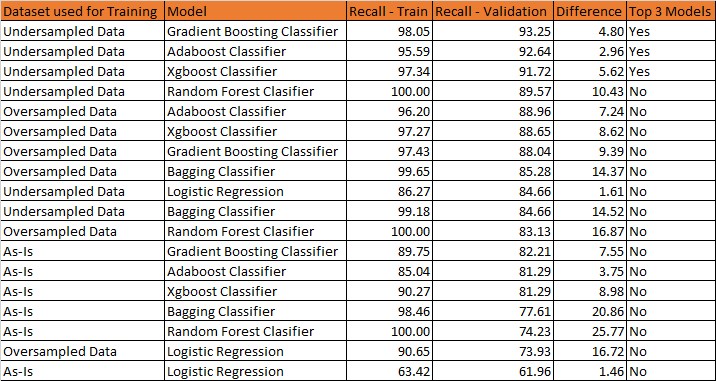

Based on the comparison, we will choose below models for further tuning - 

1. Gradient Boosting Classifier with Undersampled Train dataset
2. Adaboost Classifier with Undersampled Train dataset
3. Xgboost Boosting Classifier with Undersampled Train dataset
4. Adaboost Classifier with Oversampled Train dataset - ONLY In case we face issues tuning Xgboost classifier

Top 3 models are indicated by column Top 3 Models = Yes

# 15. Tuning Models (Hyperparameter tuning using random search)

Tune Top 3 models identified in previous section.

## Tuned Gradient Boosting Classifier - With Undersampled Dataset

In [191]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Available Parameters are - 
# {'ccp_alpha': 0.0,
#  'criterion': 'friedman_mse',
#  'init': None,
#  'learning_rate': 0.1,
#  'loss': 'deviance',
#  'max_depth': 3,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 100,
#  'n_iter_no_change': None,
#  'random_state': 1,
#  'subsample': 1.0,
#  'tol': 0.0001,
#  'validation_fraction': 0.1,
#  'verbose': 0,
#  'warm_start': False}


param_grid_gbc = {
    "n_estimators": np.arange(10, 100, 10),
    "learning_rate": np.arange(0.1,1,0.1),
    #[0.1, 0.01, 0.2, 0.05, 1],
    "subsample": np.arange(0.5, 1 , 0.1),
    #[0.8,0.9,1],
    "max_features": np.arange(0.5,1,0.1)
    #[0.7,0.8,0.9,1]
    }


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV with cross validation of 5 and number of iterations 100. Model will be fitted 5 times for each of the 100 set of samples
gbc_tuned_final = RandomizedSearchCV(estimator=gbc_tuned, param_distributions=param_grid_gbc, n_jobs = -1, n_iter=100, scoring=acc_scorer, cv=5, random_state=1, verbose=2)

gbc_tuned_final = gbc_tuned_final.fit(X_train_under, y_train_under)

print("Best parameters are {} with score={}:" .format(gbc_tuned_final.best_params_,(gbc_tuned_final.best_score_ * 100)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'subsample': 0.7999999999999999, 'n_estimators': 70, 'max_features': 0.5, 'learning_rate': 0.2} with score=95.59392987964416:


In [192]:
# Fit the model with the best parameters identified by random search

gbc_tuned_final = GradientBoostingClassifier(random_state=1, subsample = 0.8999999999999999, n_estimators = 80, max_features = 0.7, learning_rate = 0.1)

gbc_tuned_final = gbc_tuned_final.fit(X_train_under, y_train_under)

In [193]:
# Recall performance of the model on Train and Validation

print('For Gradient Boosting Classifier - With Undersampled Dataset \n')
    
gbc_tuned_final_train_score = recall_score(y_train_under, gbc_tuned_final.predict(X_train_under)) * 100
print('\tTRAIN Dataset -', gbc_tuned_final_train_score, '\n')    

gbc_tuned_final_val_score = recall_score(y_val, gbc_tuned_final.predict(X_val)) * 100
print('\tVALIDATION Dataset -', gbc_tuned_final_val_score, '\n')

gbc_tuned_final_diff_score = gbc_tuned_final_train_score - gbc_tuned_final_val_score
print('\tDifference between TRAIN and VALIDATION Dataset Scores -', gbc_tuned_final_diff_score, '\n\n')

For Gradient Boosting Classifier - With Undersampled Dataset 

	TRAIN Dataset - 97.64344262295081 

	VALIDATION Dataset - 92.02453987730061 

	Difference between TRAIN and VALIDATION Dataset Scores - 5.618902745650203 




## Tuned AdaBoost Classifier - With Undersampled Dataset

In [194]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

# Available Parameters are - 
# {'algorithm': 'SAMME.R',
#  'base_estimator': None,
#  'learning_rate': 1.0,
#  'n_estimators': 50,
#  'random_state': 1}


param_grid_ada = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=4, random_state=1),DecisionTreeClassifier(max_depth=5, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(50,200,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned_final = RandomizedSearchCV(estimator=ada_tuned, param_distributions=param_grid_ada, n_jobs = -1, n_iter=100, scoring=acc_scorer, cv=5, random_state=1, verbose=2)

ada_tuned_final = ada_tuned_final.fit(X_train_under, y_train_under)

print("Best parameters are {} with score={}:" .format(ada_tuned_final.best_params_,(ada_tuned_final.best_score_ * 100)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'n_estimators': 150, 'learning_rate': 0.4, 'base_estimator': DecisionTreeClassifier(max_depth=5, random_state=1)} with score=95.59288330716903:


In [195]:
# Fit the model with the best parameters identified by random search

ada_tuned_final = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.4, base_estimator = DecisionTreeClassifier(max_depth=5, random_state=1), random_state=1,)

ada_tuned_final = ada_tuned_final.fit(X_train_under, y_train_under)

In [196]:
# Recall performance of the model on Train and Validation

print('For Adaboost Classifier - With Undersampled Dataset \n')
    
ada_tuned_final_train_score = recall_score(y_train_under, ada_tuned_final.predict(X_train_under)) * 100
print('\tTRAIN Dataset -', ada_tuned_final_train_score, '\n')    

ada_tuned_final_val_score = recall_score(y_val, ada_tuned_final.predict(X_val)) * 100
print('\tVALIDATION Dataset -', ada_tuned_final_val_score, '\n')

ada_tuned_final_diff_score = ada_tuned_final_train_score - ada_tuned_final_val_score
print('\tDifference between TRAIN and VALIDATION Dataset Scores -', ada_tuned_final_diff_score, '\n\n')

For Adaboost Classifier - With Undersampled Dataset 

	TRAIN Dataset - 100.0 

	VALIDATION Dataset - 93.25153374233128 

	Difference between TRAIN and VALIDATION Dataset Scores - 6.748466257668724 




## Tuned Xgboost Classifier - With Undersampled Dataset

In [197]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

In [198]:
xgb_tuned.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [199]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Available Parameters are - 
# {'base_score': 0.5,
#  'booster': 'gbtree',
#  'colsample_bylevel': 1,
#  'colsample_bynode': 1,
#  'colsample_bytree': 1,
#  'gamma': 0,
#  'learning_rate': 0.1,
#  'max_delta_step': 0,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'missing': None,
#  'n_estimators': 100,
#  'n_jobs': 1,
#  'nthread': None,
#  'objective': 'binary:logistic',
#  'random_state': 1,
#  'reg_alpha': 0,
#  'reg_lambda': 1,
#  'scale_pos_weight': 1,
#  'seed': None,
#  'silent': None,
#  'subsample': 1,
#  'verbosity': 1}


param_grid_xgb={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned_final = RandomizedSearchCV(estimator=xgb_tuned, param_distributions=param_grid_xgb, n_jobs = -1, n_iter=100, scoring=acc_scorer, cv=5, random_state=1, verbose=2)

xgb_tuned_final = xgb_tuned_final.fit(X_train_under, y_train_under)

print("Best parameters are {} with score={}:" .format(xgb_tuned_final.best_params_,(xgb_tuned_final.best_score_ * 100)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 3} with score=99.6923076923077:


In [200]:
xgb_tuned_final = XGBClassifier(subsample = 1,scale_pos_weight = 10, reg_lambda = 5, n_estimators = 100, max_depth = 1, learning_rate = 0.1, gamma = 3, random_state=1)

xgb_tuned_final = xgb_tuned_final.fit(X_train_under, y_train_under)

In [201]:
print('For Xgboost Classifier - With Undersampled Dataset \n')
    
xgb_tuned_final_train_score = recall_score(y_train_under, xgb_tuned_final.predict(X_train_under)) * 100
print('\tTRAIN Dataset -', xgb_tuned_final_train_score, '\n')    

xgb_tuned_final_val_score = recall_score(y_val, xgb_tuned_final.predict(X_val)) * 100
print('\tVALIDATION Dataset -', xgb_tuned_final_val_score, '\n')

xgb_tuned_final_diff_score = xgb_tuned_final_train_score - xgb_tuned_final_val_score
print('\tDifference between TRAIN and VALIDATION Dataset Scores -', xgb_tuned_final_diff_score, '\n\n')

For Xgboost Classifier - With Undersampled Dataset 

	TRAIN Dataset - 100.0 

	VALIDATION Dataset - 100.0 

	Difference between TRAIN and VALIDATION Dataset Scores - 0.0 




## Compare Models Post Hyperparameter Tuning

Summary of 21 models built so far.

Data is sorted in descending order of Recall - Valiation and ascending order of difference between Train and Validation. Best models are where Recall on validation dataset is higher and difference between Train and Validation datasets is close.

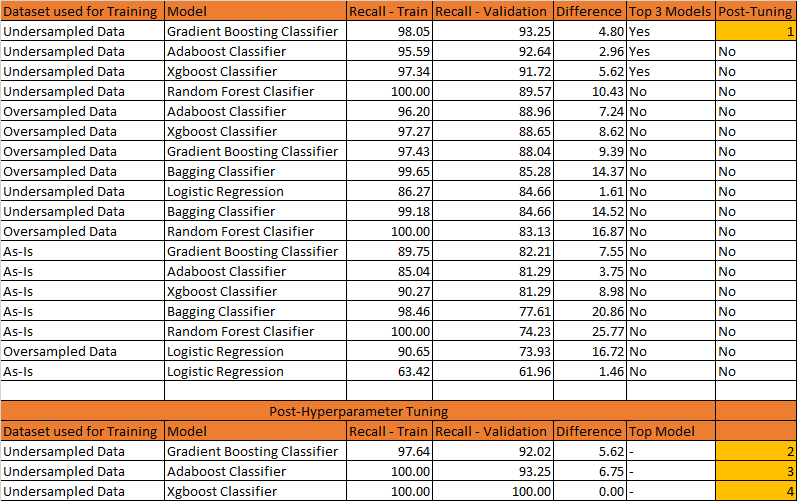

Despite tuning, Gradient Boosting Classifier with default parameters with undersampled data is still one of the best. 

We will test these 4 models with test dataset, models are identified with column Post-Tuning = Numbers 1 thru 4.

# 16. Compare Models on TEST Dataset

Top 4 models chosen in previous section are tested on Test dataset.

## Default Gradient Boosting Classifier - Undersampled Data (Model 1)

In [202]:
# Rebuild Gradient Boosting Classifier with undersampled data
# As this was built as part of the loop, we do not have that model object, hence need to be built again

models_under_data = []  # Empty list to store all the models

# Appending models into the list

models_under_data.append(("Default Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))

results_under_data = []  # Empty list to store all model's CV scores
names_under_data = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, default_gbc_model in models_under_data:
    scoring = "recall"

    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    
    cv_result_under_data = cross_val_score(
        estimator=default_gbc_model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
    
    results_under_data.append(cv_result_under_data)
    names_under_data.append(name)
    print("{}: {}".format(name, cv_result_under_data.mean() * 100))

print("\n" "Performance on TRAIN & VALIDATION Datasets:" "\n")

for name, default_gbc_model in models_under_data:
    default_gbc_model.fit(X_train_under, y_train_under)
    print('For', name, '\n')
    scores_under_train = recall_score(y_train_under, default_gbc_model.predict(X_train_under)) * 100
    print('\tTRAIN Dataset -', scores_under_train, '\n')    
    scores_under_val = recall_score(y_val, default_gbc_model.predict(X_val)) * 100
    print('\tVALIDATION Dataset -', scores_under_val, '\n')
    Scores_under_diff = scores_under_train - scores_under_val
    print('\tDifference between TRAIN and VALIDATION Dataset Scores -', Scores_under_diff, '\n\n')   


Cross-Validation Performance:

Default Gradient Boosting Classifier: 94.36106750392466

Performance on TRAIN & VALIDATION Datasets:

For Default Gradient Boosting Classifier 

	TRAIN Dataset - 98.05327868852459 

	VALIDATION Dataset - 93.25153374233128 

	Difference between TRAIN and VALIDATION Dataset Scores - 4.80174494619331 




In [203]:
print("\n" "Performance on TEST Dataset:" "\n")

print('For Default Gradient Boosting Classifier - Undersampled Data \n')
gbc_scores_under_test = recall_score(y_test, default_gbc_model.predict(X_test)) * 100
print('TEST Dataset -', gbc_scores_under_test, '\n')
    


Performance on TEST Dataset:

For Default Gradient Boosting Classifier - Undersampled Data 

TEST Dataset - 93.84615384615384 



## Tuned Gradient Boosting Classifier - Undersampled Data (Model 2)

In [204]:
# Recall performance of the model on TEST

print("\n" "Performance on TEST Dataset:" "\n")

print('For Tuned Gradient Boosting Classifier - Undersampled Data \n')
gbc_tuned_final_test_score = recall_score(y_test, gbc_tuned_final.predict(X_test)) * 100
print('TEST Dataset -', gbc_tuned_final_test_score, '\n')


Performance on TEST Dataset:

For Tuned Gradient Boosting Classifier - Undersampled Data 

TEST Dataset - 93.53846153846153 



## Tuned Adaboost Classifier - Undersampled Data (Model 3)

In [205]:
# Recall performance of the model on TEST

print("\n" "Performance on TEST Dataset:" "\n")

print('For Tuned Adaboost Classifier - Undersampled Data \n')
ada_tuned_final_test_score = recall_score(y_test, ada_tuned_final.predict(X_test)) * 100
print('TEST Dataset -', ada_tuned_final_test_score, '\n')


Performance on TEST Dataset:

For Tuned Adaboost Classifier - Undersampled Data 

TEST Dataset - 93.84615384615384 



## Tuned Xgboost Classifier - Undersampled Data (Model 4)

In [206]:
# Recall performance of the model on TEST

print("\n" "Performance on TEST Dataset:" "\n")

print('For Tuned Xgboost Classifier - Undersampled Data \n')
xgb_tuned_final_test_score = recall_score(y_test, xgb_tuned_final.predict(X_test)) * 100
print('TEST Dataset -', xgb_tuned_final_test_score, '\n')


Performance on TEST Dataset:

For Tuned Xgboost Classifier - Undersampled Data 

TEST Dataset - 100.0 



## Compare model performance and choose recommended model

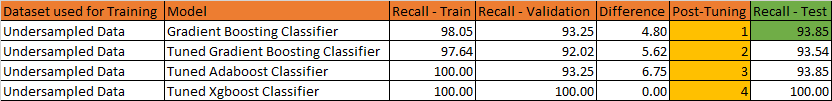

All models have performed well on Test dataset, hence should generalize well in Production.

Gradient Boosting Classifier (Model #1) - Only Tuned Xgboost Classifier has a better Test performance than this model. Xgboost model has 100% Recall score on Train, Validation and Test, which indicates possibility of overfit model. Tuned Adaboost Classifier model is equally good on Test, but again its 100% on Train, which may indidate overfit. Tuned Gradient Boost Classifier has Train, Val and Test scores lower that Model # 1.

<b><font color="blue">We will choose Gradient Boosting Classifier (Model # 1) as our recommended model.</b></font>

# 17. <b><font color="blue"> Interpretation of Recommended Model </b>

Gradient Boosting Classifier (Model # 1) as our recommended model.


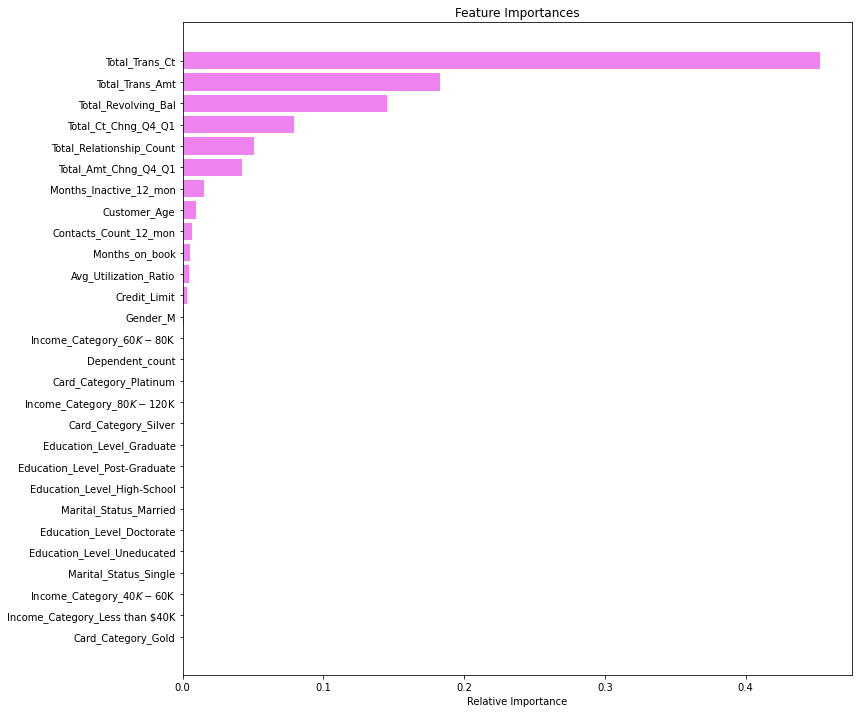

In [207]:
feature_names = X_train_under.columns
importances = default_gbc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on the above, most important features for prediction are - Features are in the descending order of importance.
* Total_Trans_Ct
* Total_Trans_Amt
* Total_Revolving_Bal
* Total_Ct_Chng_Q4_Q1
* Total_Relationship_Count
* Total_Amt_Chng_Q4_Q1
* Customer_Age
* Contacts_Count_12_mon
* Months_on_book
* Avg_Utilization_Ratio
* Credit_Limit

All other features have none or minimal impact on the target feature, whether customer will be retained or will be attrited.

Above interpretation provides features that are important for the prediction, but it does not inform whether the impact is positive or negative and the extent of the impact (more vs less impact).

Let's use "SHAP" to explore the contribution of features in making the prediction.

More information on SHAP - 

SHAP stands for “SHapley Additive exPlanations. Here are some benefits of using SHAP values:

* Global interpretability: SHAP values not only show feature importance but also show whether the feature has a positive or negative impact on predictions.

* Local interpretability: We can calculate SHAP values for each individual prediction and know how the features contribute to that single prediction. 

* SHAP values can be used to explain a large variety of models including linear models (e.g. linear regression), tree-based models (e.g. XGBoost) and neural networks.


In [208]:
#Install Shap

!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
#iImport Shap package

import shap

In [210]:
explainer = shap.TreeExplainer(default_gbc_model)
shap_values = explainer.shap_values(X_train_under)

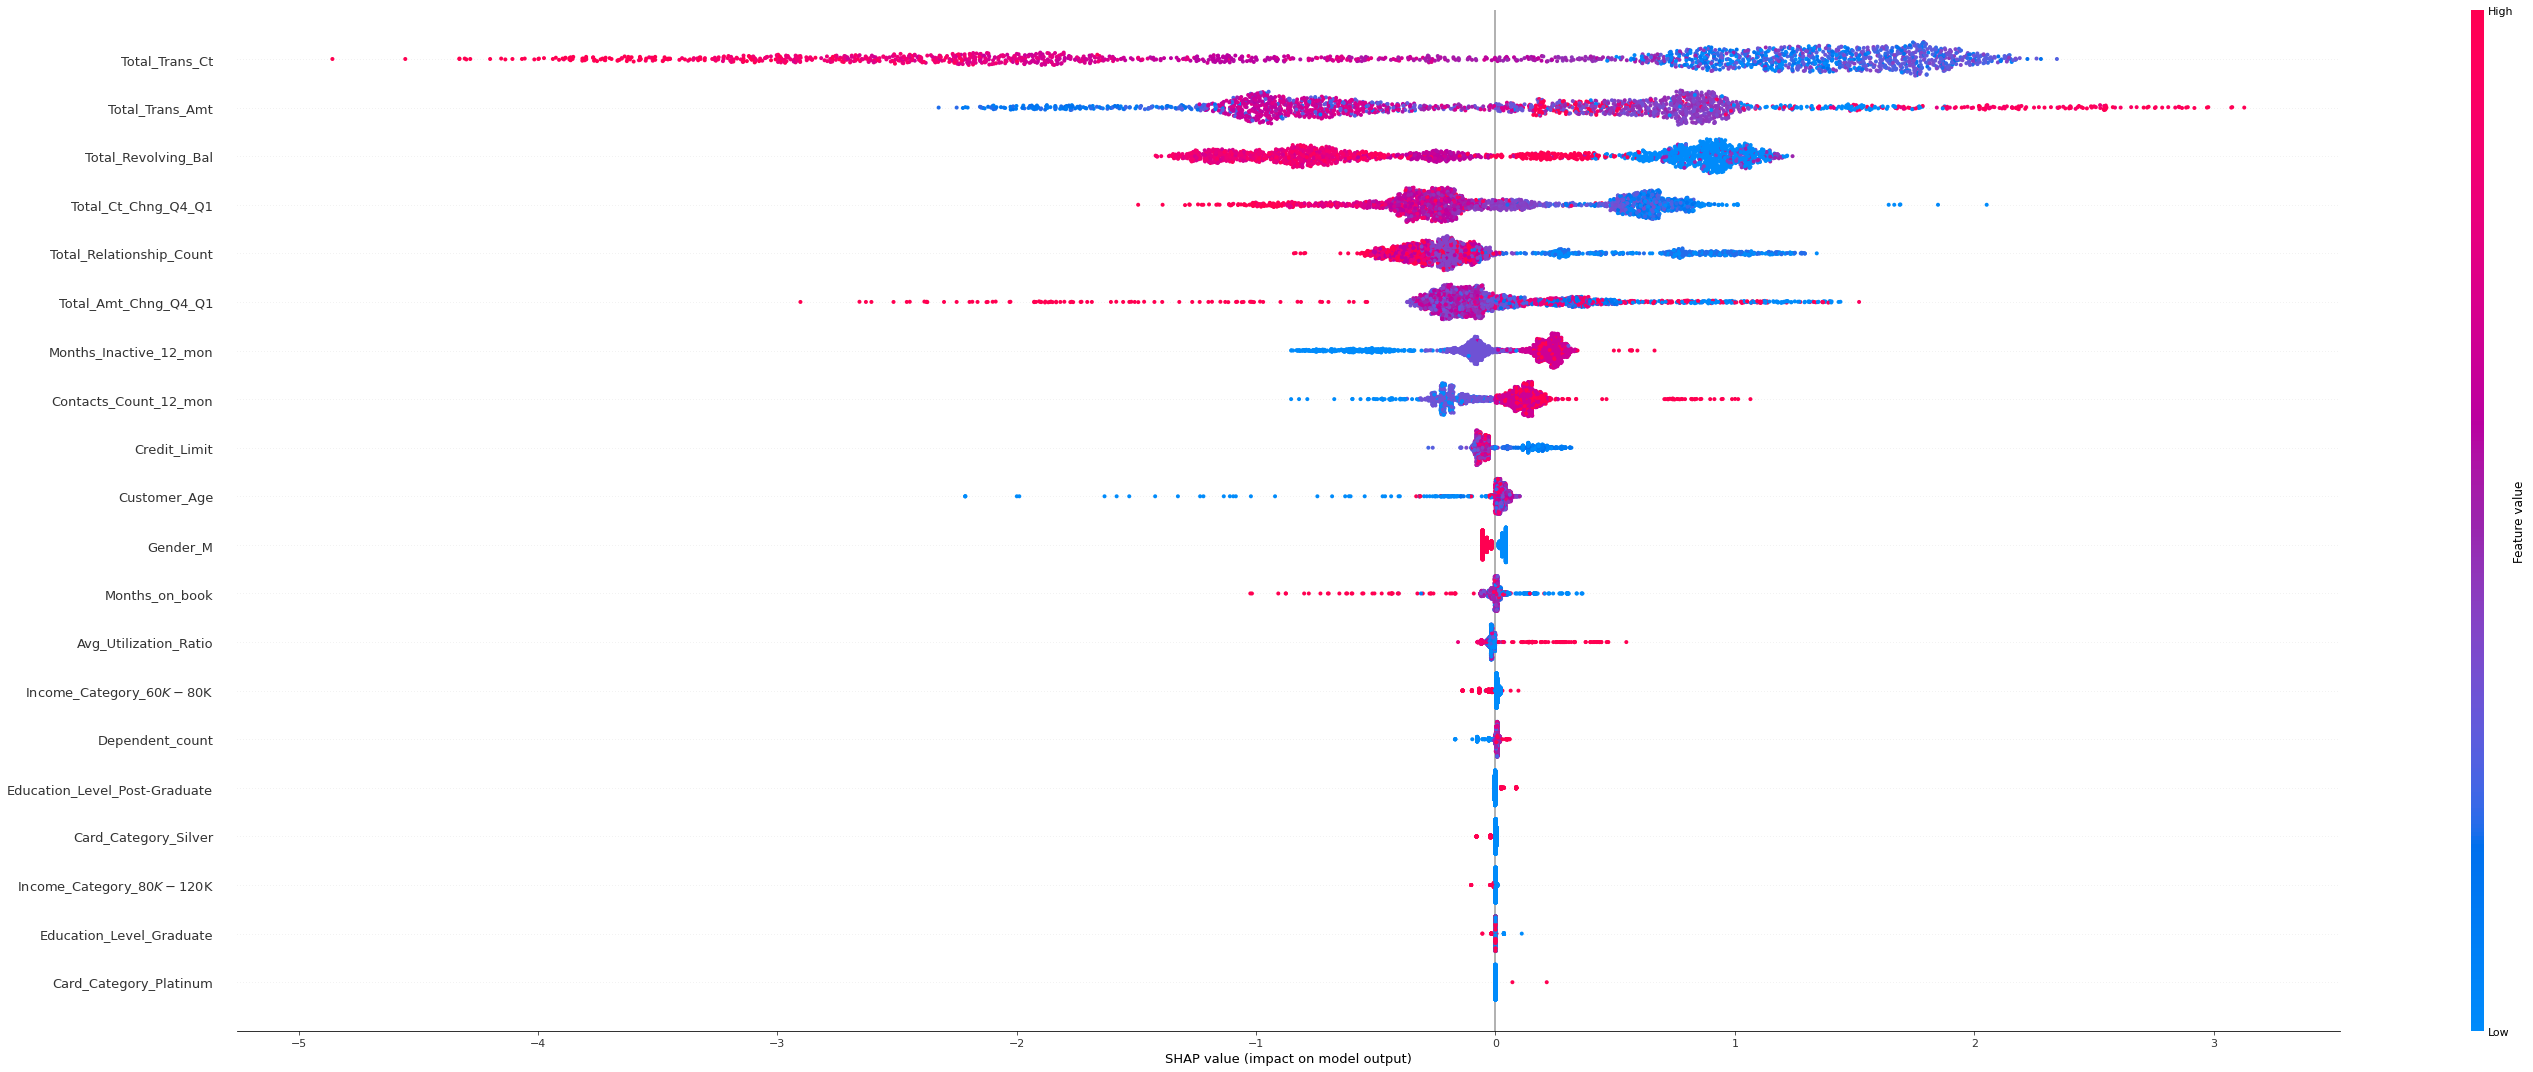

In [211]:
# Make Summary plot

shap.summary_plot(shap_values, X_train_under, plot_size=(40.0, 15.0))

How to interpret above plot? 

* In this chart, X-axis stands for SHAP value. 
* Y-axis has all the features, arranged in order of importance from top to bottom. 
* Each point on the chart is one SHAP value for a prediction and feature. 
* Red color means higher value of a feature. Blue means lower value of a feature. 
* The farther away from the values from the central line(SHAP = 0), the more impact that variable will have on predictions.
* Points on left side of the central line will have a negative impact on the prediction, whereas points on the right side of the central line will have a positive impact.
* This is used to get a general sense of features’ directionality impact based on the distribution of the red and blue dots.


Interpretation of the plot - 

1. Total_Trans_Ct - Most important feature for predicting the target feature. Lower values (blue dots) are concentrated on the positive side of the plot and lower negative side of the plot. That means lower values will increase the target feature to a higher value towards class 1. In other words, lesser the Total_Trans_Ct, more chances of customer getting attrited.

2. Total_Trans_Amt - Similar to Total_Trans_Ct, although its not clear from the plot

3. Total_Revolving_Bal - Red dots are concentrated on negative side and Blue dots are concentrated on positive side. Higher the value, lower the chance of customer getting attrited and vice-a-versa.

* Months_Inactive_12_mon - Lower the value, lower the chance of the customer attriting

4. All other features can be interpreted in a simiar way.

# 18. Productionize the model

We will use Pipeline to automate the process of data pre-processing and model build / predicting.

In the previous section, we have preprocessed independent features. First, we will create a function that consolidates all those preprocessing steps. This function will then be used in the pipeline.

We also has transformed dependent feature, by replacing text values into classes of 0 and 1. We will do this outside of the pipeline.

## Create Data Pre-processing function

Define a function that takes a dataframe as an argument and we will include all the data processing steps into the function. The function will return a dataframe.  

In [212]:
# Function to preprocess dependent feature

def PreprocSteps_y(y):
    
# Attrition_Flag

    y.replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

    y=y.astype('category')

    return y

# Function to preprocess independent features

def PreprocSteps_X(X):

    # Customer_Age - No preprocessing steps

    # Gender

    X = pd.get_dummies(X, columns = ['Gender'], drop_first=True)


    # Education_Level

    X['Education_Level'] = X['Education_Level'].replace('High School', 'High-School')


    SI1 = SimpleImputer(strategy="most_frequent")
    X['Education_Level'] = SI1.fit_transform(X[['Education_Level']])

    X = pd.get_dummies(X, columns = ['Education_Level'], drop_first=True)


    # Marital_Status

    SI_Marital1 = SimpleImputer(strategy="most_frequent")

    X['Marital_Status'] = SI_Marital1.fit_transform(X[['Marital_Status']])


    X = pd.get_dummies(X, columns = ['Marital_Status'], drop_first=True)




    # Income_Category'

    X['Income_Category'] = X['Income_Category'].replace('abc', np.nan)

    SI_Income1 = SimpleImputer(strategy="most_frequent")

    X['Income_Category'] = SI_Income1.fit_transform(X[['Income_Category']])

    X = pd.get_dummies(X, columns = ['Income_Category'], drop_first=True)




    # Card_Category

    X = pd.get_dummies(X, columns = ['Card_Category'], drop_first=True)

    # Credit_Limit

    #pt_credit1 = PowerTransformer()
    pt_credit1 = PowerTransformer(method='box-cox')

    X[['Credit_Limit']] = pt_credit1.fit_transform(X[['Credit_Limit']])



    # Total_Revolving_Bal

    pt_revolve1 = PowerTransformer()

    X[['Total_Revolving_Bal']] = pt_revolve1.fit_transform(X[['Total_Revolving_Bal']])


    # Avg_Open_To_Buy

    X = X.drop(['Avg_Open_To_Buy'], axis=1)


    # Total_Trans_Amt

    #pt_Total_Trans_Amt1 = PowerTransformer()
    pt_Total_Trans_Amt1 = PowerTransformer(method='box-cox')

    X[['Total_Trans_Amt']] = pt_Total_Trans_Amt1.fit_transform(X[['Total_Trans_Amt']])


    # Total_Trans_Ct

    #pt_Total_Trans_Ct1 = PowerTransformer()
    pt_Total_Trans_Ct1 = PowerTransformer(method='box-cox')

    X[['Total_Trans_Ct']] = pt_Total_Trans_Ct1.fit_transform(X[['Total_Trans_Ct']])

    return X

## Create Train, Val and Test datasets from original dataframe

Create the datasets again and then create undersampled Train dataset.
Undersampled Train dataset now will undergo preprocessing and wil be used for model via Pipeline.

In [213]:
# Separate Dependent and Independent features

# Independant features
X_pipe = df.drop('Attrition_Flag', axis=1)

# Dependent features

y_pipe = df['Attrition_Flag']

In [214]:
# Let's separate data for TRAIN , VAL and TEST in the prportion of 60/20/20

# creating temp and test sets
X_temp_pipe, X_test_pipe, y_temp_pipe, y_test_pipe = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=1, stratify = y_pipe)


# Split temp further into train and val
X_train_pipe, X_val_pipe, y_train_pipe, y_val_pipe = train_test_split(X_temp_pipe, y_temp_pipe, test_size=0.25, random_state=1, stratify = y_temp_pipe)

In [215]:
# fit random under sampler on the train data

rus_pipe = RandomUnderSampler(random_state=1, sampling_strategy = 1)

X_train_under_pipe, y_train_under_pipe = rus_pipe.fit_resample(X_train_pipe, y_train_pipe)

In [216]:
y_train_under_pipe.value_counts()

Attrited Customer    976
Existing Customer    976
Name: Attrition_Flag, dtype: int64

In [217]:
X_train_under_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              1952 non-null   int64  
 1   Gender                    1952 non-null   object 
 2   Dependent_count           1952 non-null   int64  
 3   Education_Level           1659 non-null   object 
 4   Marital_Status            1812 non-null   object 
 5   Income_Category           1952 non-null   object 
 6   Card_Category             1952 non-null   object 
 7   Months_on_book            1952 non-null   int64  
 8   Total_Relationship_Count  1952 non-null   int64  
 9   Months_Inactive_12_mon    1952 non-null   int64  
 10  Contacts_Count_12_mon     1952 non-null   int64  
 11  Credit_Limit              1952 non-null   float64
 12  Total_Revolving_Bal       1952 non-null   int64  
 13  Avg_Open_To_Buy           1952 non-null   float64
 14  Total_Am

## Define Function Transformer

With function transformer, it becomes very easy to combine multiple processing steps and execute in a pipeline. Function created in the earlier step is used with the function transformer.

In [218]:
# The function created for processing the data should be passed as an arugument in the FunctionTransformer

# To transform y values, this will have to be used outside of the pipeline
processing_y = FunctionTransformer(PreprocSteps_y)

# To transform X values, this will be used within the pipeline, as a first step
processing_X = FunctionTransformer(PreprocSteps_X)

In [219]:
# Preprocessing dependent / target feature is not possible with pipeline. Hence, preprocessing that here, using the function

processing_y.transform(y_train_pipe)

processing_y.transform(y_train_under_pipe)

processing_y.transform(y_test_pipe)

processing_y.transform(y_val_pipe)

134     0
7475    0
4923    0
1842    0
2707    0
       ..
4659    0
9276    0
5490    0
9452    0
8597    0
Name: Attrition_Flag, Length: 2026, dtype: category
Categories (2, int64): [0, 1]

## Create Pipeline

In [220]:
# Creating new pipeline with best parameters
pipe = Pipeline(
    steps=[
        ("data_pre-processing2", processing_X),
        (
            "Gradient Boosting Classifier Untuned",
            GradientBoostingClassifier(random_state=1)
        )
    ]
)

# # Fit the model on undersampled training data
pipe.fit(X_train_under_pipe, y_train_under_pipe)

Pipeline(steps=[('data_pre-processing2',
                 FunctionTransformer(func=<function PreprocSteps_X at 0x7f852dcf44d0>)),
                ('Gradient Boosting Classifier Untuned',
                 GradientBoostingClassifier(random_state=1))])

Pre-processing function and the model are now encapsuled in the pipeline. We will refer to the pipeline now as a model.

In [221]:
# Check performance of the pipeline on Train dataset

print("Recall on TRAIN set with Pipe : ",metrics.recall_score(y_train_under_pipe, pipe.predict(X_train_under_pipe)) *100 )

Recall on TRAIN set with Pipe :  98.05327868852459


In [222]:
# Check performance of the pipeline on Val dataset

print("Recall on VAL set with Pipe : ",metrics.recall_score(y_val_pipe, pipe.predict(X_val_pipe)) *100 )

Recall on VAL set with Pipe :  95.70552147239265


In [223]:
# Check performance of the pipeline on Test dataset

print("Recall on TEST set with Pipe : ",metrics.recall_score(y_test_pipe, pipe.predict(X_test_pipe)) *100 )

Recall on TEST set with Pipe :  97.23076923076923


<div class="alert alert-success"><b><font size=4>Recommended model has performed well on Test dataset after creating a pipeline, with a Recall score of 97.23%. This model is expected to fair well in Production.</b></font></div>

# 19. <b><font color="blue">Actionable Insights & Recommendations</b>


<b><font color ="blue" size=5>Recommendations based on EDA - 

Customer Characteristics of attrited customers - 

* Lower credit limits
* Significanty lesser Total revolving balance than existing customers
* Significanty lesser Total transaction amount than existing customers
* Significanty lesser Total transaction amount than existing customers
* Smaller ratio of transaction counts between Q4 and Q1

Total revolving balance of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce use of the credit card from the bank and eventually close the account

Similar to Total revolving balance. Total transaction amount of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account

Similar to Total transaction amount. Total transaction count of the attrited customers is significantly lesser than existing customers. This also could be an indicator as customers may reduce spend using the the credit card from the bank and eventually close the account

Ratio of transaction counts between Q4 and Q1 is smaller for attrited customers

For Income category, there are NO females in income categories more than 60K. Categories 60K-80K, 80-120K and 120K+ are missing altogether for female customers. Is the bank missing a large segment of customers? Business should investigate and take appropriate action.

There are sizable records with income category 'abc', majority of thoese are Females. Should be a point for verification by business.

Most number of records with 'Less than 40K' income. In general, more customer on lower end of the income levels. Is the bank missing on other higher income customers?

Blue followed by Silver are the most popular cards, Blue is significantly higher proportion. Business to review and push other card categories as well.

<b><font color ="blue" size=5>Recommendations based on the Model - 

Most important features for prediction are - Features are in the descending order of importance.

* Total_Trans_Ct
* Total_Trans_Amt
* Total_Revolving_Bal
* Total_Ct_Chng_Q4_Q1
* Total_Relationship_Count
* Total_Amt_Chng_Q4_Q1
* Customer_Age
* Contacts_Count_12_mon
* Months_on_book
* Avg_Utilization_Ratio
* Credit_Limit
 
 All other features have none or minimal impact on the target feature, whether * customer will be retained or will be attrited.

 Business should keep monitoring trends on above features and identify customers as 'Risky' Customers based on that. Find ways to engage with these customers to keep them.
 * If the Total transaction counts, amount starts going down
 * If the Contacts count starts going down
 * If the total relationship counts starts going down